In [269]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn.feature_selection import VarianceThreshold
from sklearn.metrics  import r2_score, mean_squared_error, mean_absolute_error
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.preprocessing import RobustScaler, MinMaxScaler
pd.options.display.max_rows = 100
pd.options.display.max_columns = 100

In [270]:
!pip install sweetviz

In [271]:
#for AutoEDA
import sweetviz as sv

In [272]:
import warnings
warnings.filterwarnings("ignore")

In [273]:
data = pd.read_csv("train.csv")


In [274]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [275]:
data.isnull().sum()

Id                  0
MSSubClass          0
MSZoning            0
LotFrontage       259
LotArea             0
Street              0
Alley            1369
LotShape            0
LandContour         0
Utilities           0
LotConfig           0
LandSlope           0
Neighborhood        0
Condition1          0
Condition2          0
BldgType            0
HouseStyle          0
OverallQual         0
OverallCond         0
YearBuilt           0
YearRemodAdd        0
RoofStyle           0
RoofMatl            0
Exterior1st         0
Exterior2nd         0
MasVnrType        872
MasVnrArea          8
ExterQual           0
ExterCond           0
Foundation          0
BsmtQual           37
BsmtCond           37
BsmtExposure       38
BsmtFinType1       37
BsmtFinSF1          0
BsmtFinType2       38
BsmtFinSF2          0
BsmtUnfSF           0
TotalBsmtSF         0
Heating             0
HeatingQC           0
CentralAir          0
Electrical          1
1stFlrSF            0
2ndFlrSF            0
LowQualFin

In [276]:
data.head()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities LotConfig LandSlope Neighborhood Condition1  \
0         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
1         Lvl    AllPub       FR2       Gtl      Veenker      Feedr   
2         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
3         Lvl    AllPub    Corner       Gtl      Crawfor       Norm   
4         Lvl    AllPub       FR2       Gtl      NoRidge       Norm   

  Condition2 BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  \
0       Norm     1Fam     2Story            7            5       2003   
1       Norm     1Fam     1Story            6            8       1976   
2       Norm     1Fam     2Story            7            5       2001   
3       Norm     1Fam     2Story            7            5       1915   
4       Norm     1Fam     2Story            8            5       2000   

   YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  \
0          2003     Gable  CompShg     VinylSd     VinylSd    BrkFace   
1          1976     Gable  CompShg     MetalSd     MetalSd        NaN   
2          2002     Gable  CompShg     VinylSd     VinylSd    BrkFace   
3          1970     Gable  CompShg     Wd Sdng     Wd Shng        NaN   
4          2000     Gable  CompShg     VinylSd     VinylSd    BrkFace   

   MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond BsmtExposure  \
0       196.0        Gd        TA      PConc       Gd       TA           No   
1         0.0        TA        TA     CBlock       Gd       TA           Gd   
2       162.0        Gd        TA      PConc       Gd       TA           Mn   
3         0.0        TA        TA     BrkTil       TA       Gd           No   
4       350.0        Gd        TA      PConc       Gd       TA           Av   

  BsmtFinType1  BsmtFinSF1 BsmtFinType2  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  \
0          GLQ         706          Unf           0        150          856   
1          ALQ         978          Unf           0        284         1262   
2          GLQ         486          Unf           0        434          920   
3          ALQ         216          Unf           0        540          756   
4          GLQ         655          Unf           0        490         1145   

  Heating HeatingQC CentralAir Electrical  1stFlrSF  2ndFlrSF  LowQualFinSF  \
0    GasA        Ex          Y      SBrkr       856       854             0   
1    GasA        Ex          Y      SBrkr      1262         0             0   
2    GasA        Ex          Y      SBrkr       920       866             0   
3    GasA        Gd          Y      SBrkr       961       756             0   
4    GasA        Ex          Y      SBrkr      1145      1053             0   

   GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  \
0       1710             1             0         2         1             3   
1       1262             0             1         2         0             3   
2       1786             1             0         2         1             3   
3       1717             1             0         1         0             3   
4       2198             1             0         2         1             4   

   KitchenAbvGr KitchenQual  TotRmsAbvGrd Functional  Fireplaces FireplaceQu  \
0             1          Gd             8        Typ           0         NaN   
1             1          TA             6        Typ           1          TA   
2             1          Gd             6        Typ           1          TA   
3             1          Gd            

In [277]:
data.head()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities LotConfig LandSlope Neighborhood Condition1  \
0         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
1         Lvl    AllPub       FR2       Gtl      Veenker      Feedr   
2         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
3         Lvl    AllPub    Corner       Gtl      Crawfor       Norm   
4         Lvl    AllPub       FR2       Gtl      NoRidge       Norm   

  Condition2 BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  \
0       Norm     1Fam     2Story            7            5       2003   
1       Norm     1Fam     1Story            6            8       1976   
2       Norm     1Fam     2Story            7            5       2001   
3       Norm     1Fam     2Story            7            5       1915   
4       Norm     1Fam     2Story            8            5       2000   

   YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  \
0          2003     Gable  CompShg     VinylSd     VinylSd    BrkFace   
1          1976     Gable  CompShg     MetalSd     MetalSd        NaN   
2          2002     Gable  CompShg     VinylSd     VinylSd    BrkFace   
3          1970     Gable  CompShg     Wd Sdng     Wd Shng        NaN   
4          2000     Gable  CompShg     VinylSd     VinylSd    BrkFace   

   MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond BsmtExposure  \
0       196.0        Gd        TA      PConc       Gd       TA           No   
1         0.0        TA        TA     CBlock       Gd       TA           Gd   
2       162.0        Gd        TA      PConc       Gd       TA           Mn   
3         0.0        TA        TA     BrkTil       TA       Gd           No   
4       350.0        Gd        TA      PConc       Gd       TA           Av   

  BsmtFinType1  BsmtFinSF1 BsmtFinType2  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  \
0          GLQ         706          Unf           0        150          856   
1          ALQ         978          Unf           0        284         1262   
2          GLQ         486          Unf           0        434          920   
3          ALQ         216          Unf           0        540          756   
4          GLQ         655          Unf           0        490         1145   

  Heating HeatingQC CentralAir Electrical  1stFlrSF  2ndFlrSF  LowQualFinSF  \
0    GasA        Ex          Y      SBrkr       856       854             0   
1    GasA        Ex          Y      SBrkr      1262         0             0   
2    GasA        Ex          Y      SBrkr       920       866             0   
3    GasA        Gd          Y      SBrkr       961       756             0   
4    GasA        Ex          Y      SBrkr      1145      1053             0   

   GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  \
0       1710             1             0         2         1             3   
1       1262             0             1         2         0             3   
2       1786             1             0         2         1             3   
3       1717             1             0         1         0             3   
4       2198             1             0         2         1             4   

   KitchenAbvGr KitchenQual  TotRmsAbvGrd Functional  Fireplaces FireplaceQu  \
0             1          Gd             8        Typ           0         NaN   
1             1          TA             6        Typ           1          TA   
2             1          Gd             6        Typ           1          TA   
3             1          Gd            

Checking missing Values

In [278]:
missing_info= round(data.isna().sum() * 100/data.shape[0], 2)
missing_info[missing_info > 0].sort_values(ascending= False)

PoolQC          99.52
MiscFeature     96.30
Alley           93.77
Fence           80.75
MasVnrType      59.73
FireplaceQu     47.26
LotFrontage     17.74
GarageType       5.55
GarageYrBlt      5.55
GarageFinish     5.55
GarageQual       5.55
GarageCond       5.55
BsmtFinType2     2.60
BsmtExposure     2.60
BsmtFinType1     2.53
BsmtCond         2.53
BsmtQual         2.53
MasVnrArea       0.55
Electrical       0.07
dtype: float64


*   There are 19 columsn with missing values
*   Categories PoolQC, MiscFeature, Alley, Fence, FireplaceQu have very high percentage of missing values present.

I want to verify if the data is actually missing or it holds some domain knowledge.



In [279]:
missing_val_columns = summary[summary["Null_Counts"] > 0].Name
missing_val_columns

3     LotFrontage
59    GarageYrBlt
26     MasVnrArea
42     Electrical
Name: Name, dtype: object

In [280]:
#finding unique values for all the columns with missing values
for col in missing_val_columns:
  print("\ncolumn :", col)
  print(data[col].value_counts(dropna=False))


column : LotFrontage
LotFrontage
NaN      259
60.0     143
70.0      70
80.0      69
50.0      57
        ... 
137.0      1
38.0       1
33.0       1
150.0      1
46.0       1
Name: count, Length: 111, dtype: int64

column : GarageYrBlt
GarageYrBlt
NaN       81
2005.0    65
2006.0    59
2004.0    53
2003.0    50
2007.0    49
1977.0    35
1998.0    31
1999.0    30
1976.0    29
2008.0    29
2000.0    27
1968.0    26
2002.0    26
1950.0    24
1993.0    22
1958.0    21
1966.0    21
2009.0    21
1965.0    21
1962.0    21
2001.0    20
1970.0    20
1996.0    20
1957.0    20
1954.0    19
1997.0    19
1978.0    19
1960.0    19
1995.0    18
1994.0    18
1974.0    18
1964.0    18
1959.0    17
1990.0    16
1963.0    16
1956.0    16
1967.0    15
1969.0    15
1979.0    15
1980.0    15
1988.0    14
1940.0    14
1920.0    14
1972.0    14
1973.0    14
1961.0    13
1971.0    13
1992.0    13
1955.0    13
1953.0    12
1948.0    11
1987.0    11
1989.0    10
1925.0    10
1981.0    10
1985.0    10
1941.0   

* With cross refrencing from Data Dictionary,NA in below mentioned columns represent that these features are not present for that house.

**'PoolQC', 'MiscFeature', 'Alley', 'Fence', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'BsmtFinType2', 'BsmtExposure', 'BsmtFinType1', 'BsmtCond', 'BsmtQual'**

So I'm going to replace those NA's with something like "Not Present".

* And for remaining columns , I'll try to find if they have some relation to other columns to get a better understanding of these features.

**LotFrontage, GarageYrBlt, MasVnrArea, MasVnrType, Electrical**

In [281]:
valid_nan_cols = ['PoolQC', 'MiscFeature', 'Alley', 'Fence', 'FireplaceQu',\
                  'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond',\
                  'BsmtFinType2', 'BsmtExposure', 'BsmtFinType1', 'BsmtCond',\
                  'BsmtQual']

data[valid_nan_cols] = data[valid_nan_cols].fillna("Not Present")

In [282]:
#checking for perc. of missing values again
missing_info= round(data.isna().sum() * 100/data.shape[0], 2)
missing_info[missing_info > 0].sort_values(ascending= False)

MasVnrType     59.73
LotFrontage    17.74
GarageYrBlt     5.55
MasVnrArea      0.55
Electrical      0.07
dtype: float64

* "None" or "NaN" in MasVnrType Feature as per data dictionary also states, the Masonary Veneer Area, which is a single non-structural external layer is not present

In [283]:
data["MasVnrType"].fillna("Not Present", inplace = True)

In [284]:
# Revised missing values in columns
missing_info= round(data.isna().sum() * 100/data.shape[0], 2)
missing_info[missing_info > 0].sort_values(ascending= False)

LotFrontage    17.74
GarageYrBlt     5.55
MasVnrArea      0.55
Electrical      0.07
dtype: float64

In [285]:
# Checking if there is any relation between GarageYrBlt and GarageType
data[data.GarageYrBlt.isna()]['GarageType'].value_counts(normalize= True)

GarageType
Not Present    1.0
Name: proportion, dtype: float64

Initially, both GarageYrBlt and GarageType had 5.55% missing values. After imputing the NaN values of GarageType with ‘Not Available,’ we observed that the GarageYrBlt value is NaN only for those observations where GarageType is ‘Not Available.’ From this, we can safely conclude that if a garage is not available, there will be no corresponding ‘GarageYrBlt’ value. Therefore, we can confidently **impute the NaN values of GarageYrBlt with 0**.

In [286]:
# Imputing missing values of GarageYrBlt column
data['GarageYrBlt']= data['GarageYrBlt'].fillna(0)

## Exploratory Data Analysis

### Auto EDA using SweetViz

I'll manually analyze the features which will have high correlation coefficient with target variable

                                             |          | [  0%]   00:00 -> (? left)


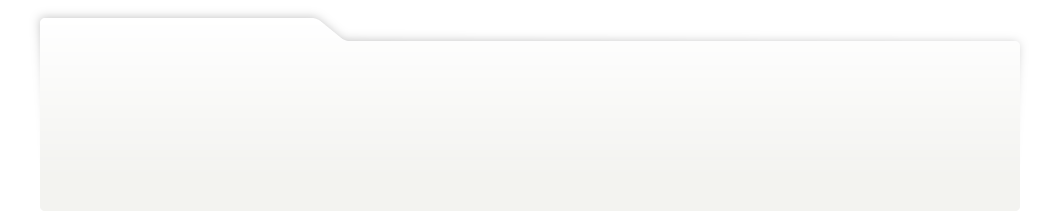
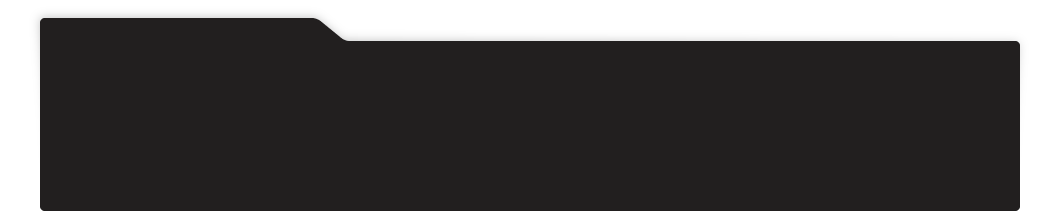
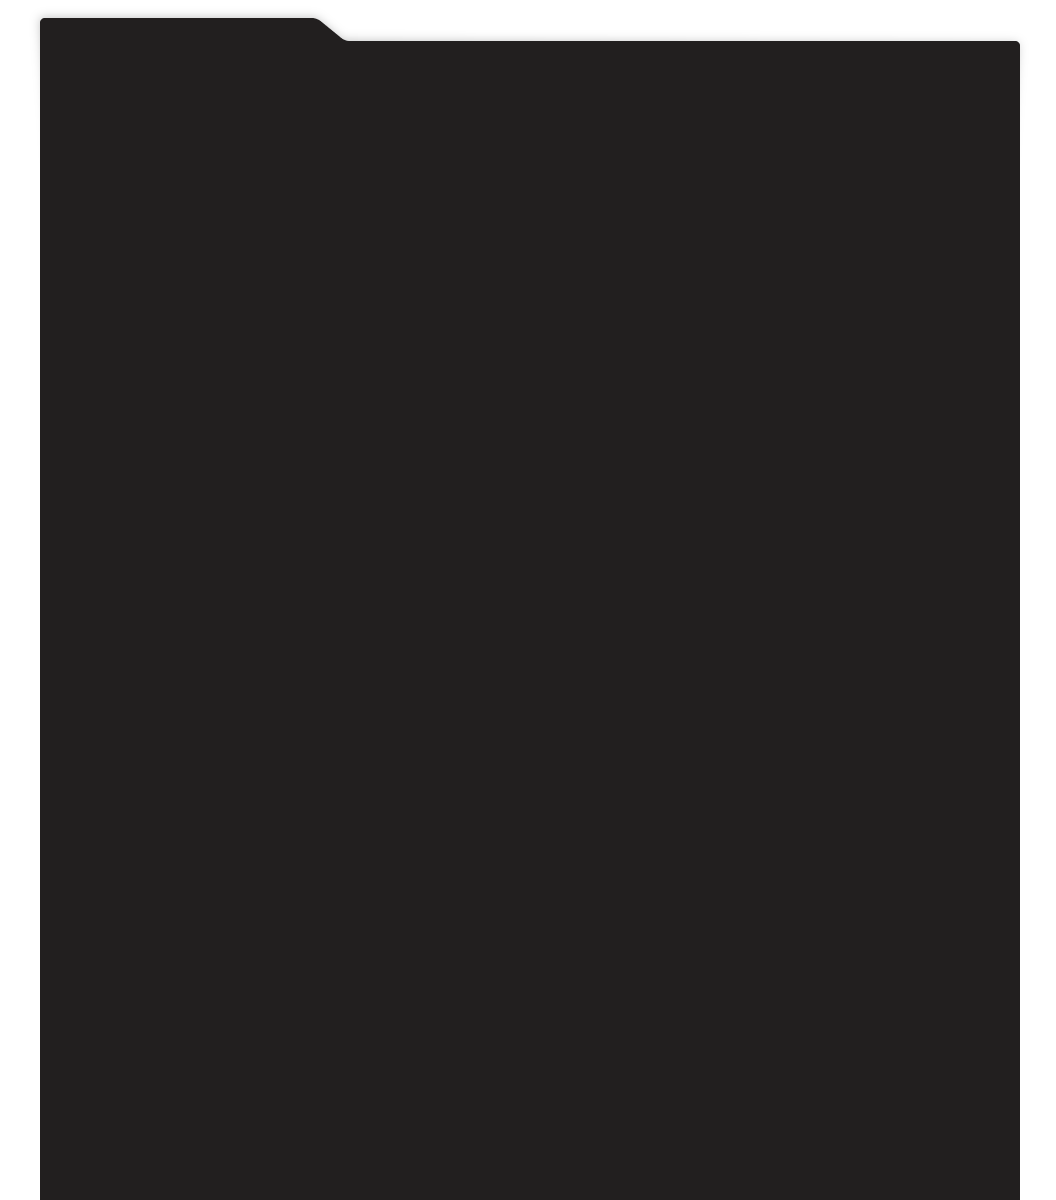
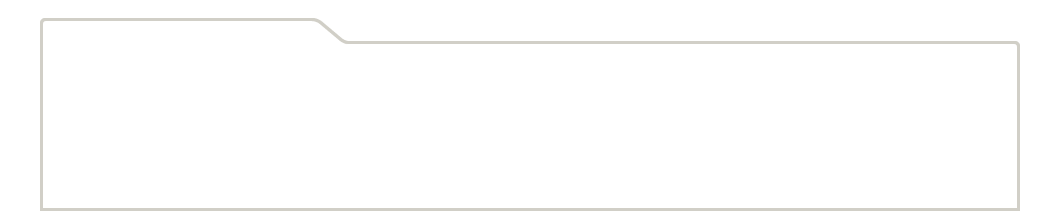
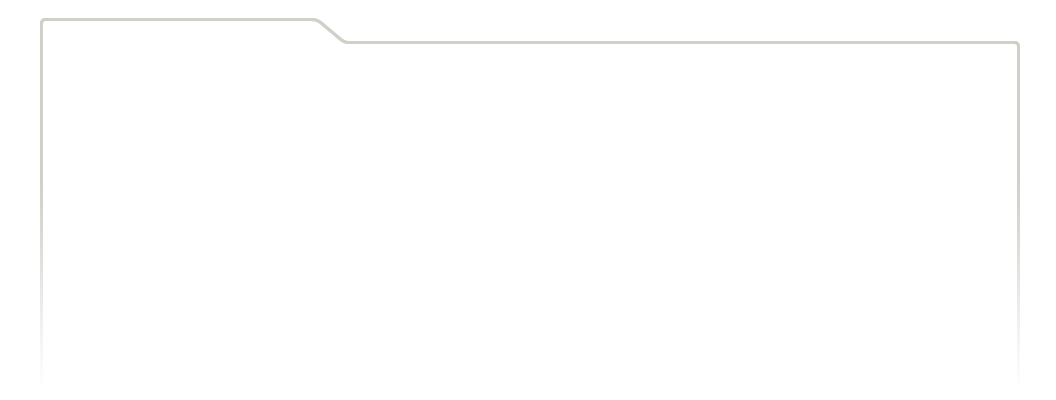
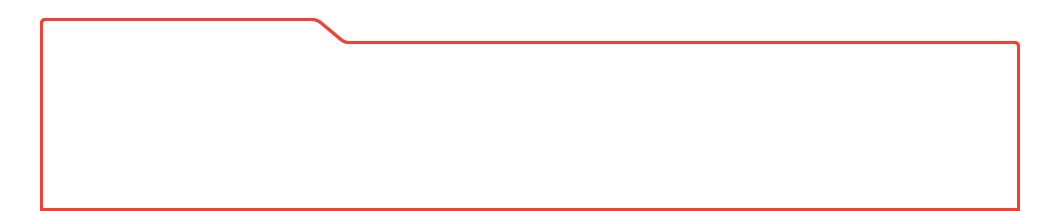
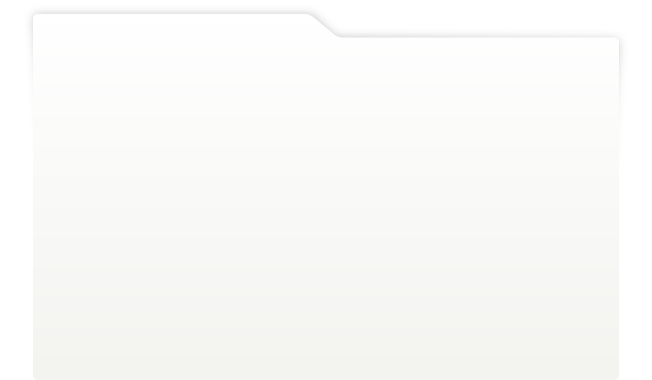
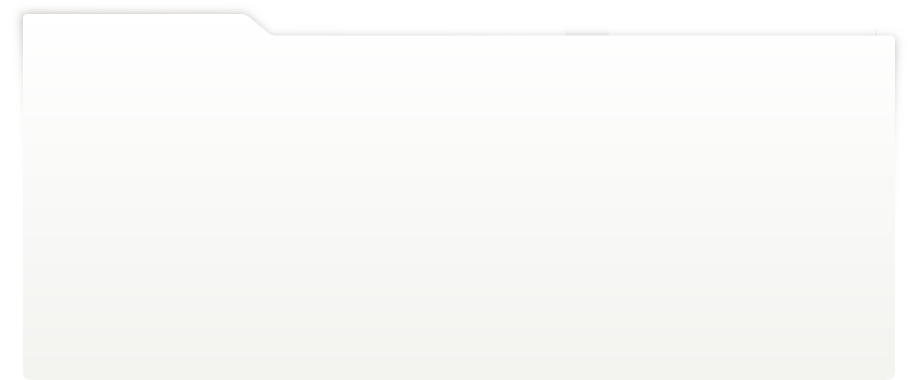
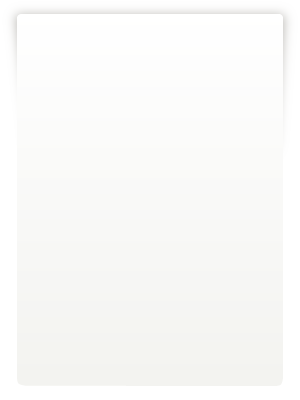
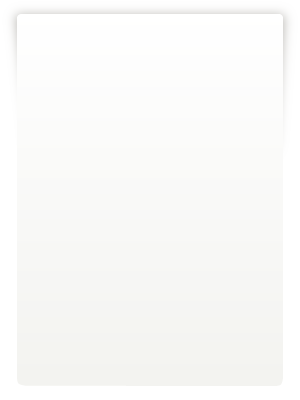
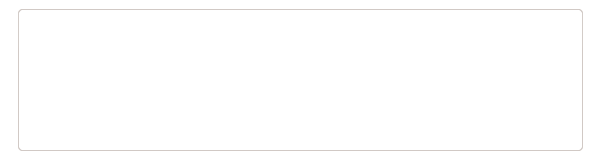
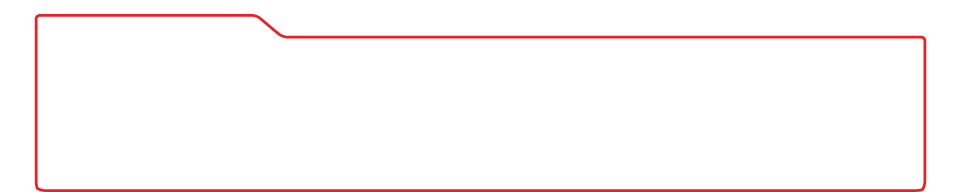
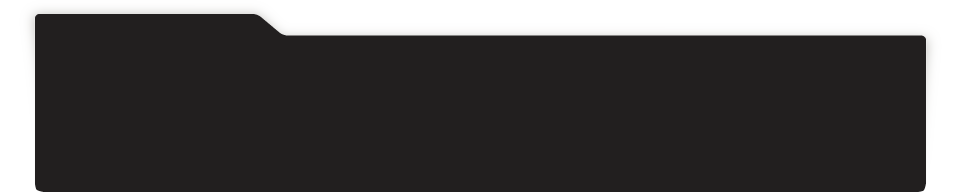
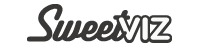
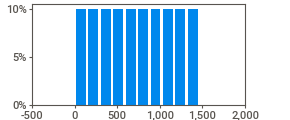
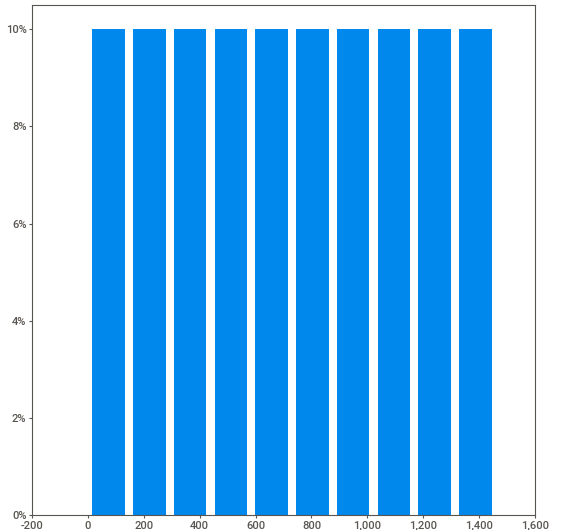
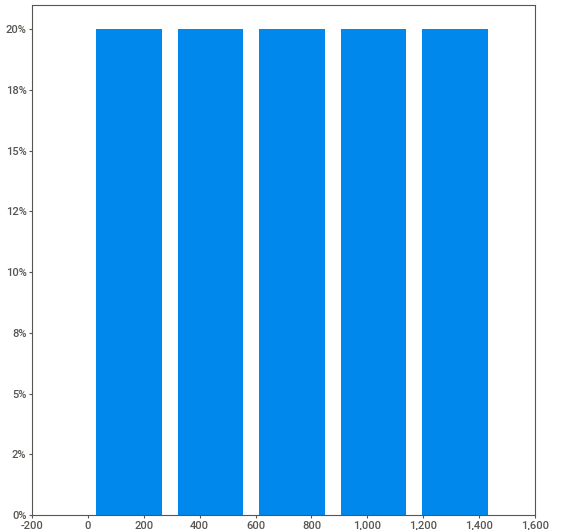
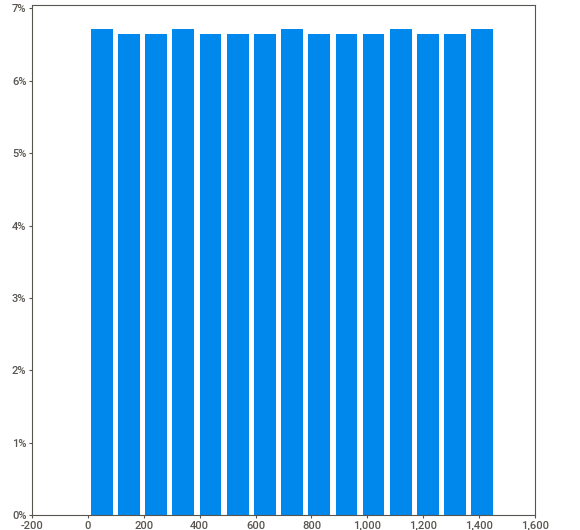
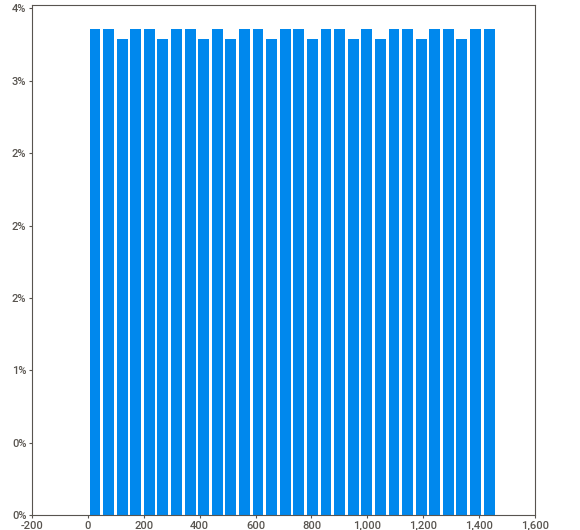
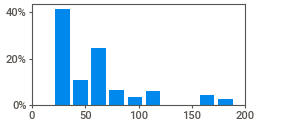
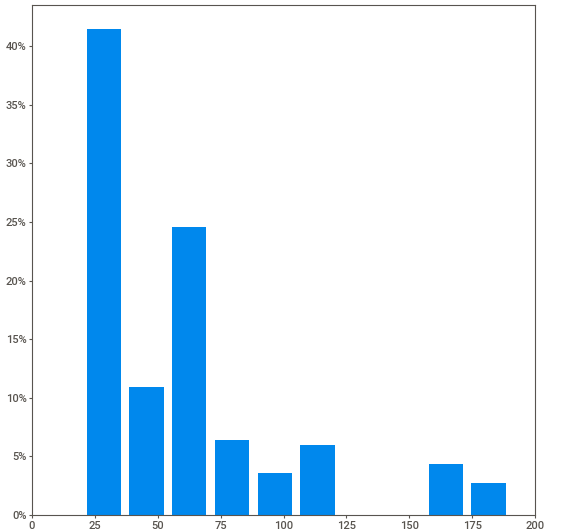
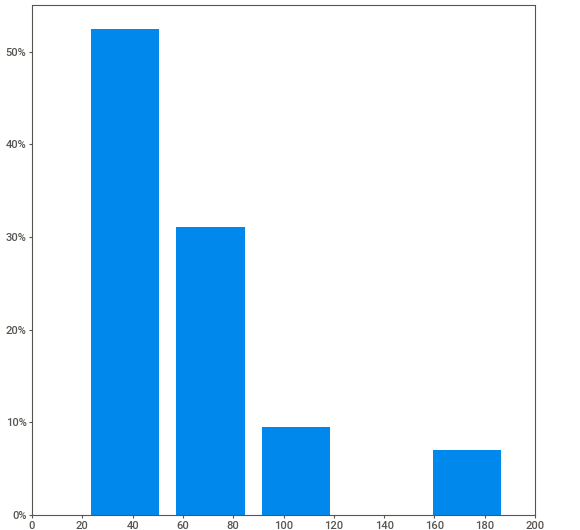
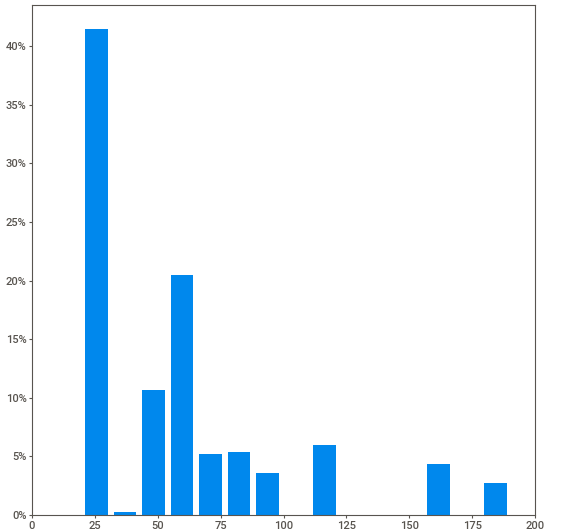
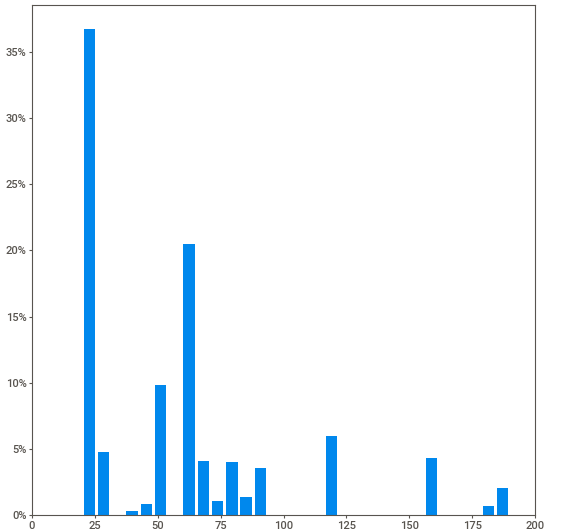
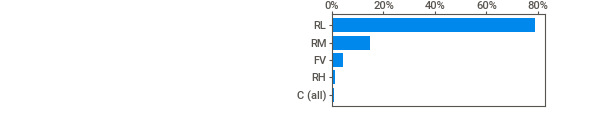
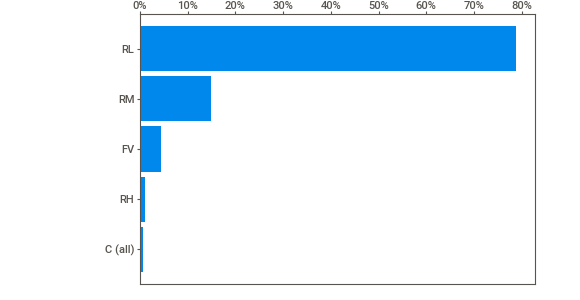
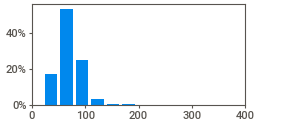
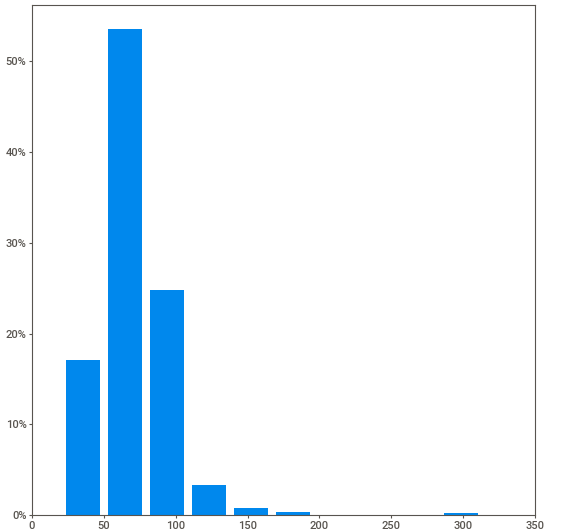
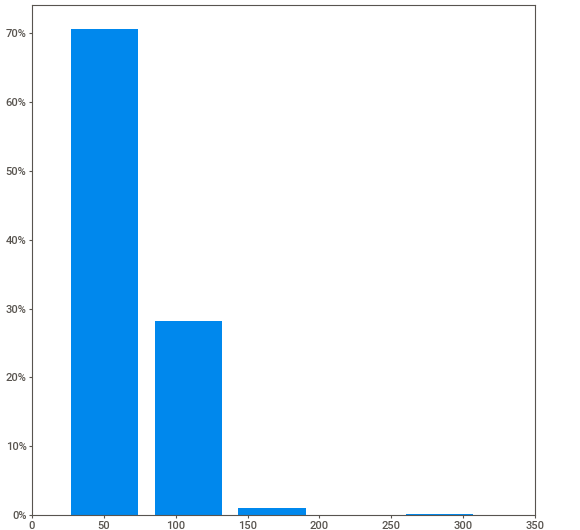
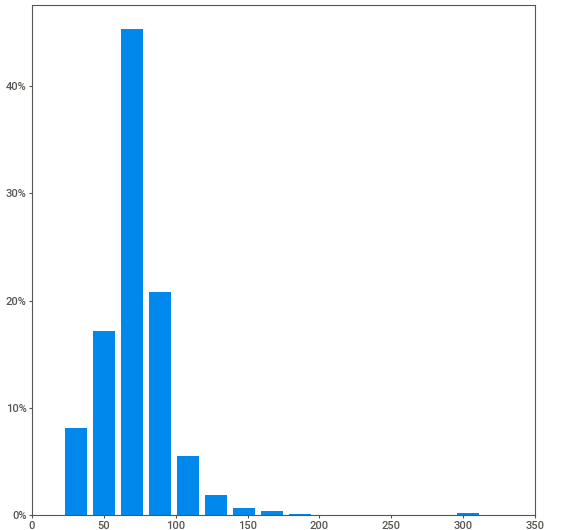
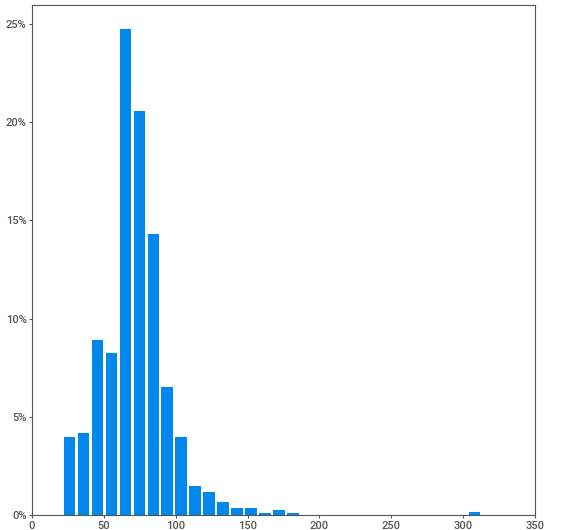
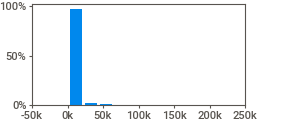
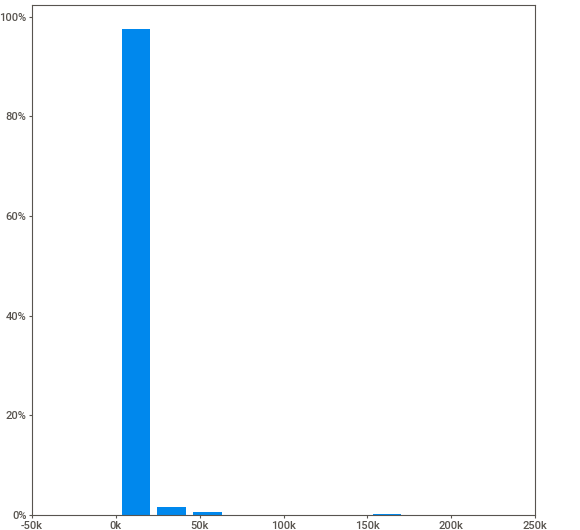
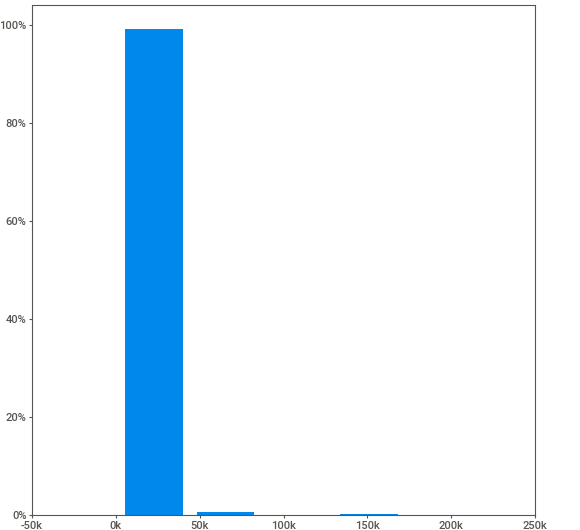
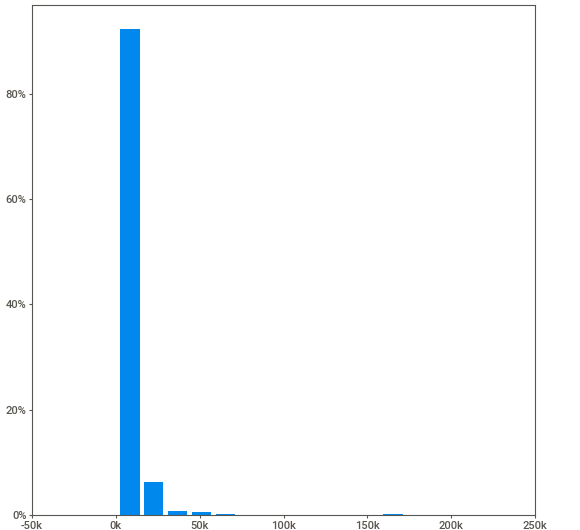
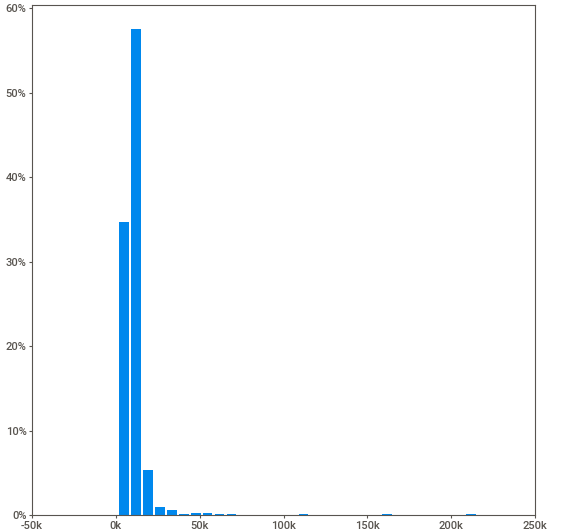
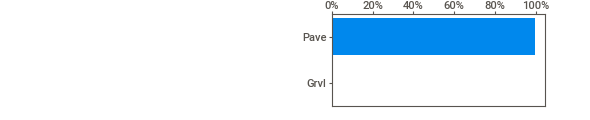
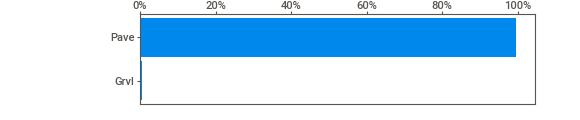
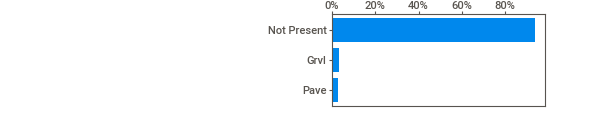
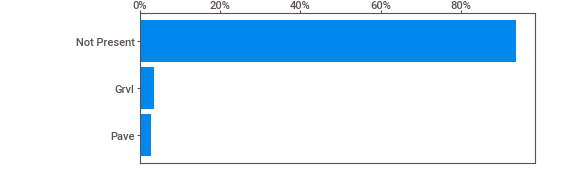
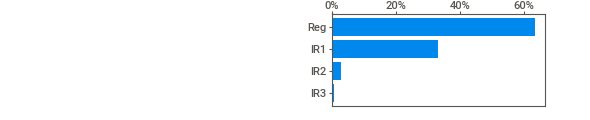
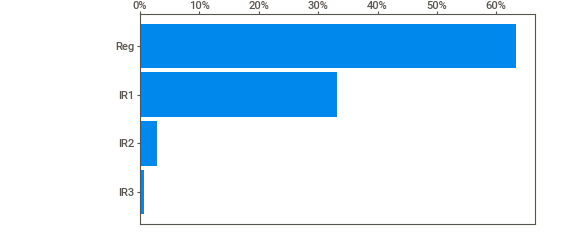
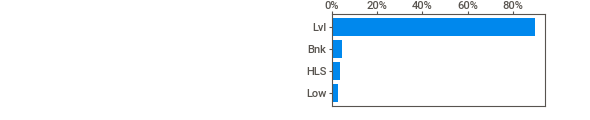
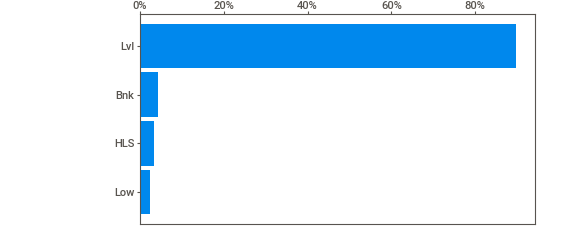
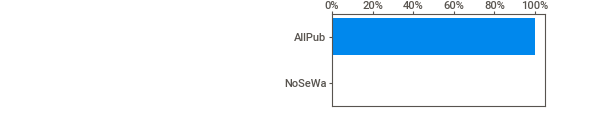
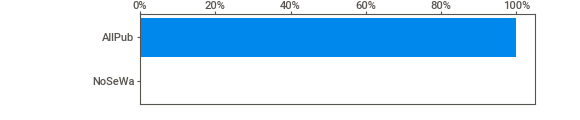
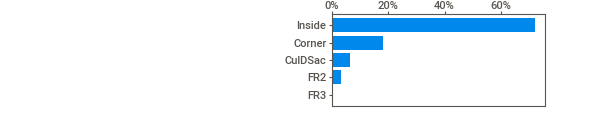
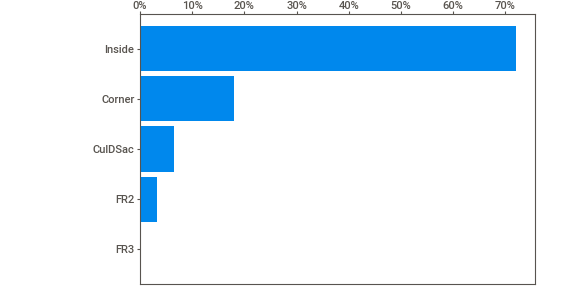
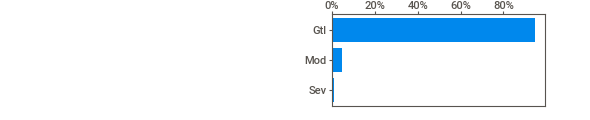
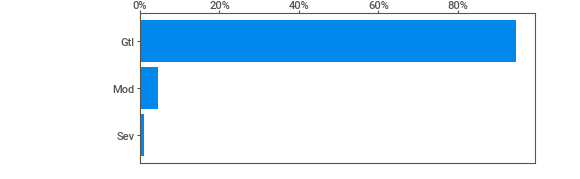
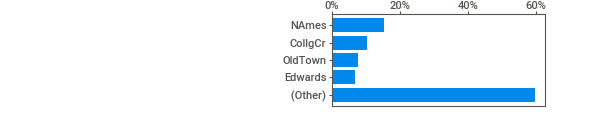
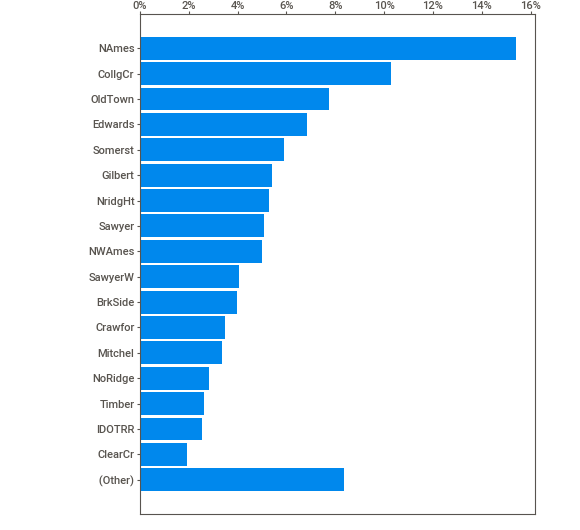
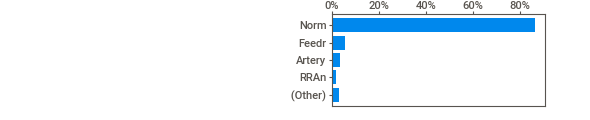
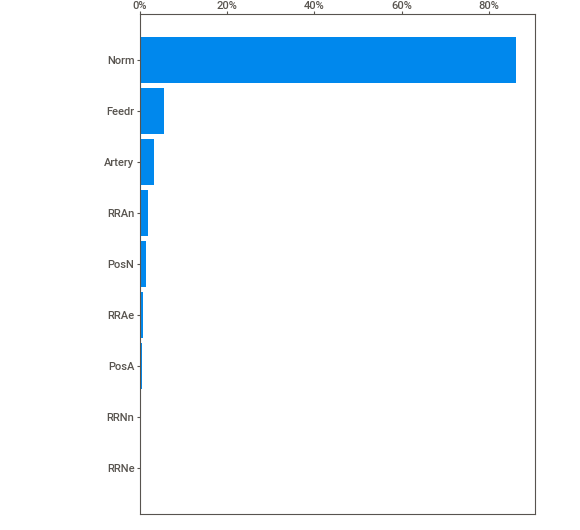
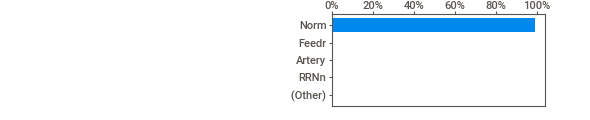
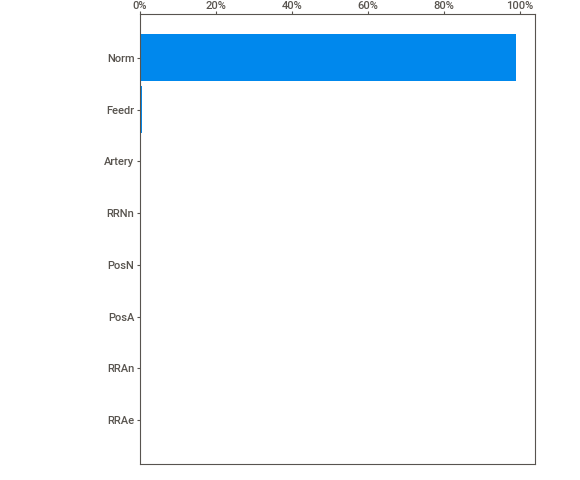
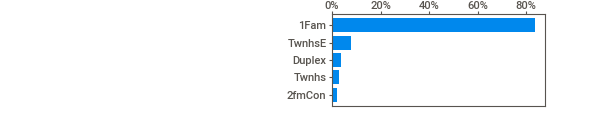
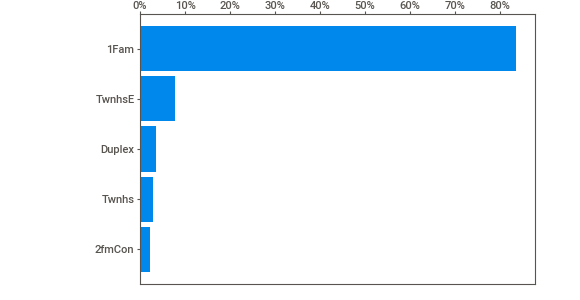
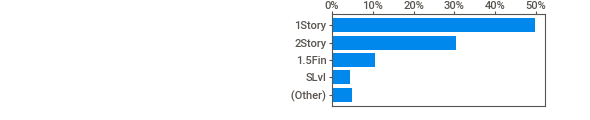
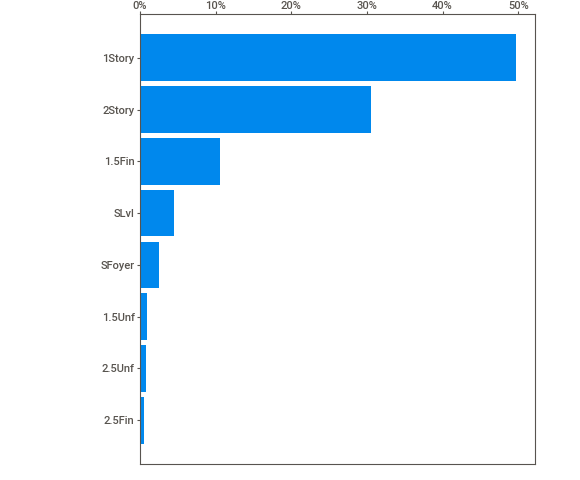
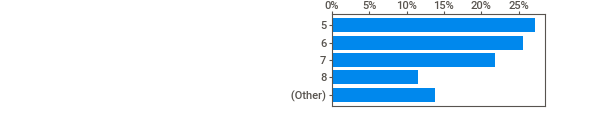
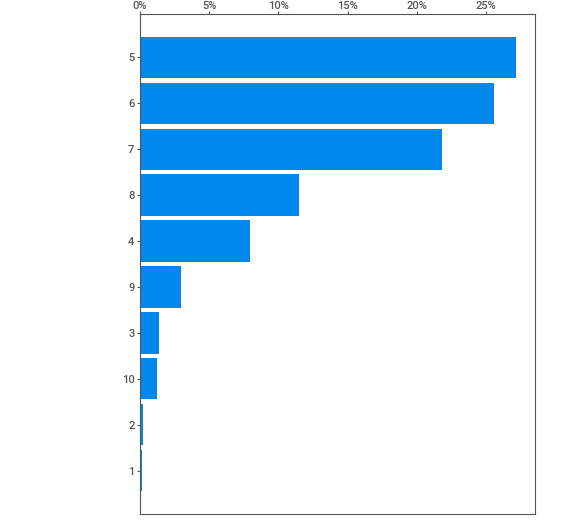
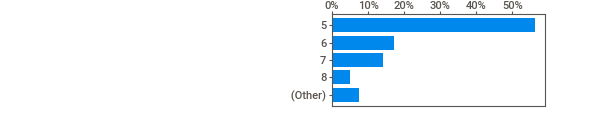
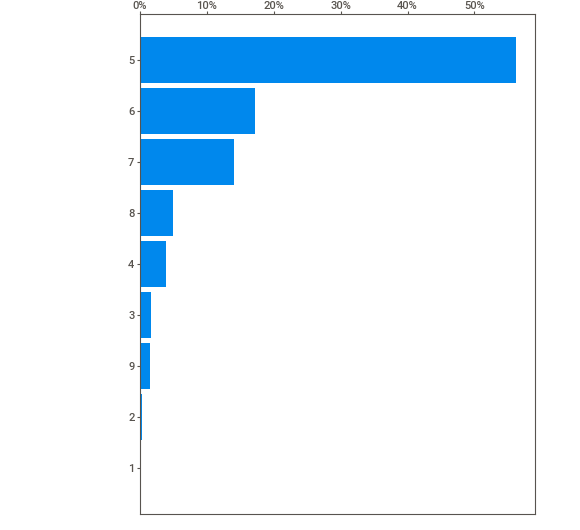
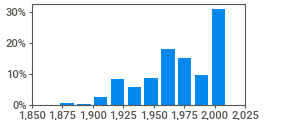
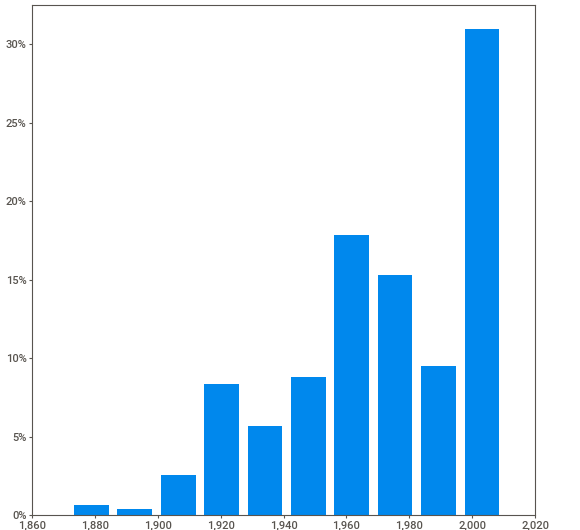
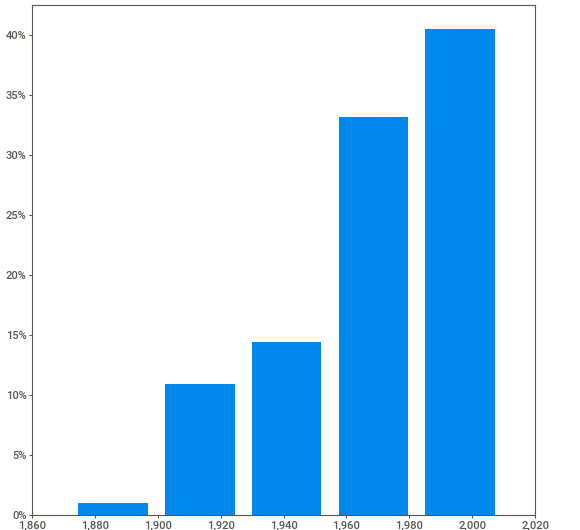
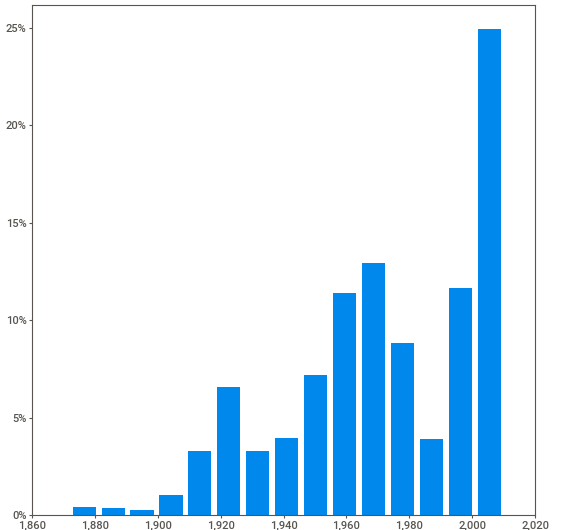
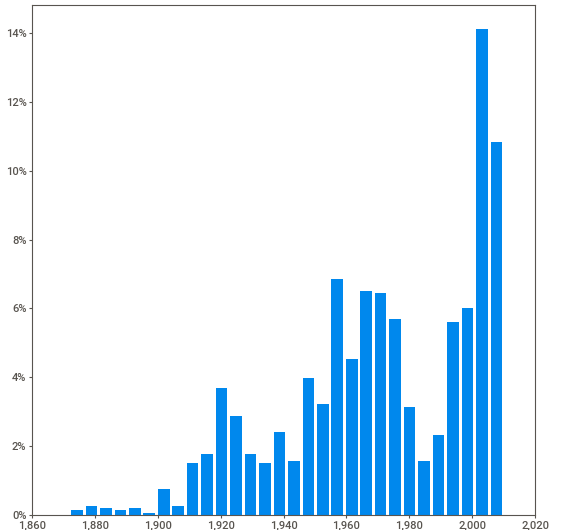
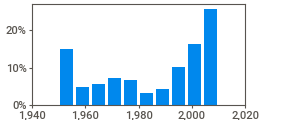
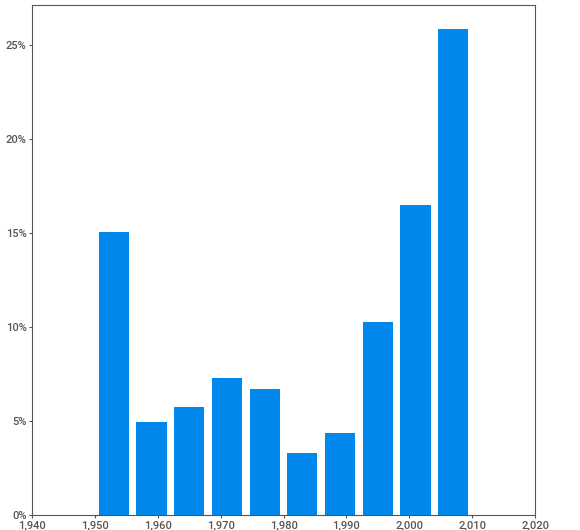
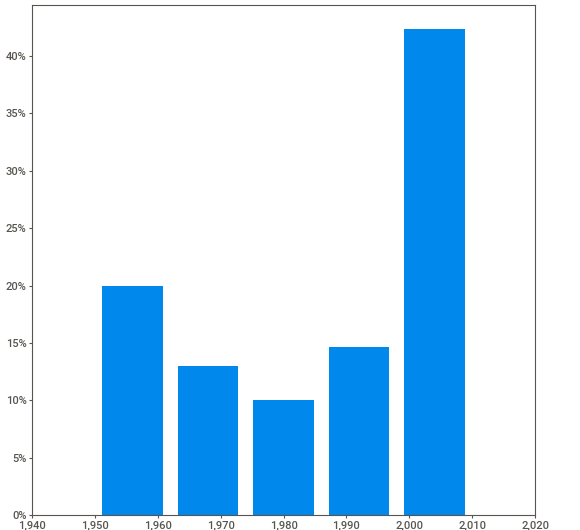
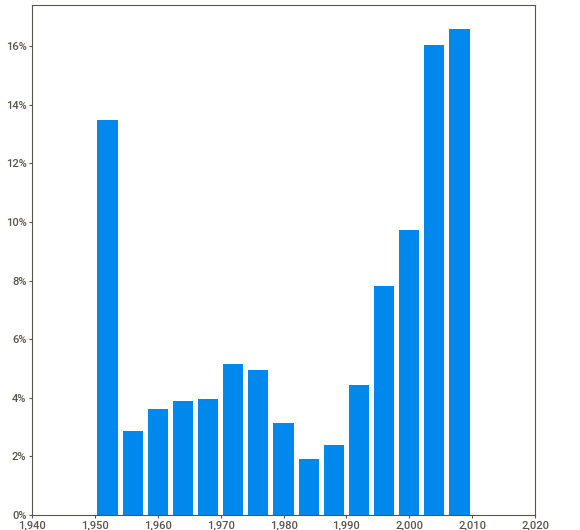
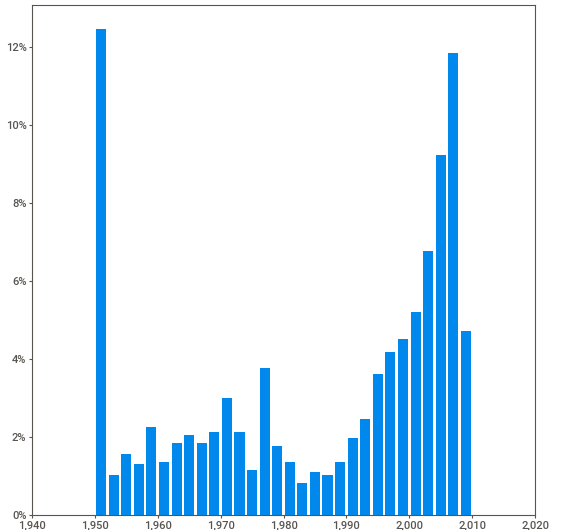
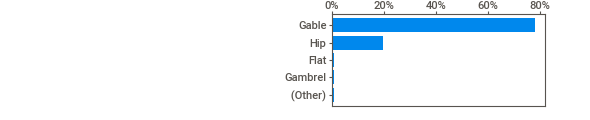
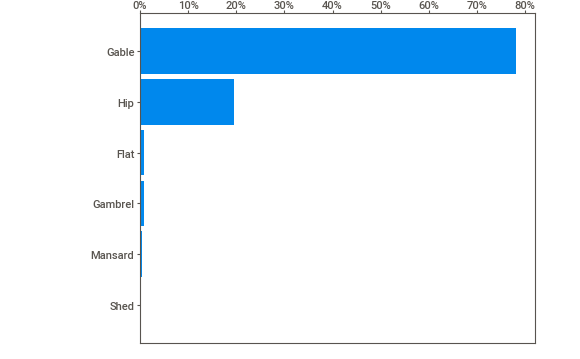
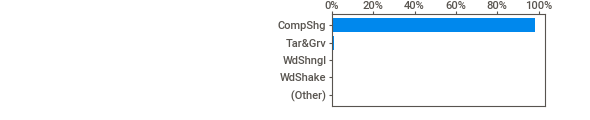
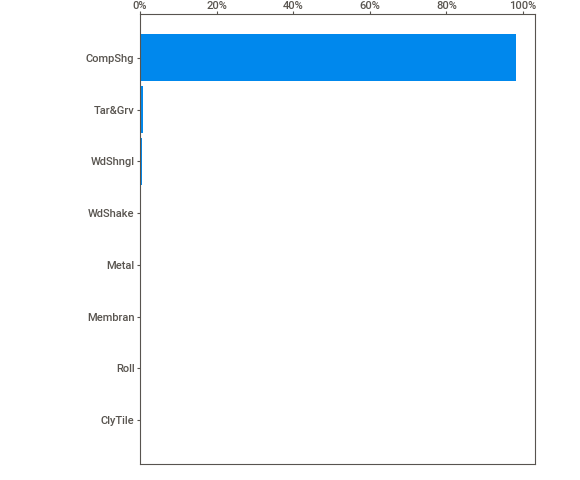
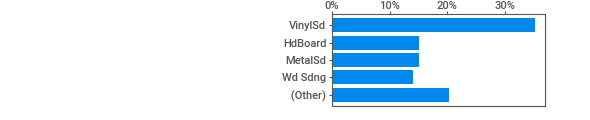
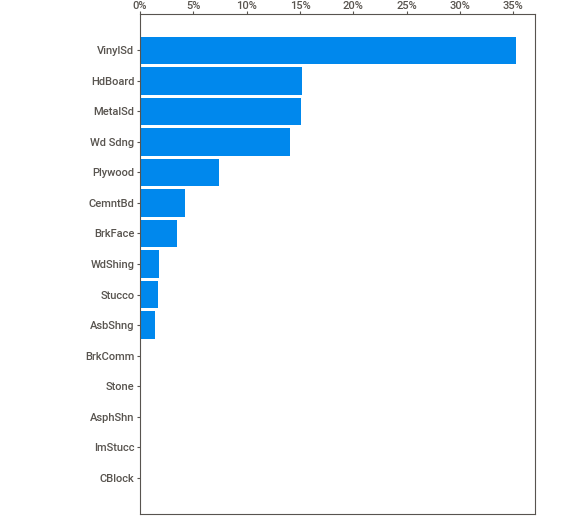
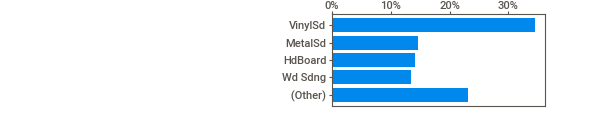
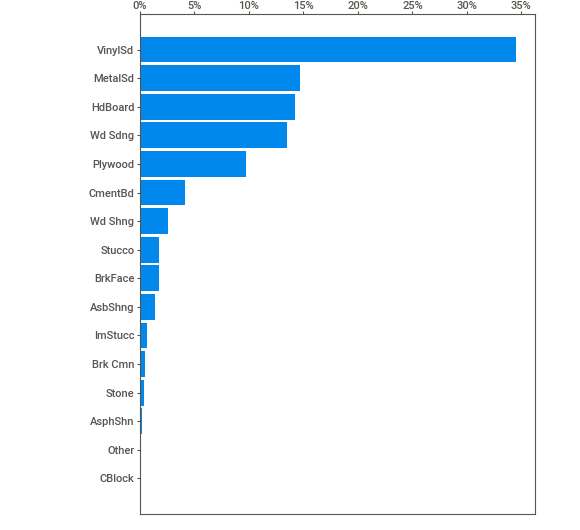
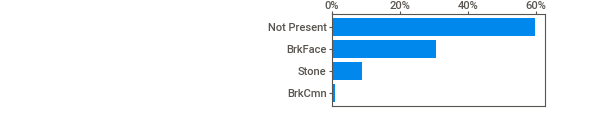
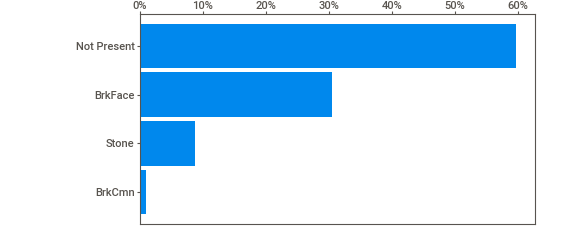
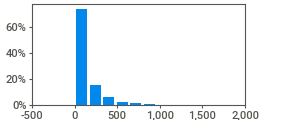
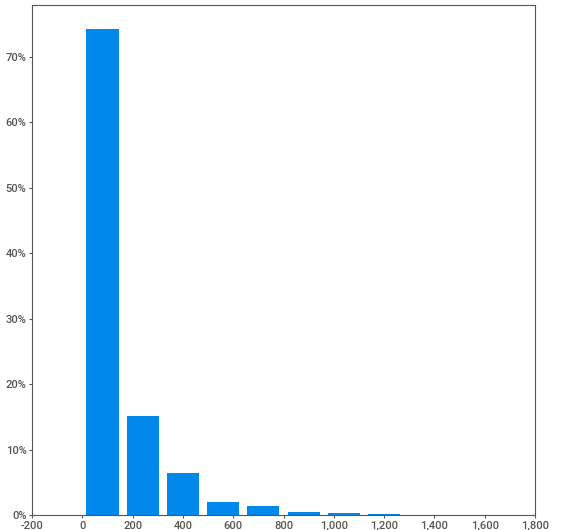
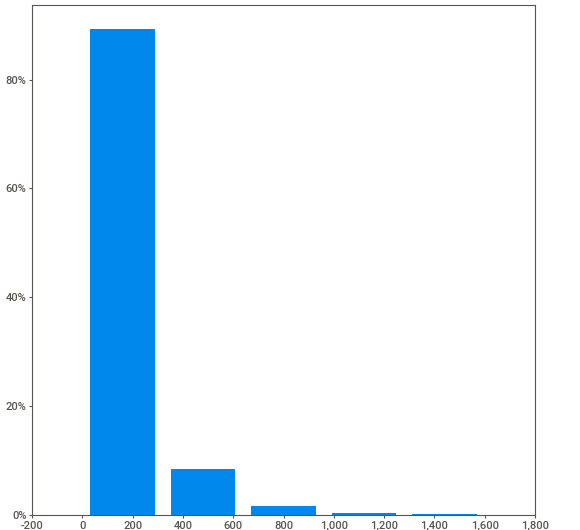
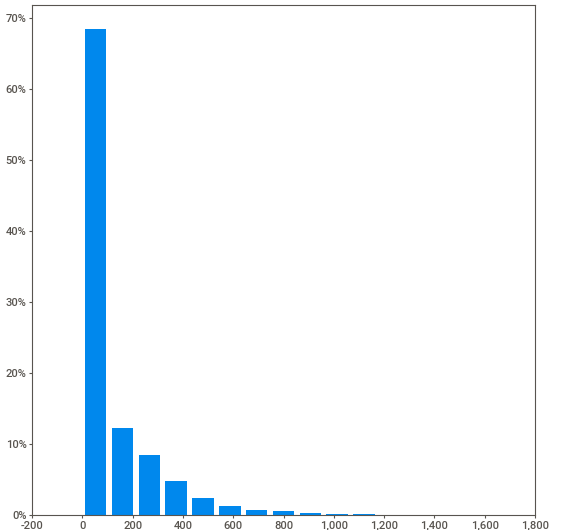
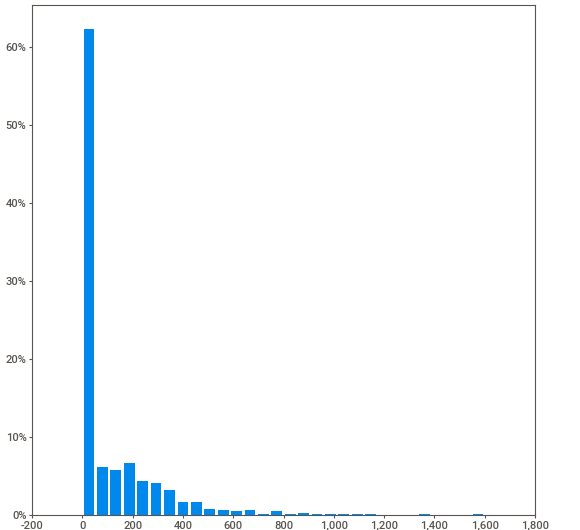
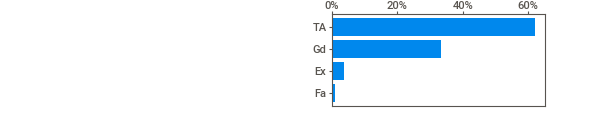
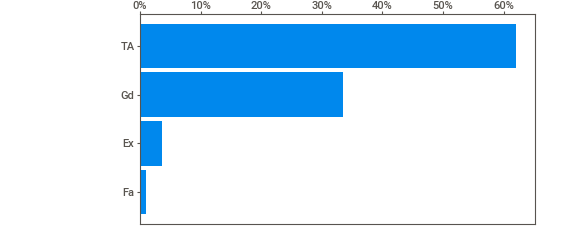
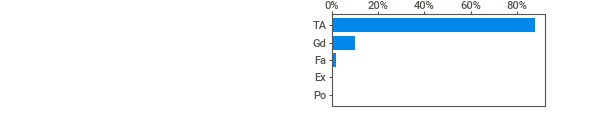
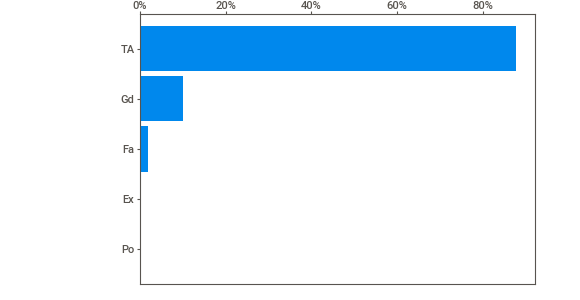
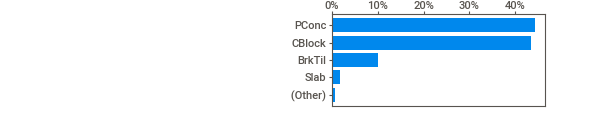
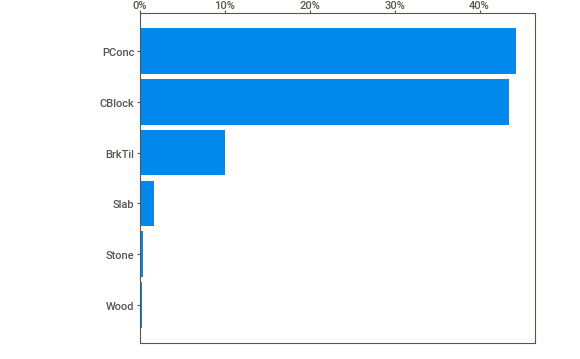
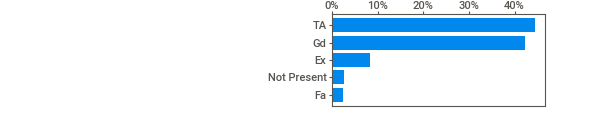
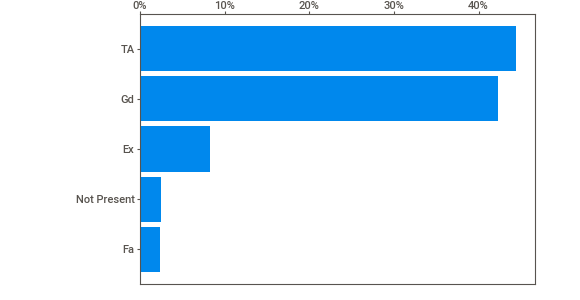
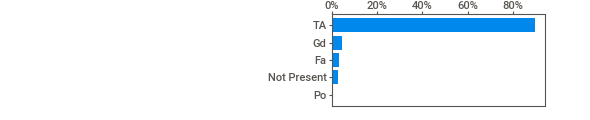
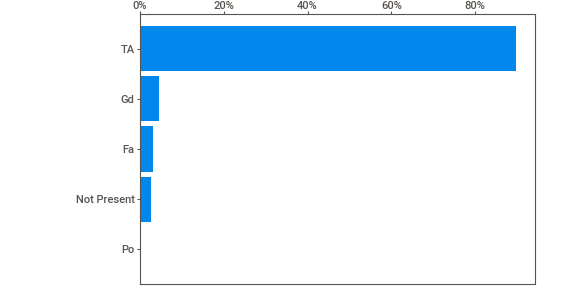
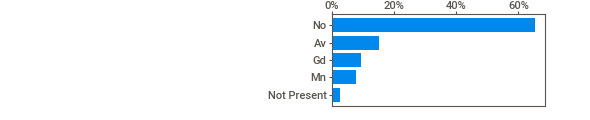
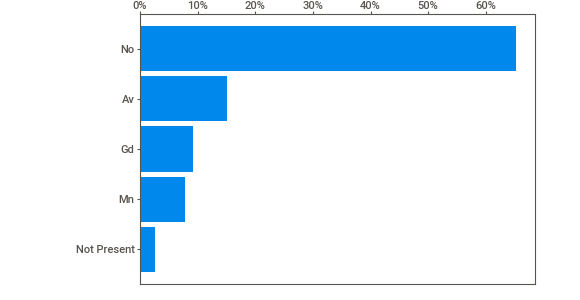
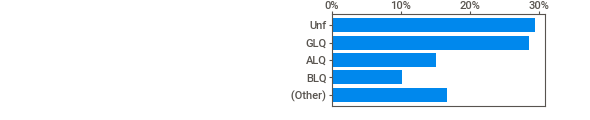
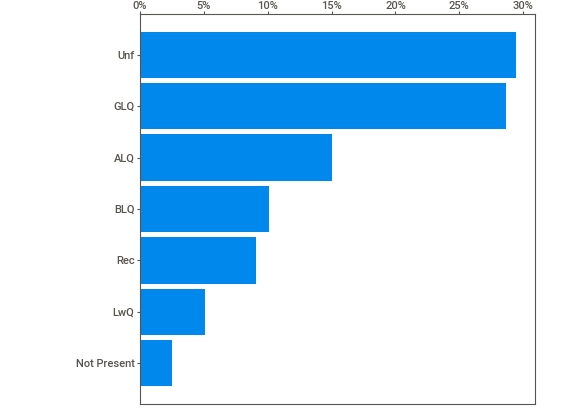
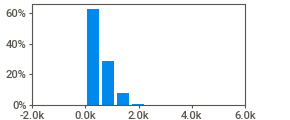
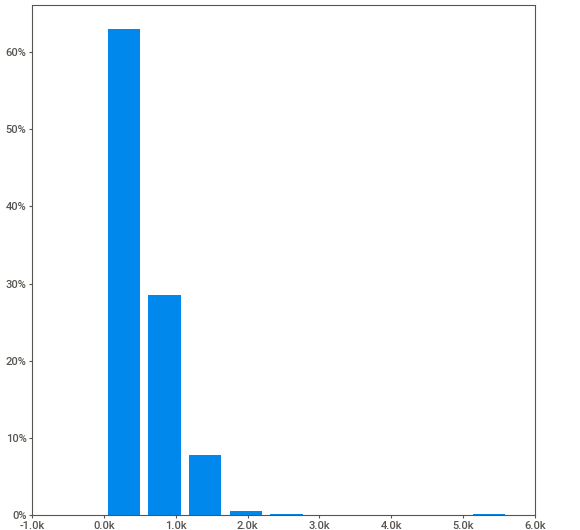
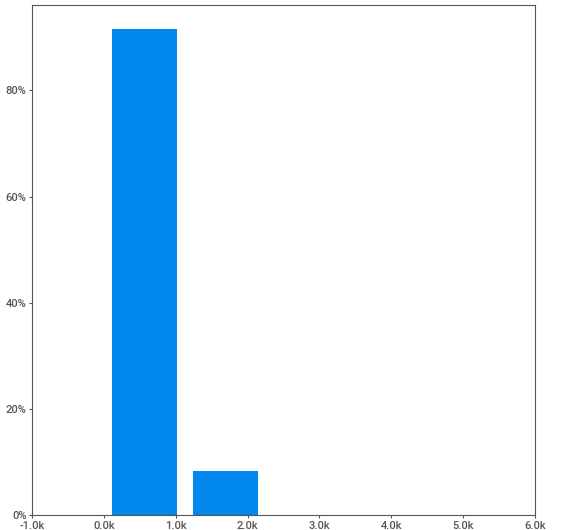
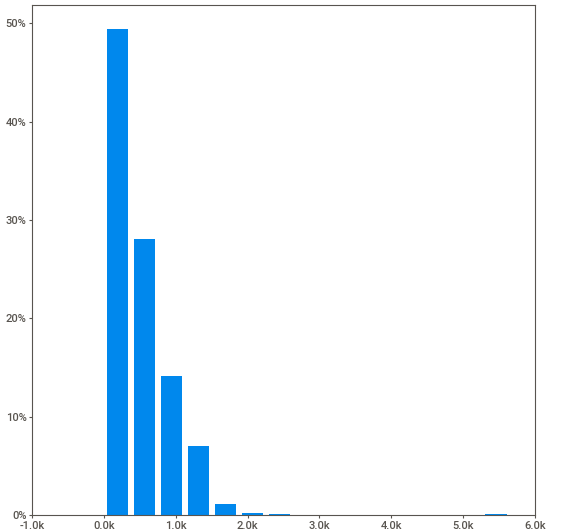
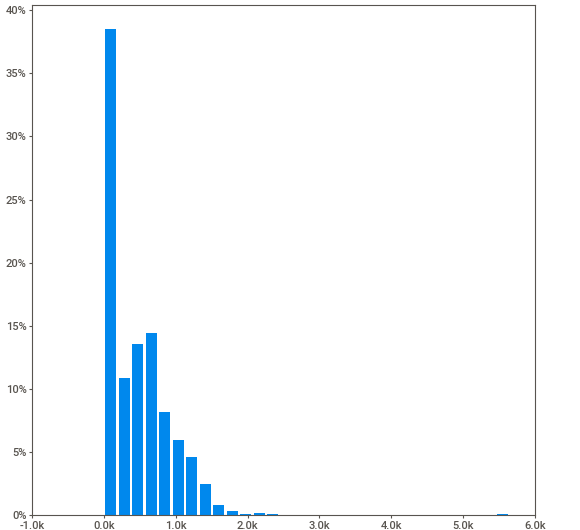
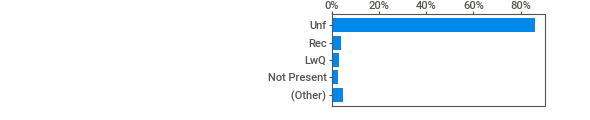
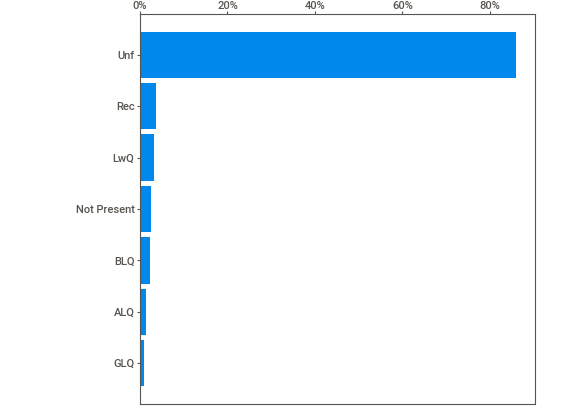
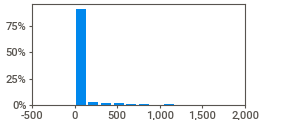
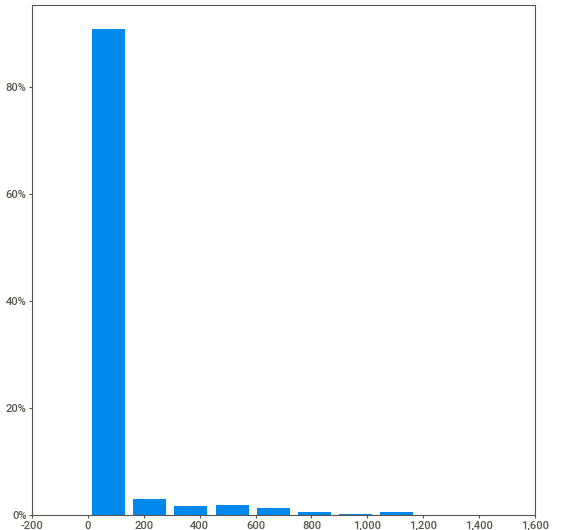
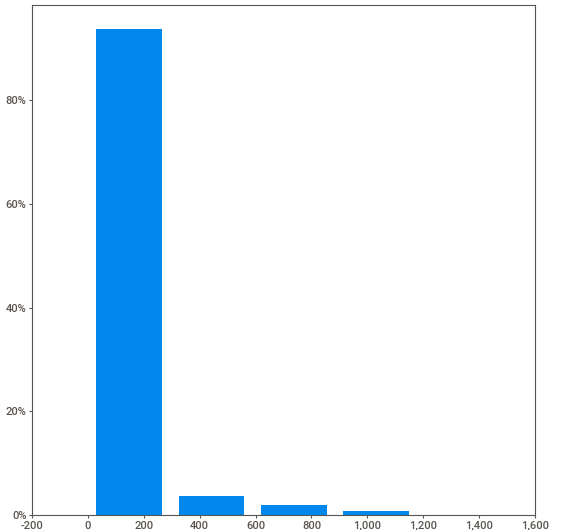
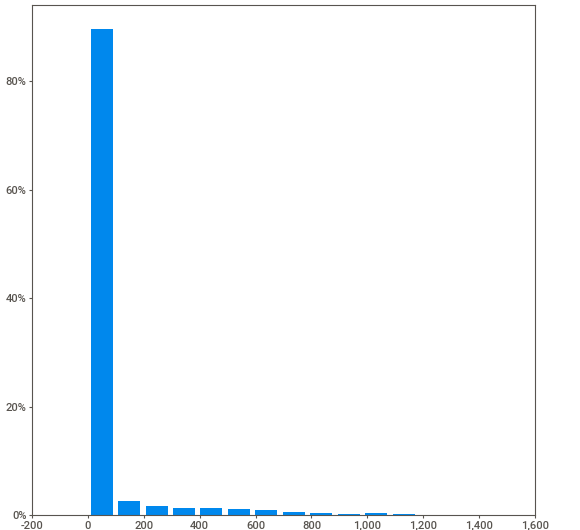
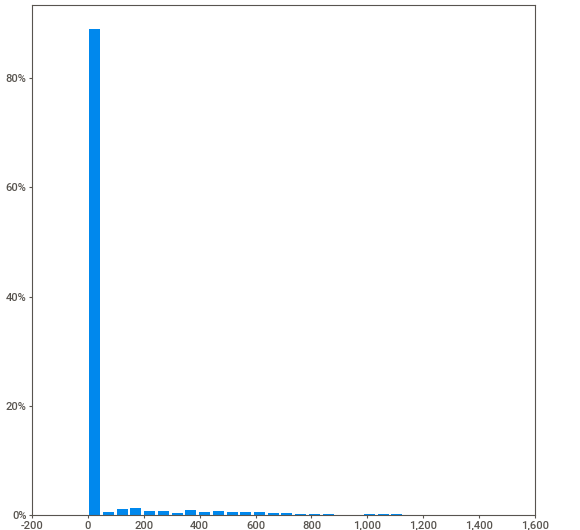
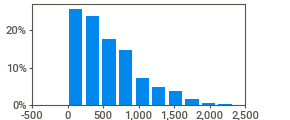
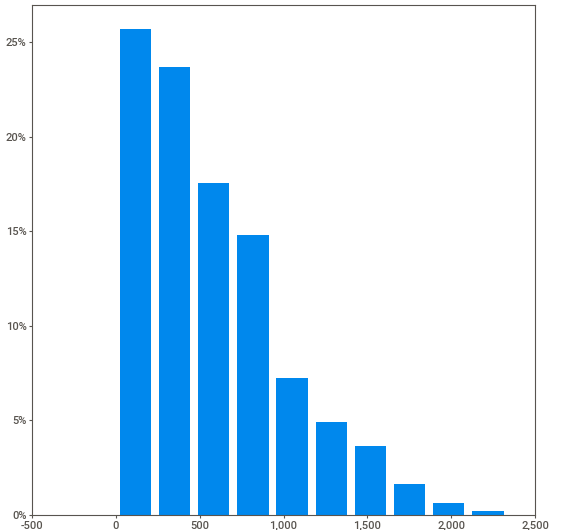
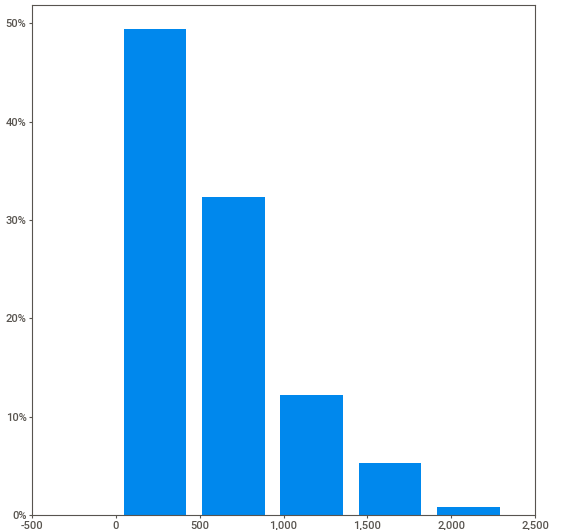
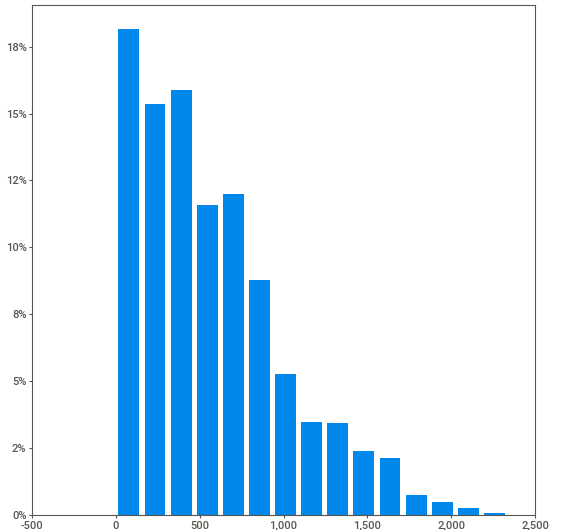
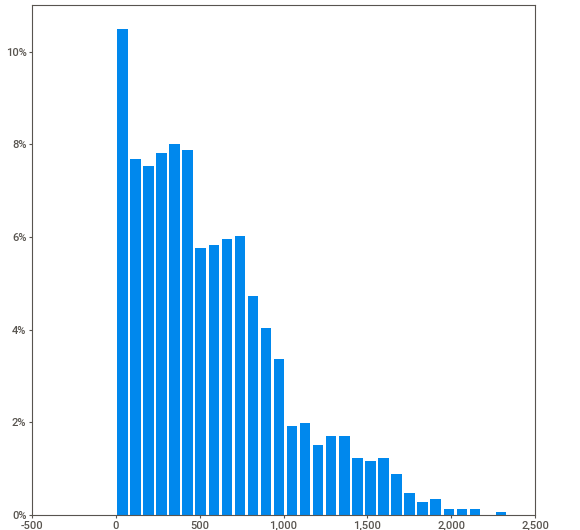
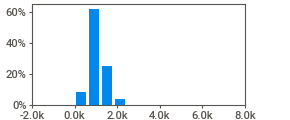
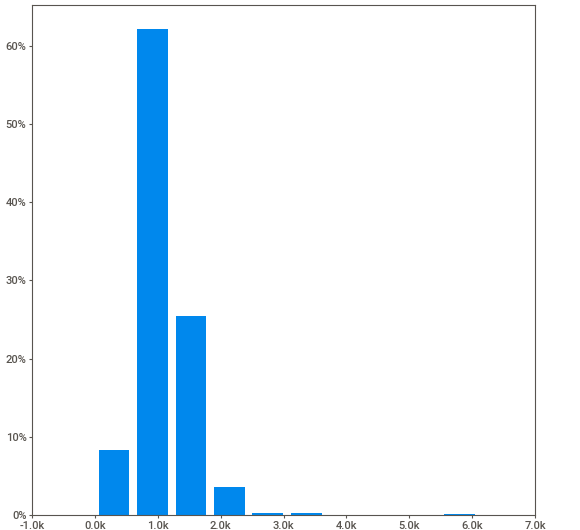
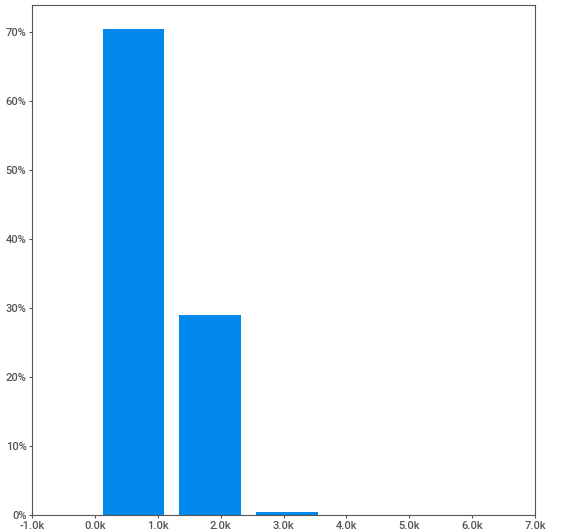
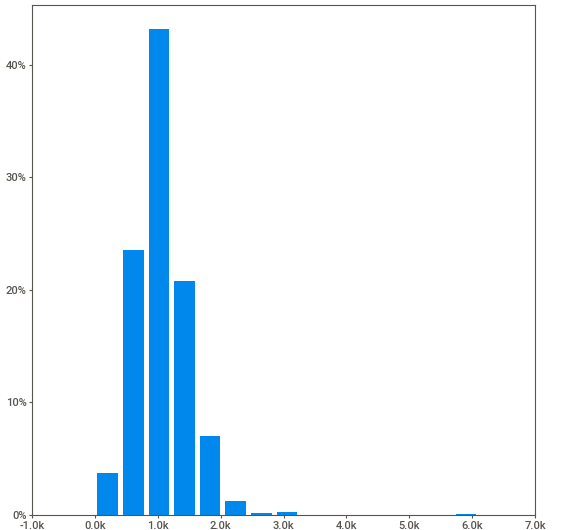
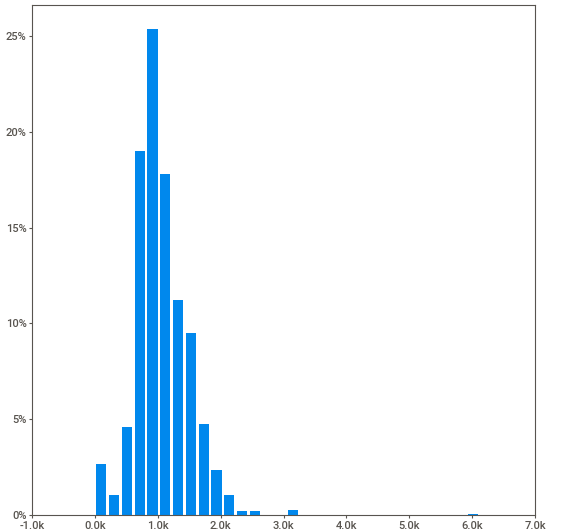
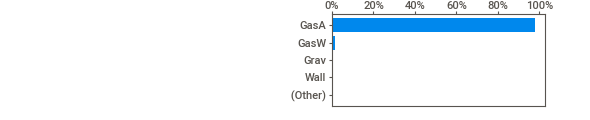
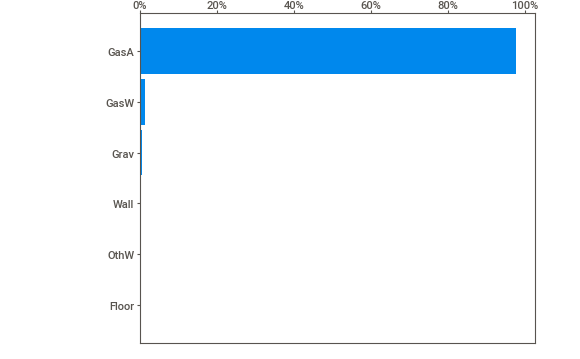
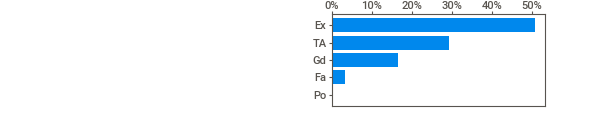
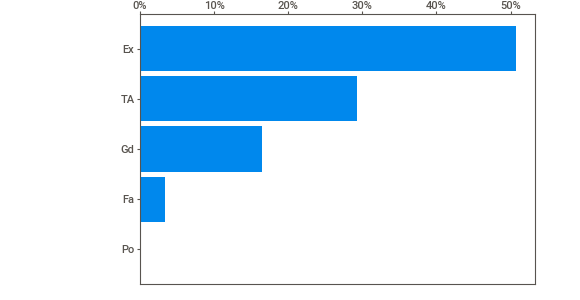
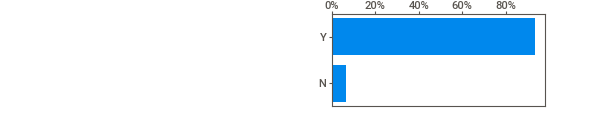
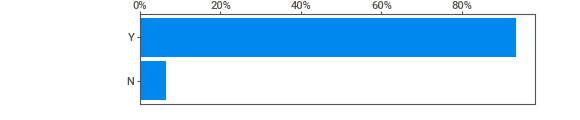
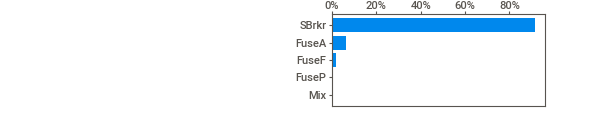
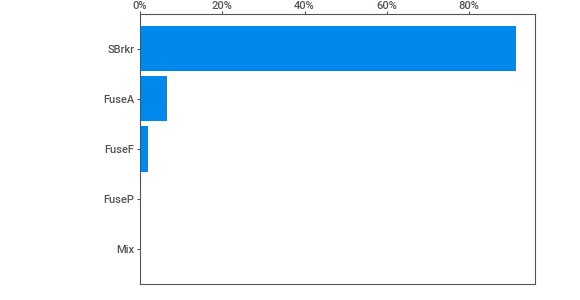
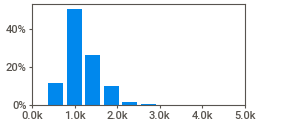
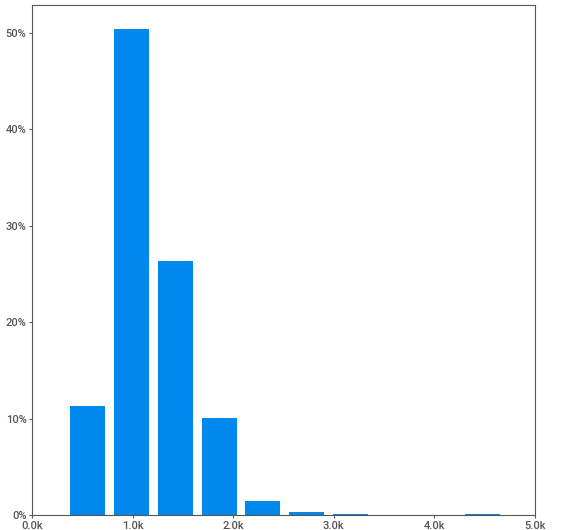
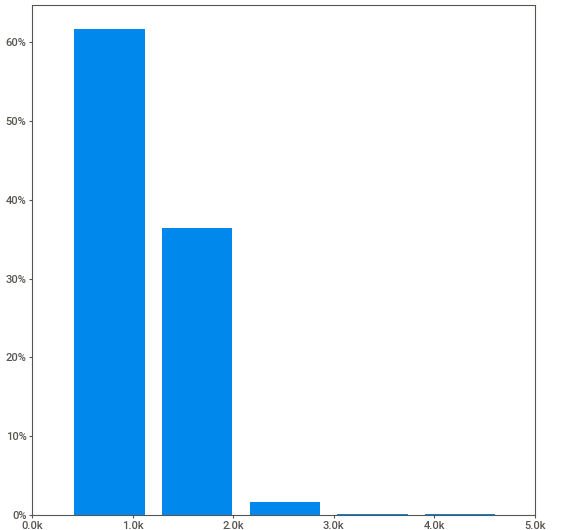
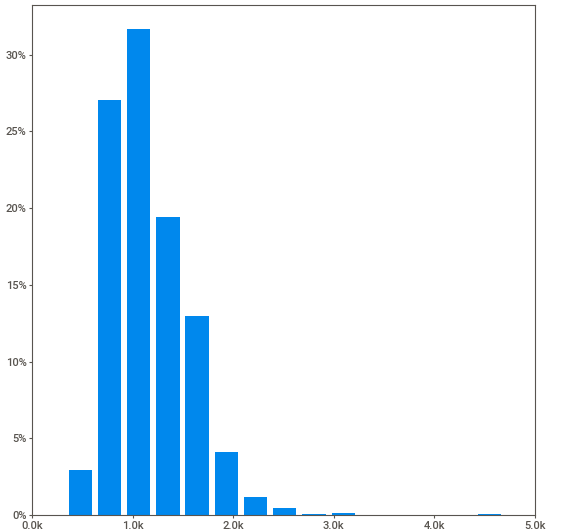
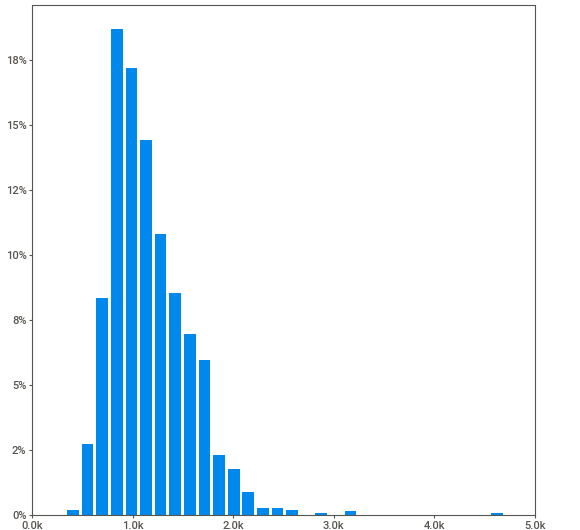
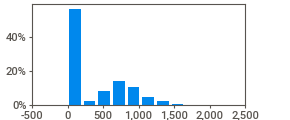
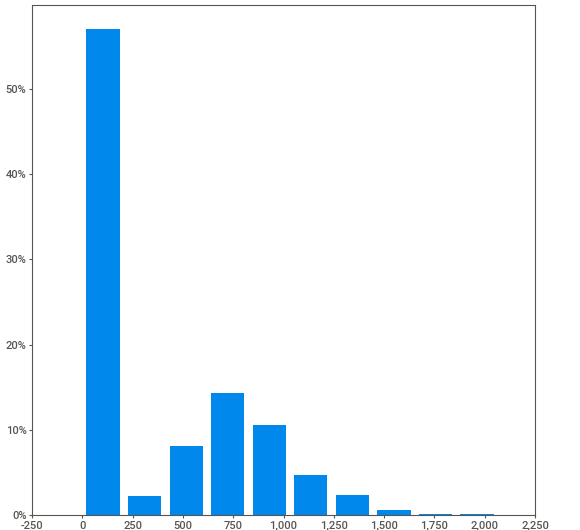
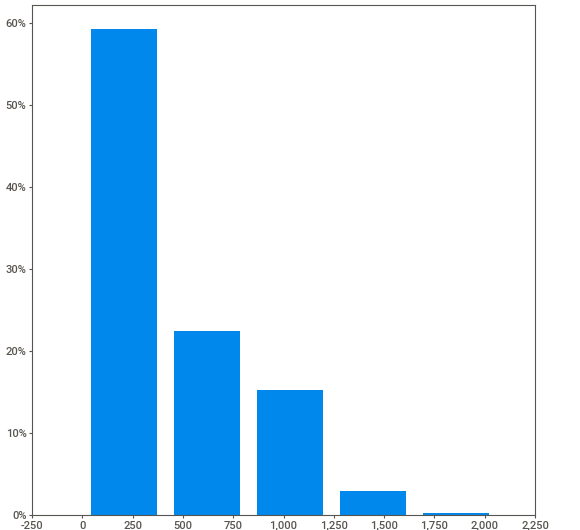
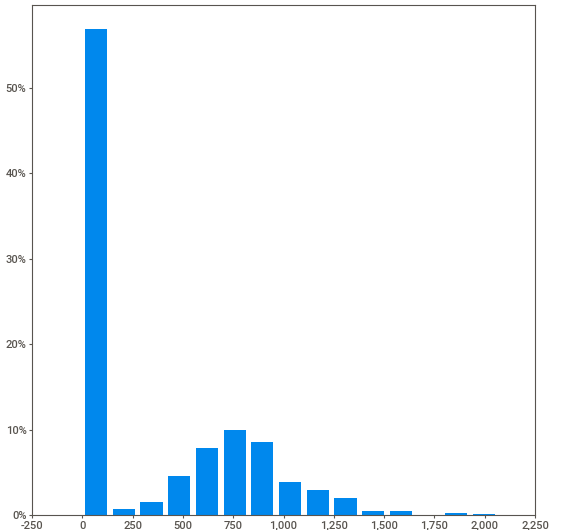
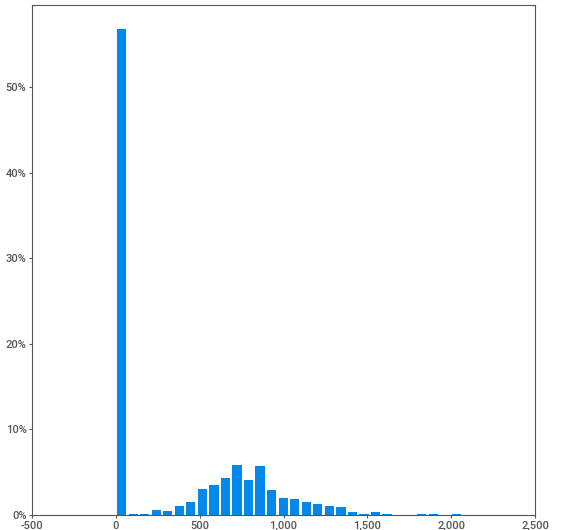
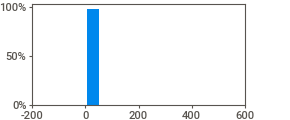
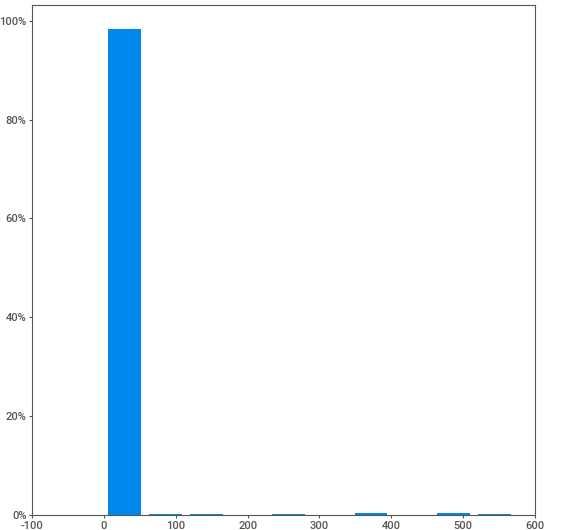
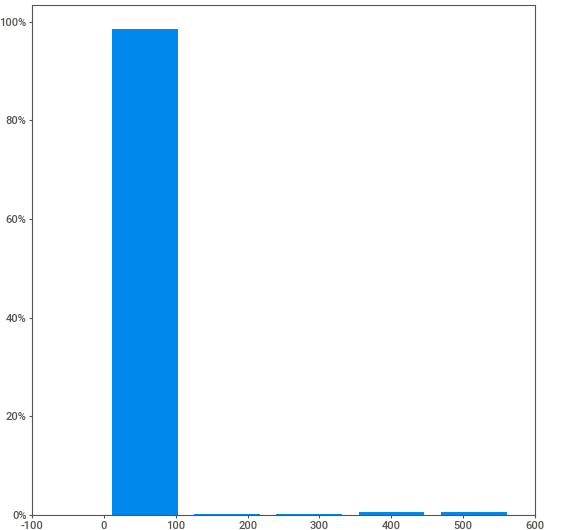
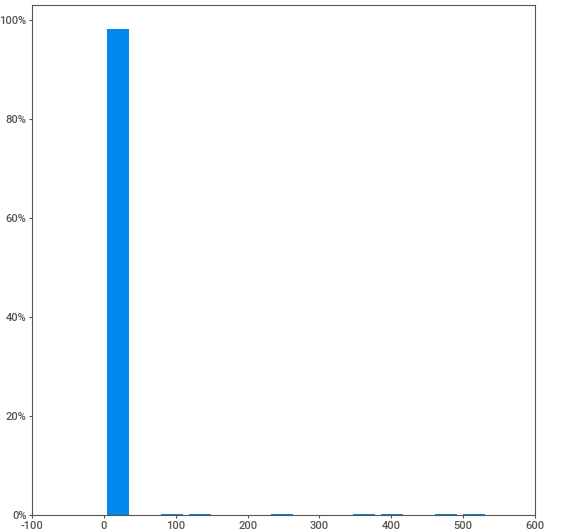
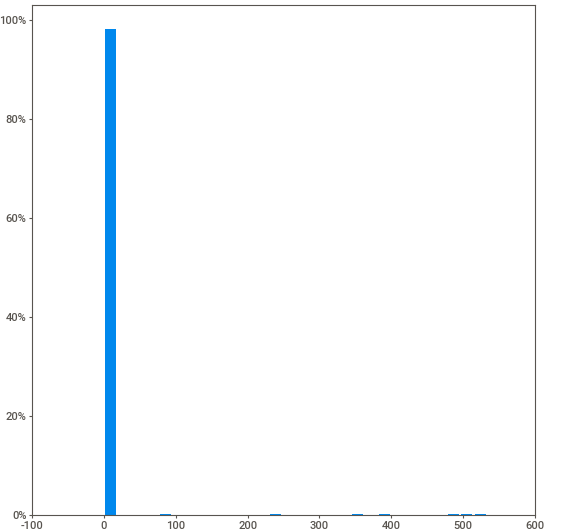
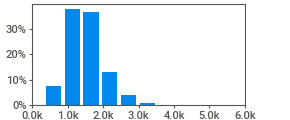
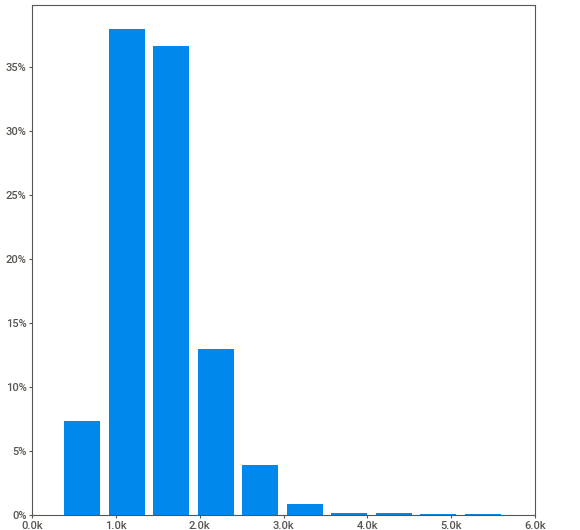
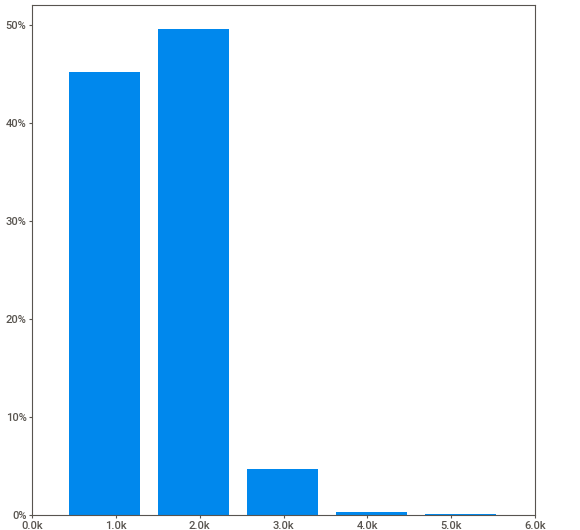
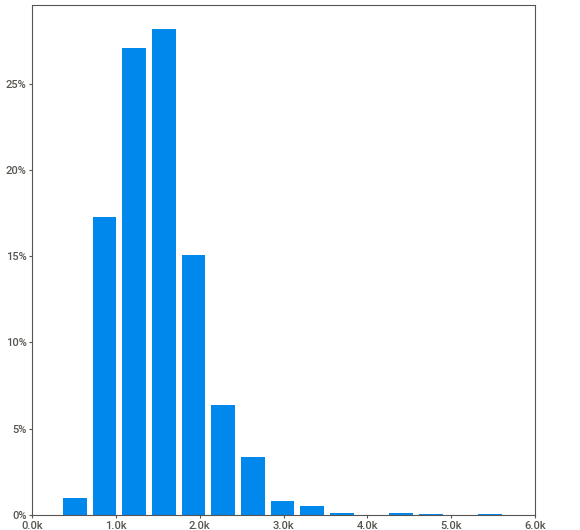
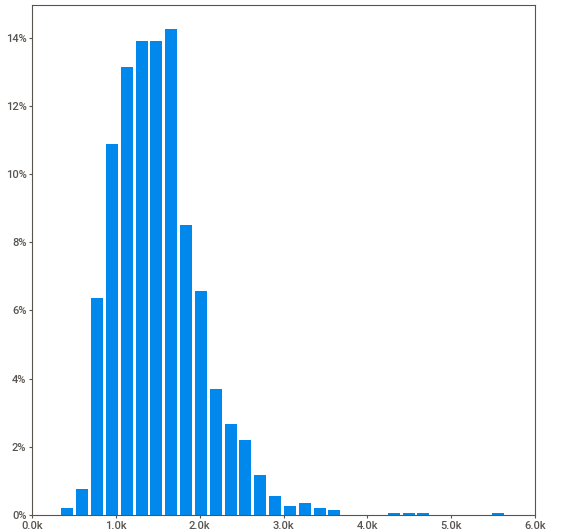
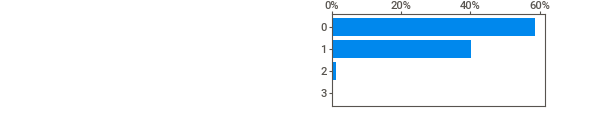
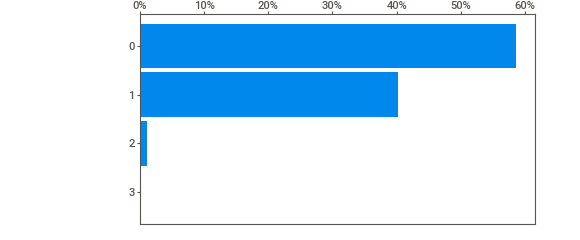
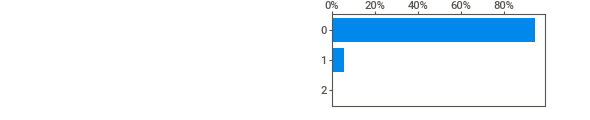
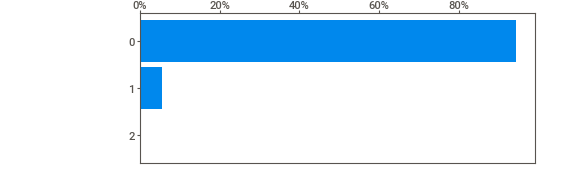
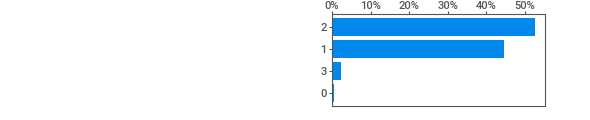
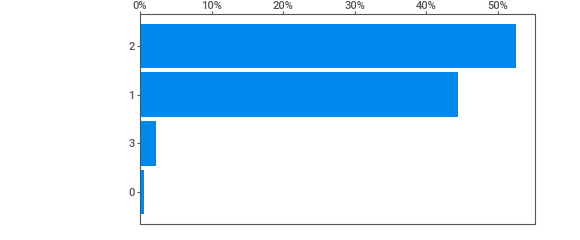
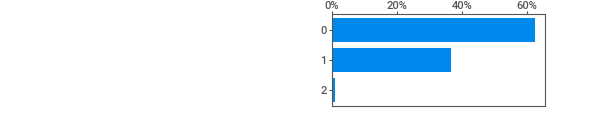
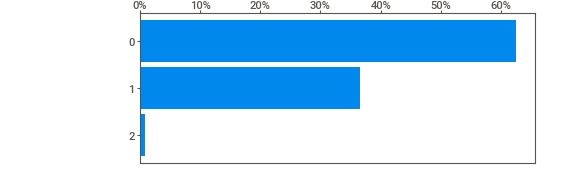
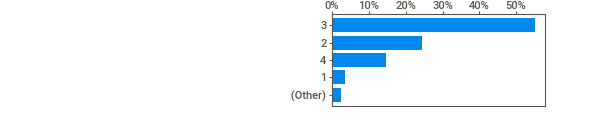
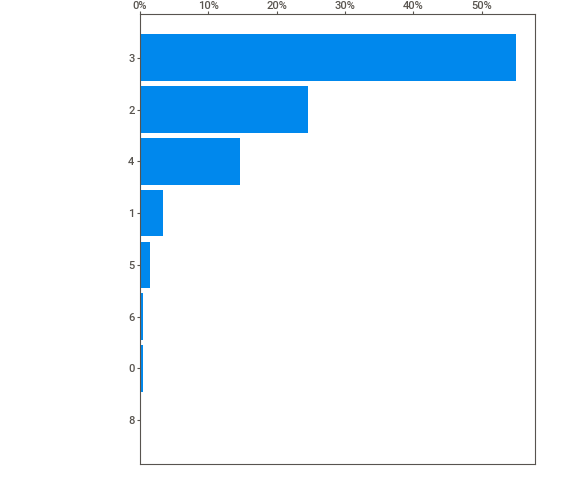
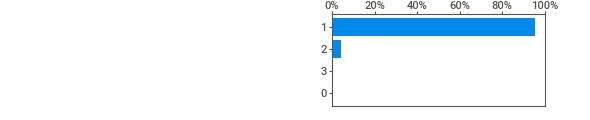
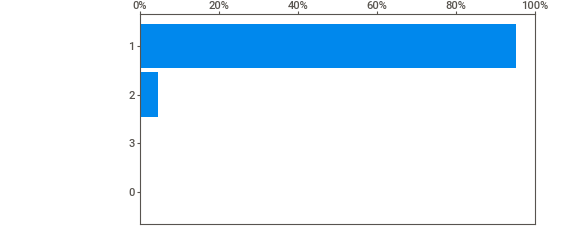
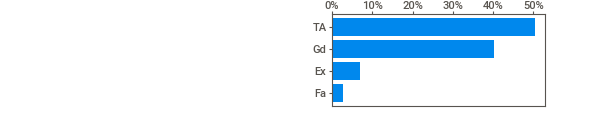
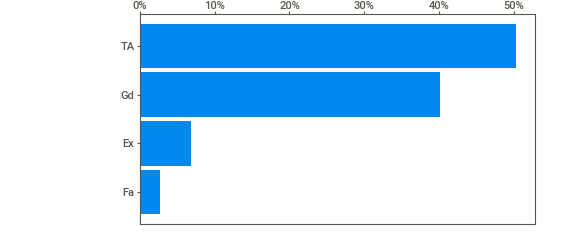
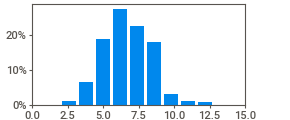
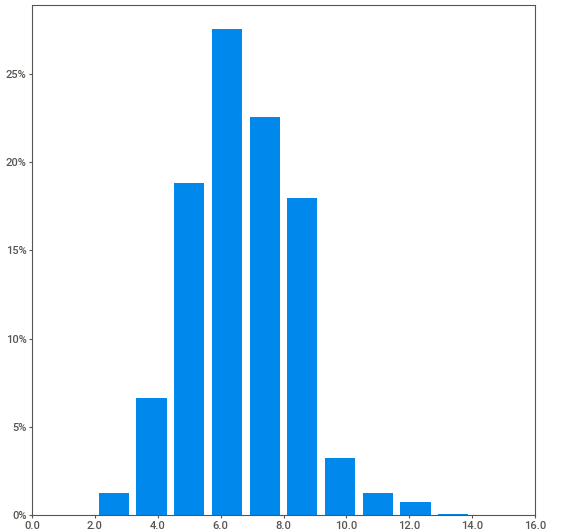
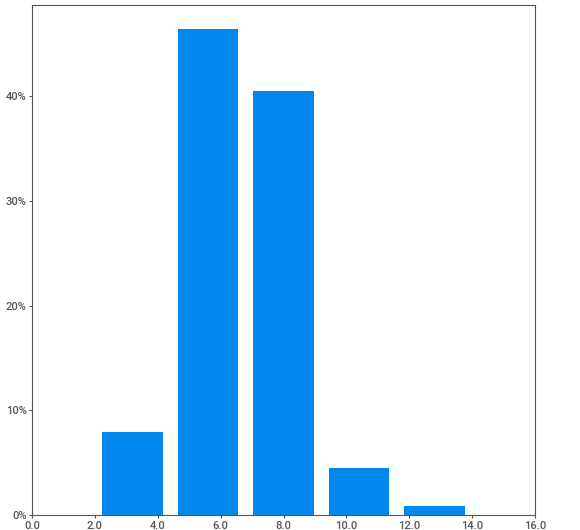
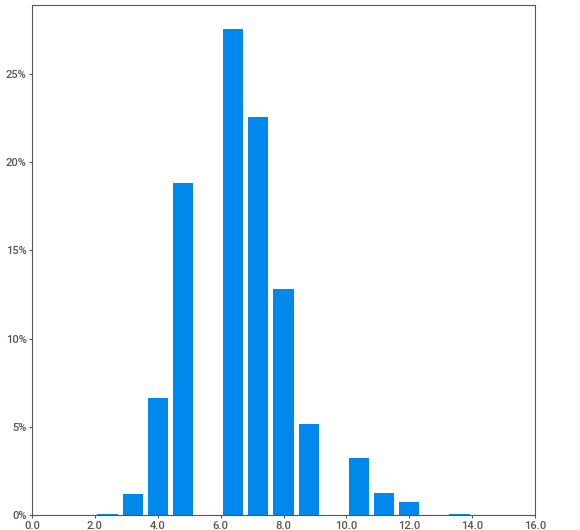
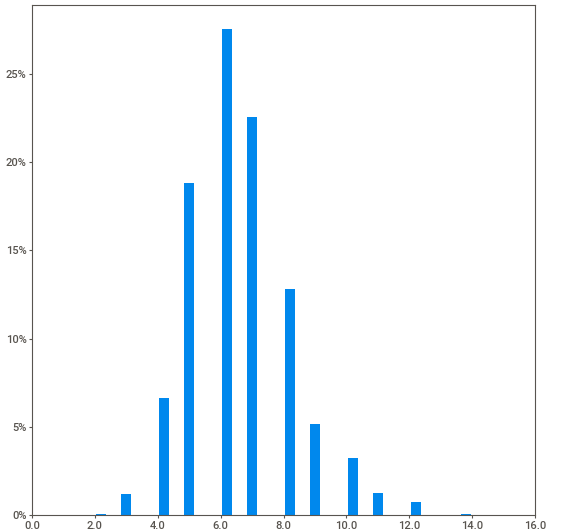
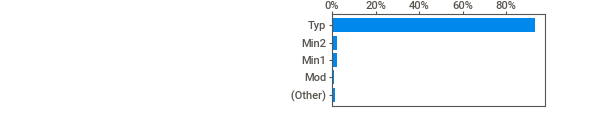
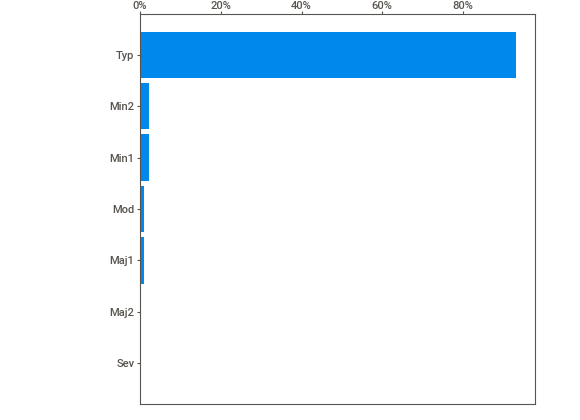
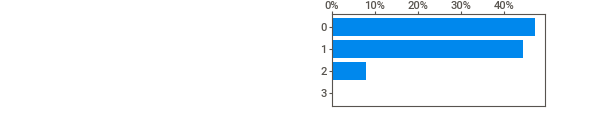
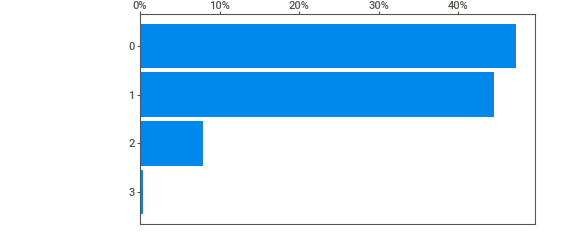
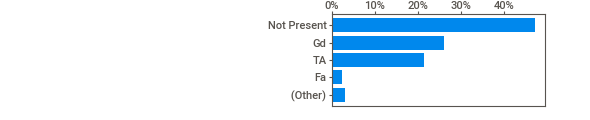
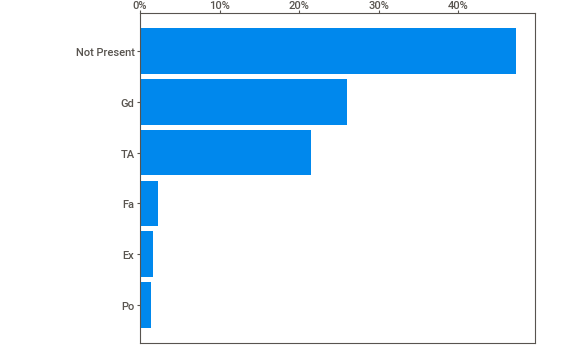
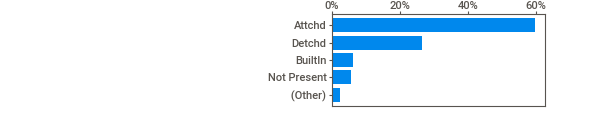
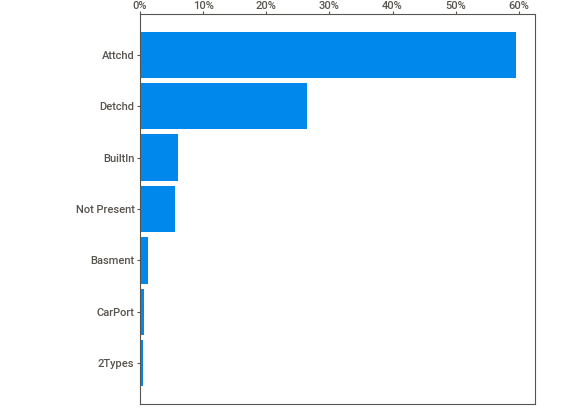
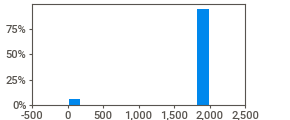
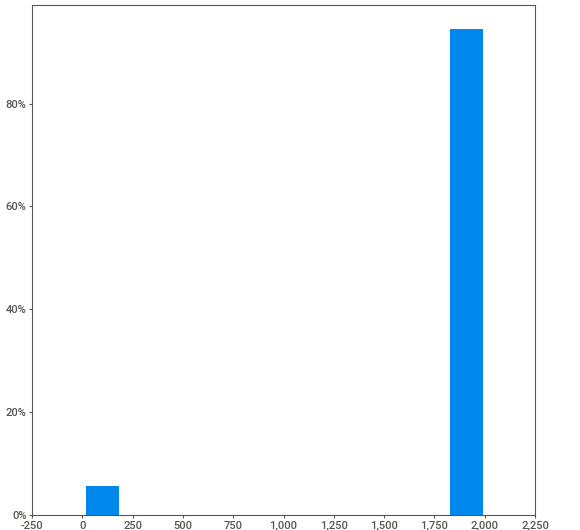
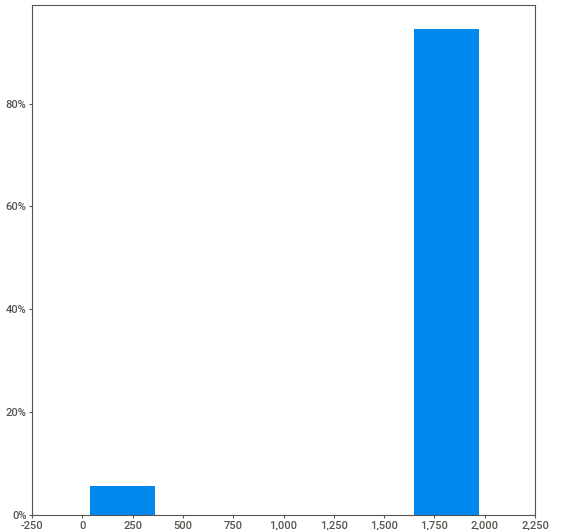
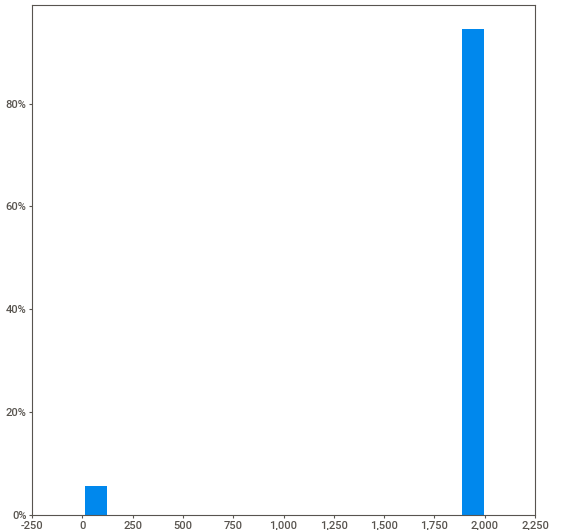
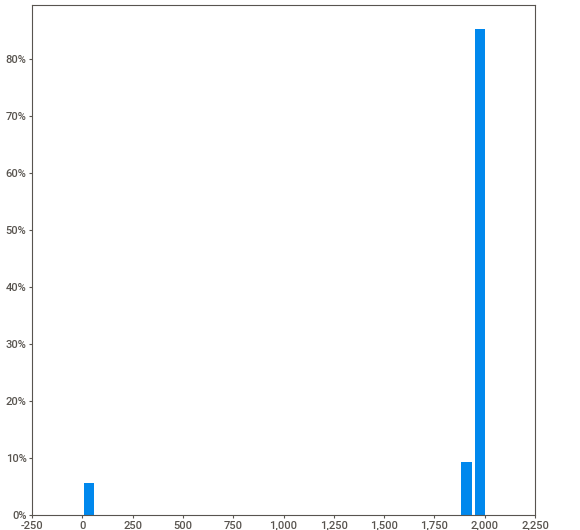
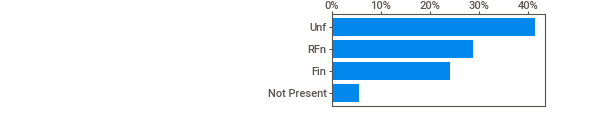
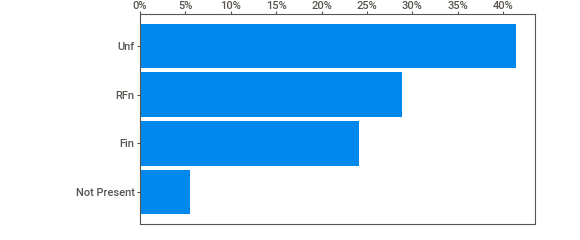
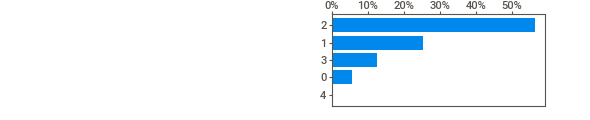
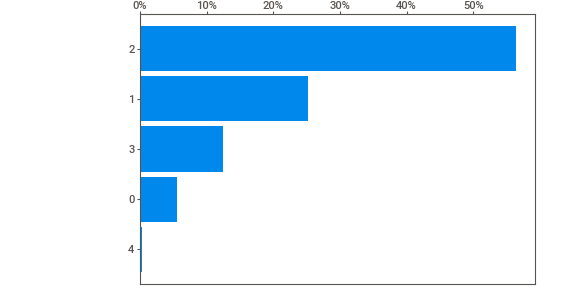
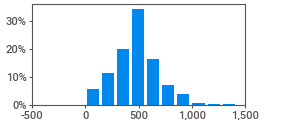
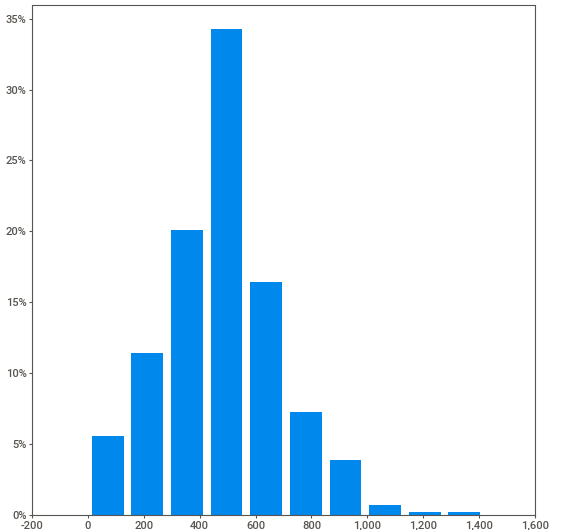
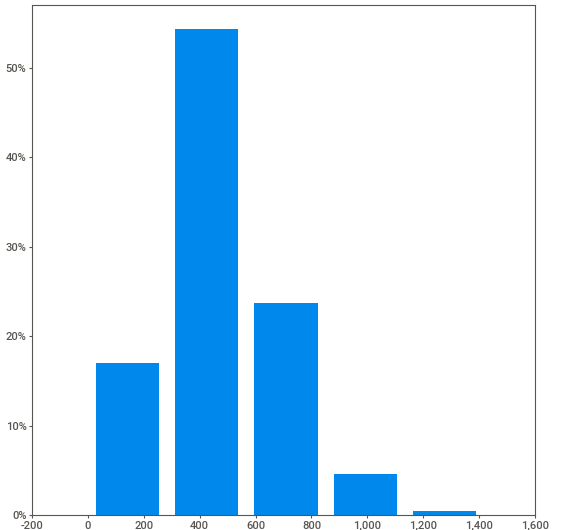
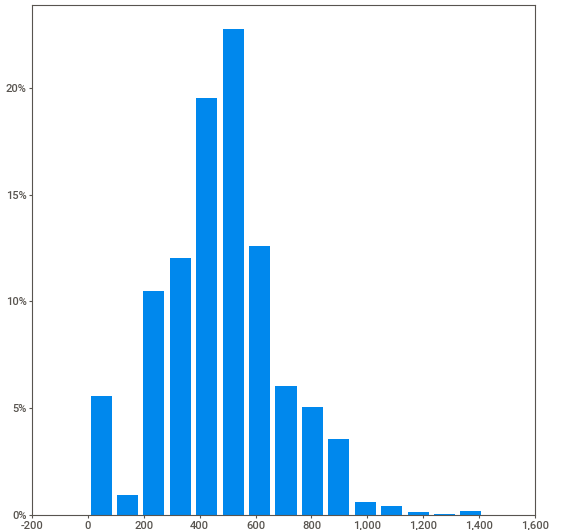
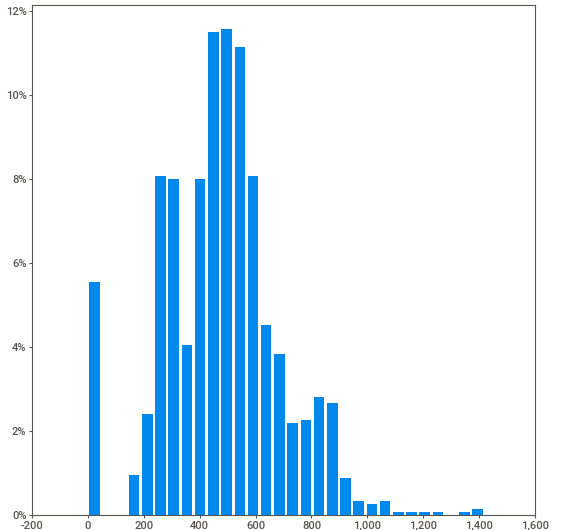
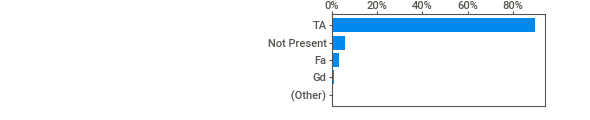
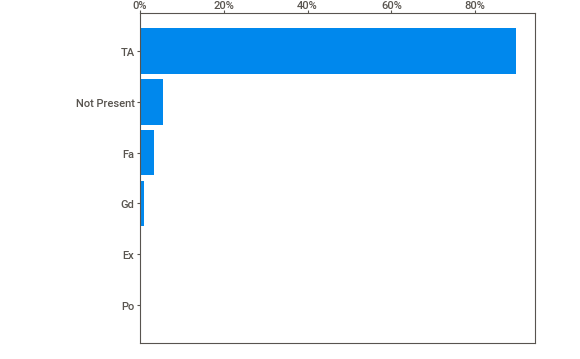
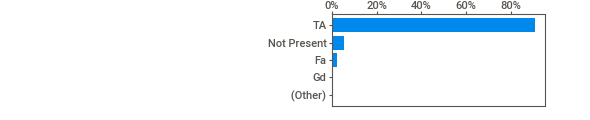
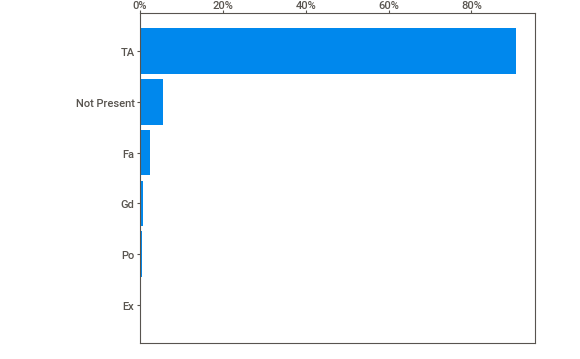
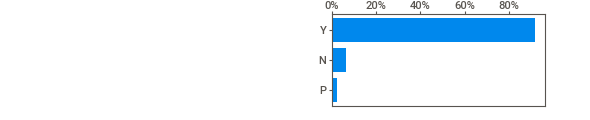
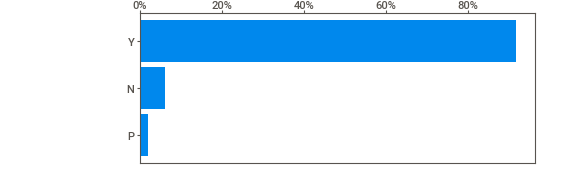
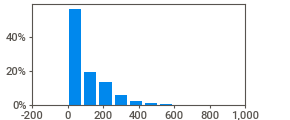
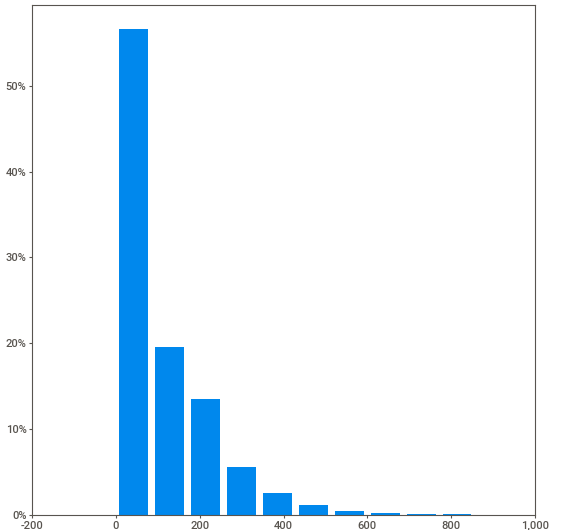
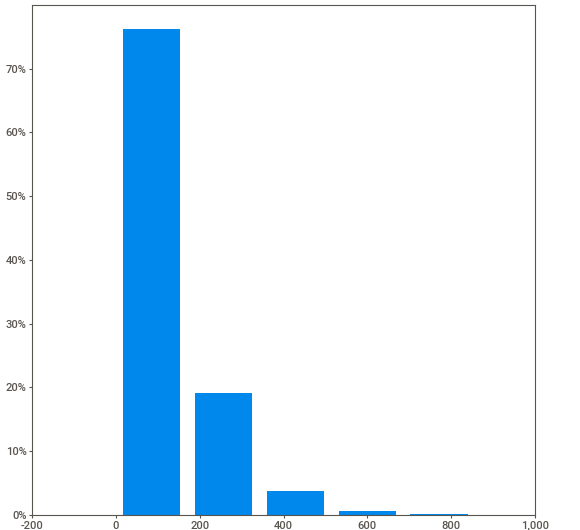
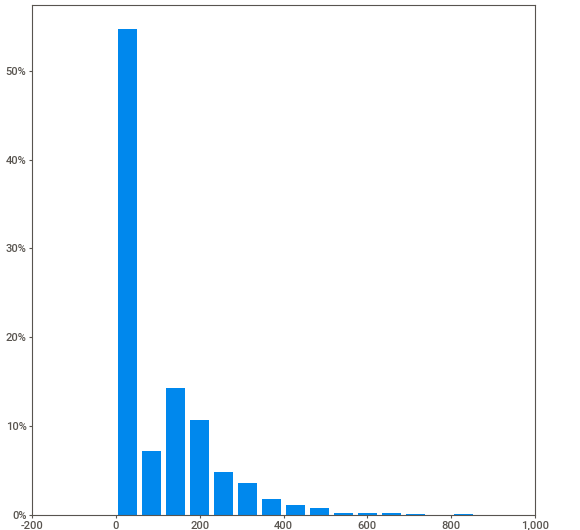
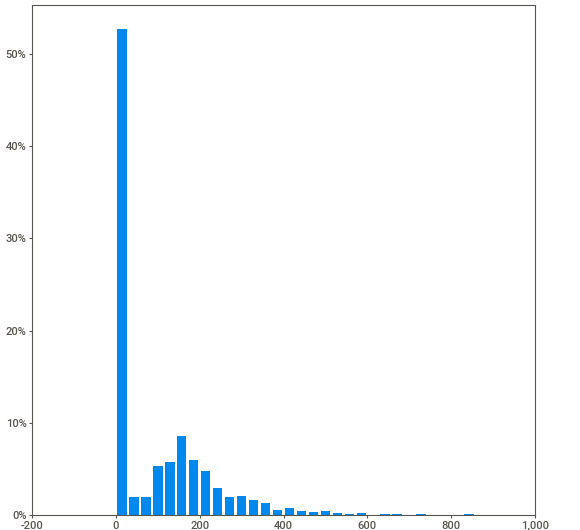
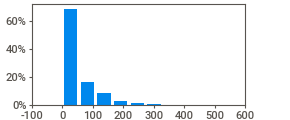
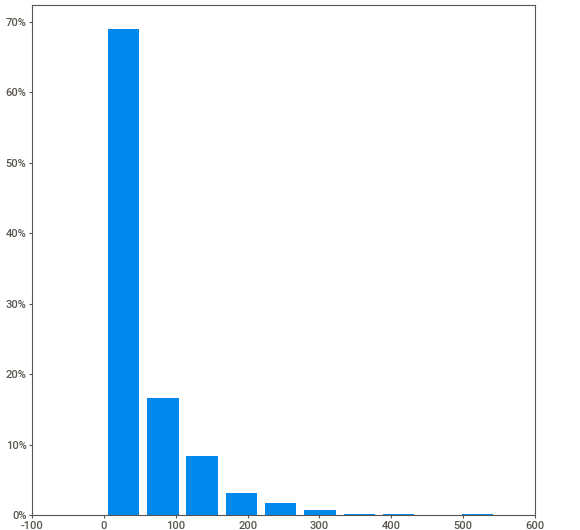
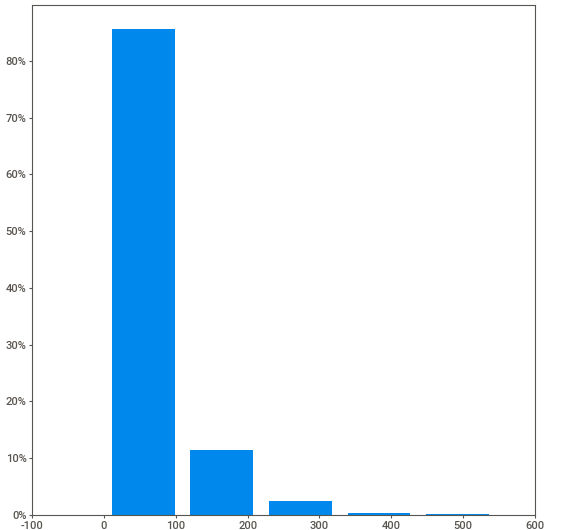
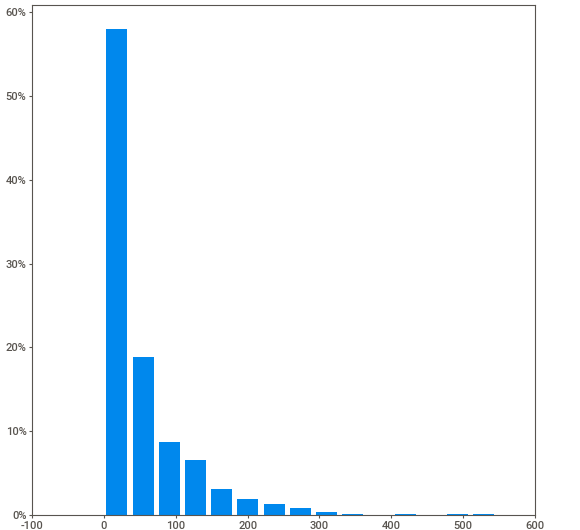
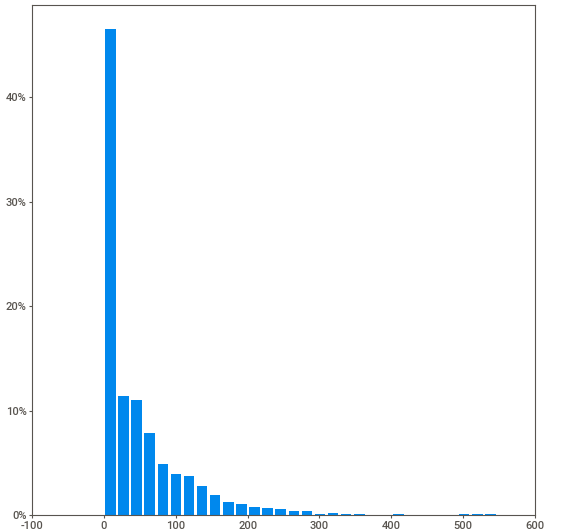
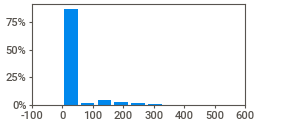
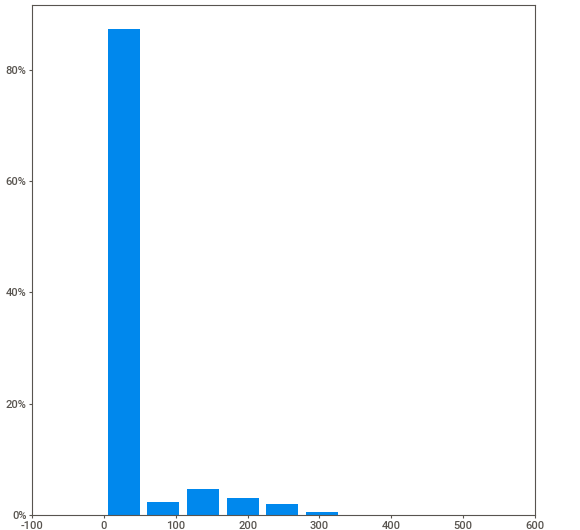
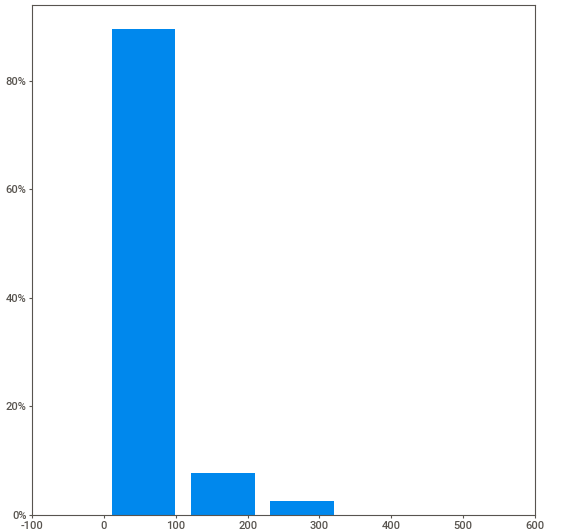
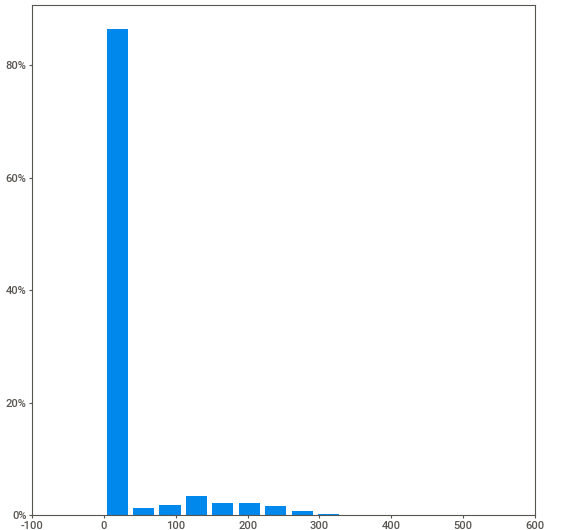
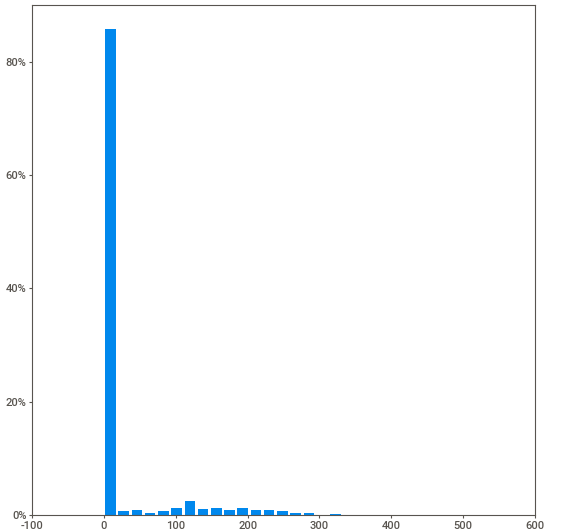
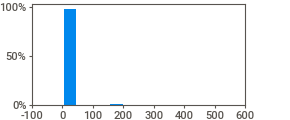
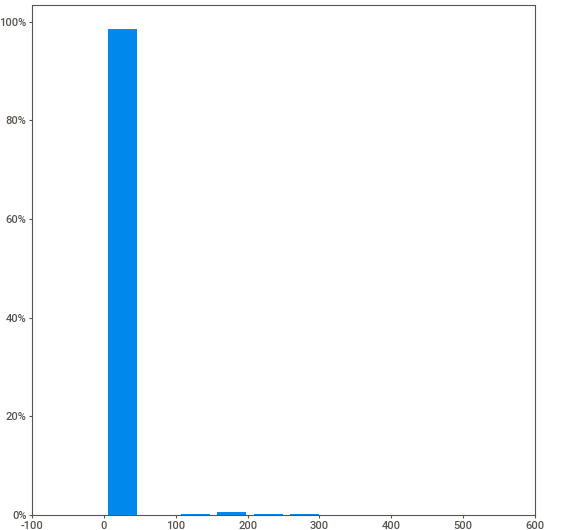
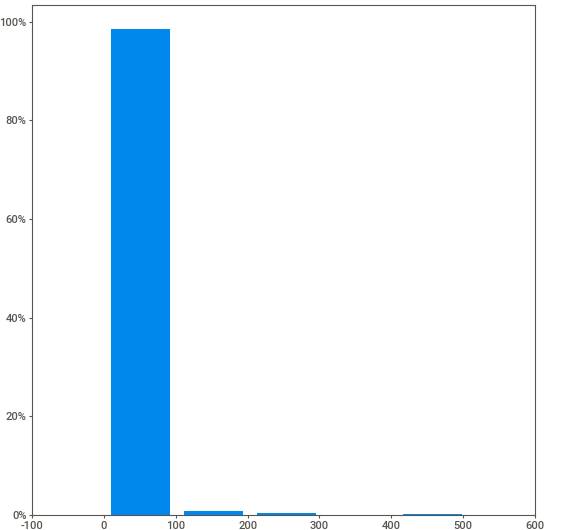
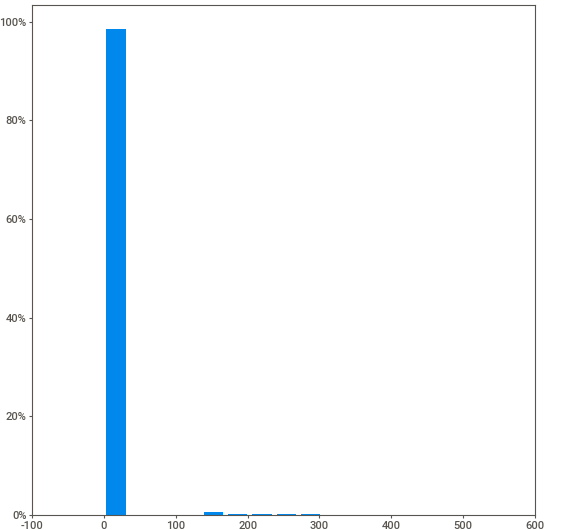
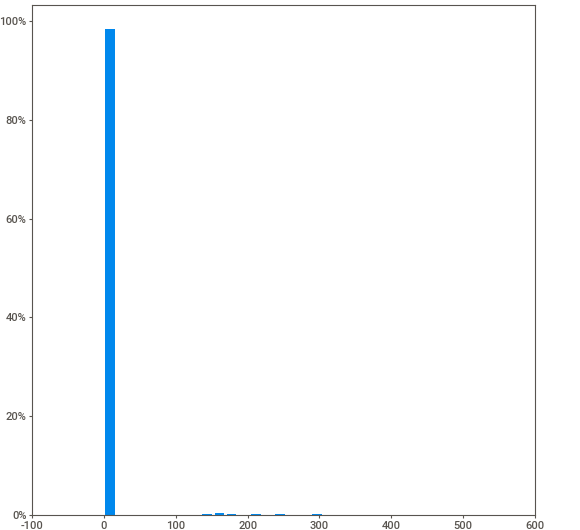
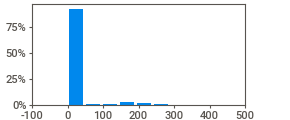
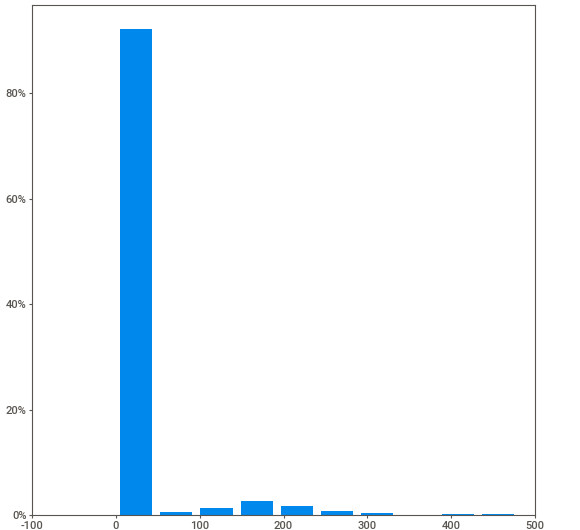
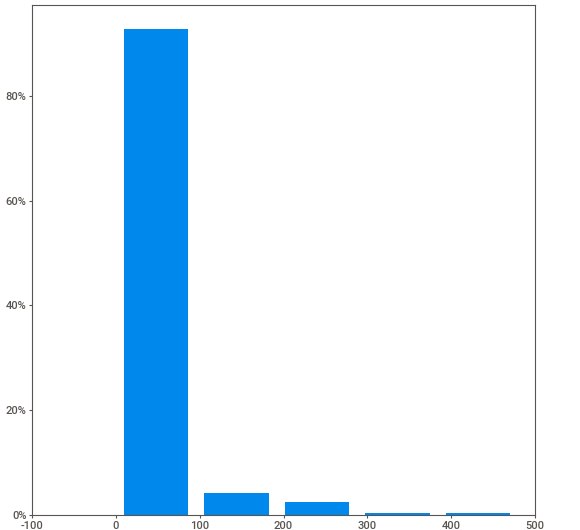
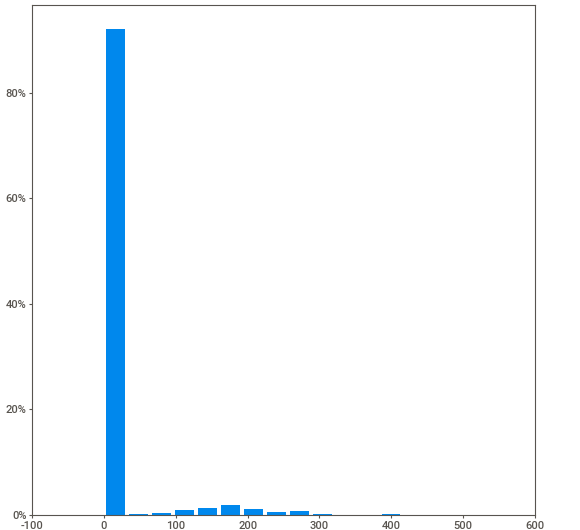
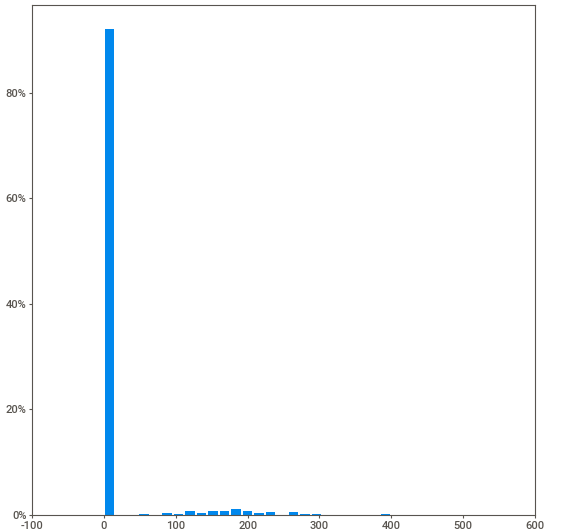
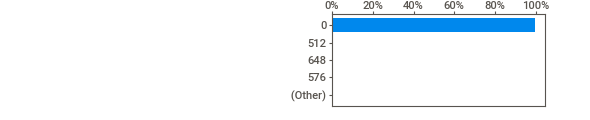
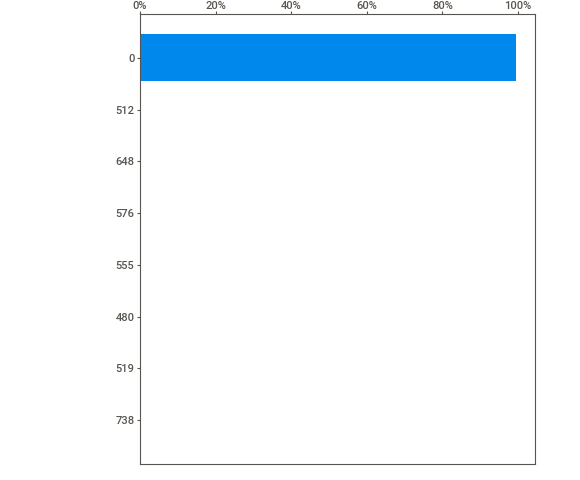
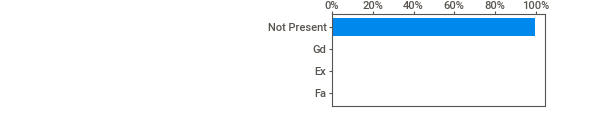
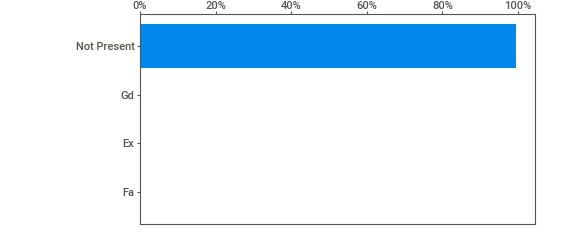
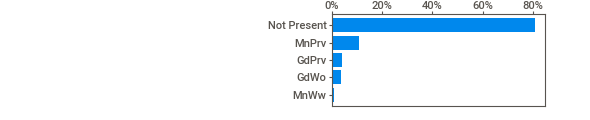
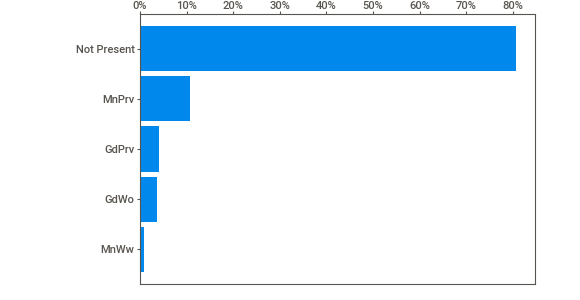
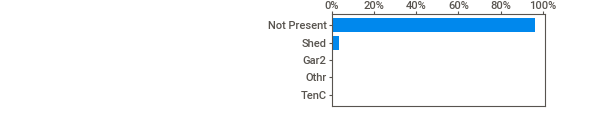
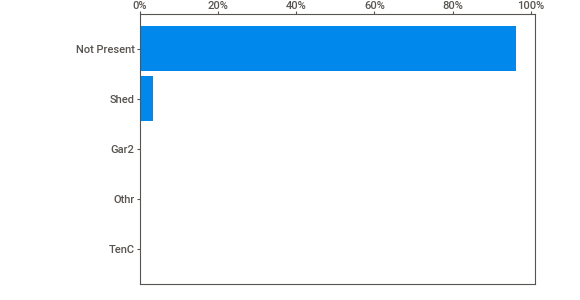
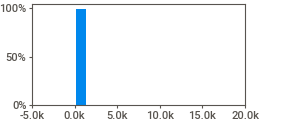
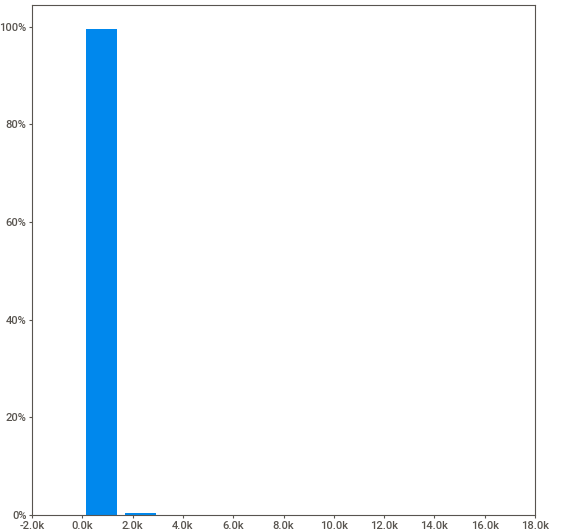
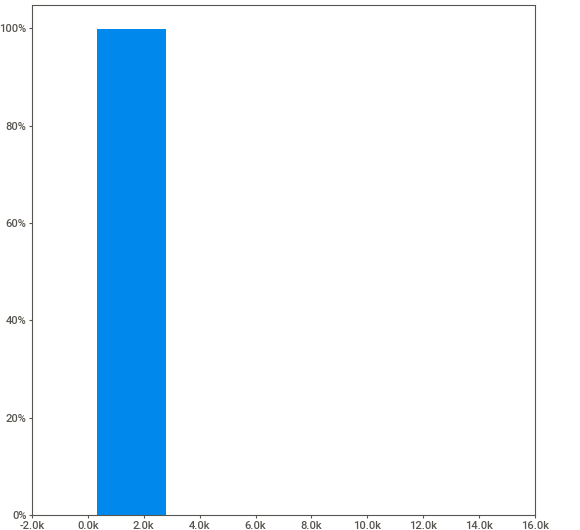
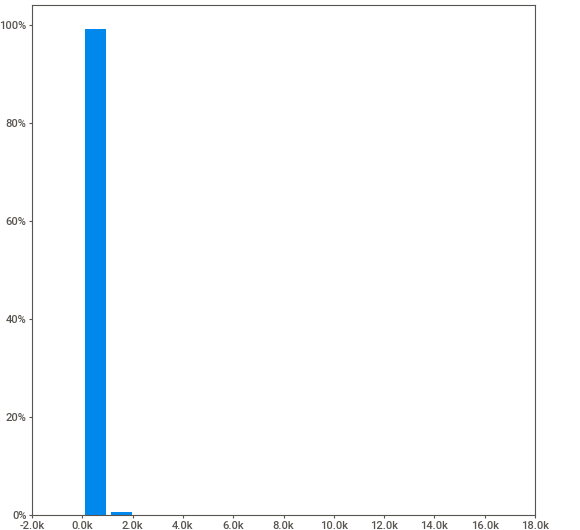
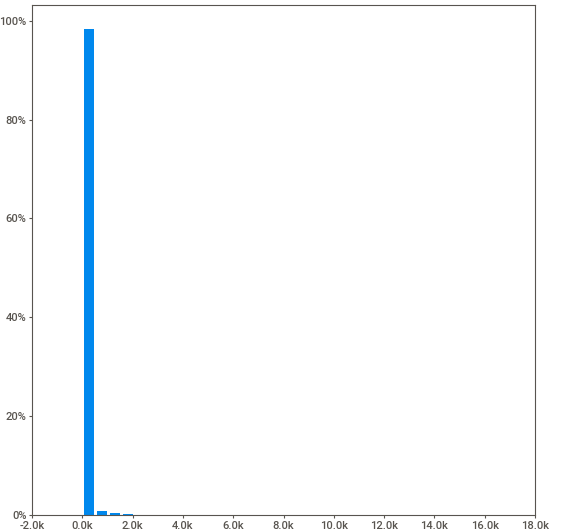
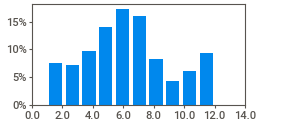
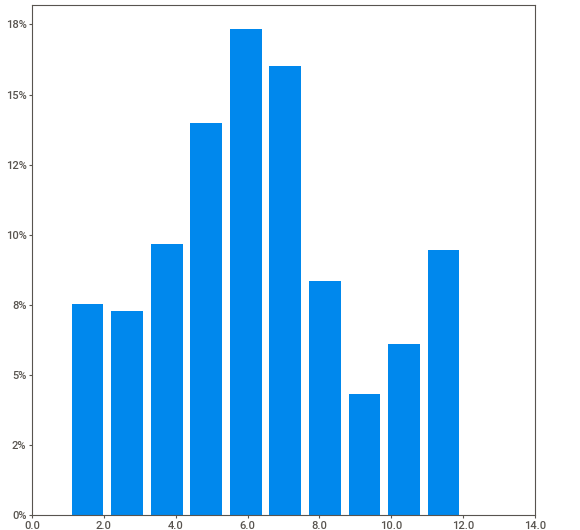
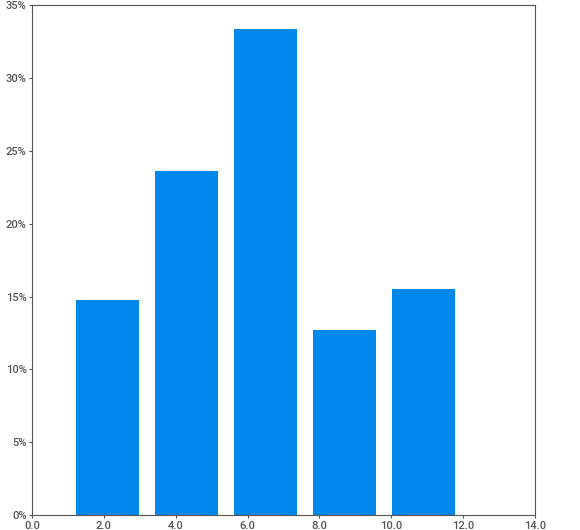
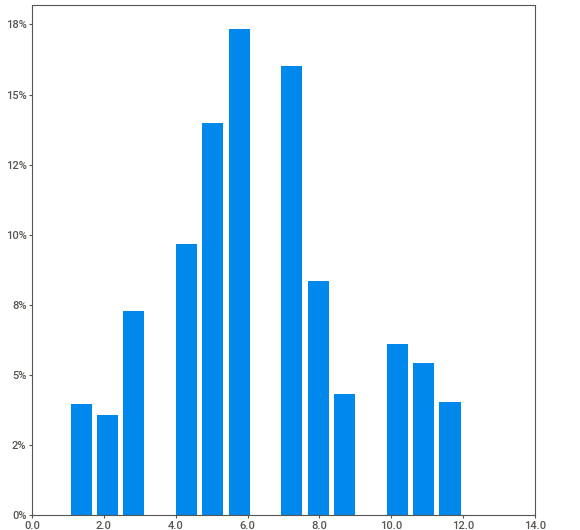
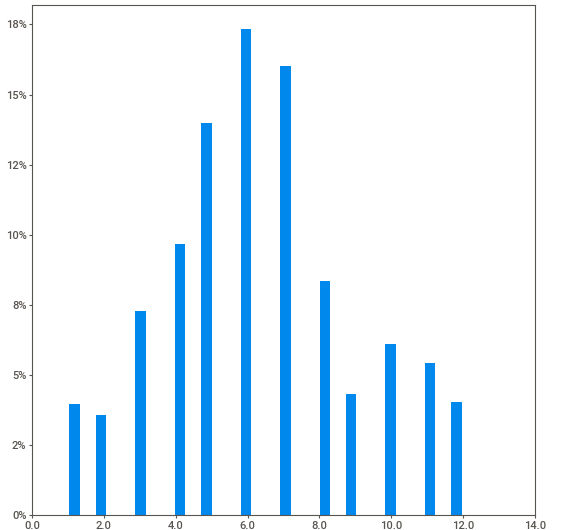
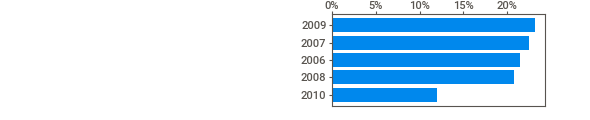
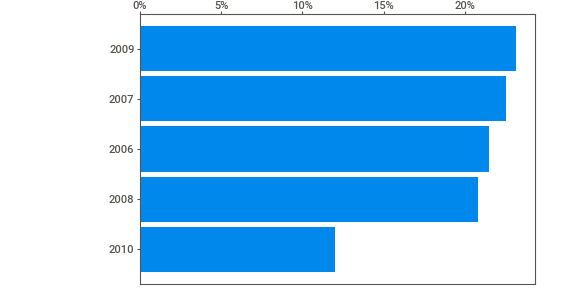
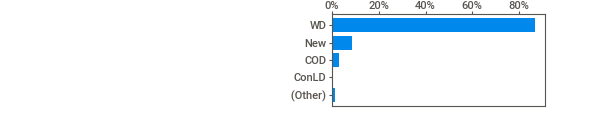
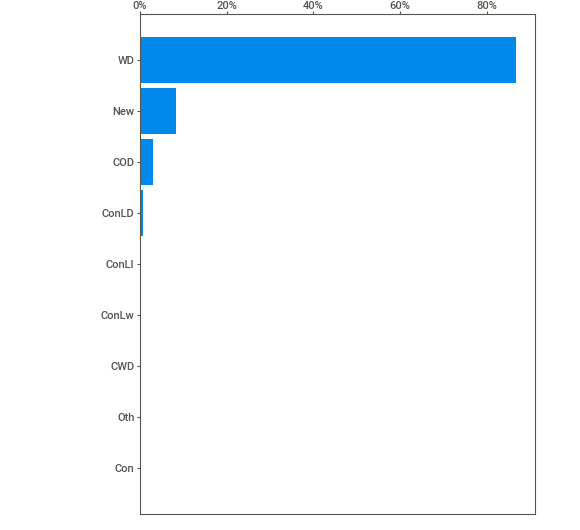
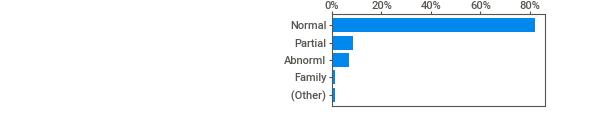
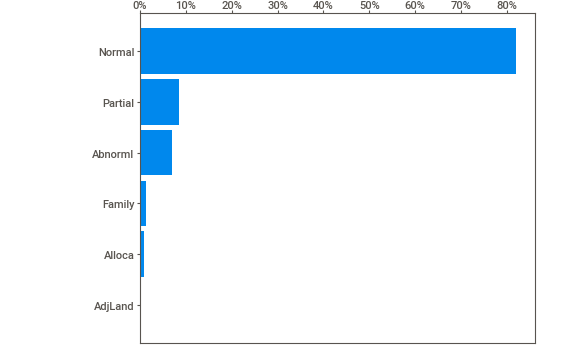
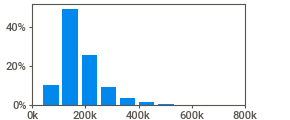
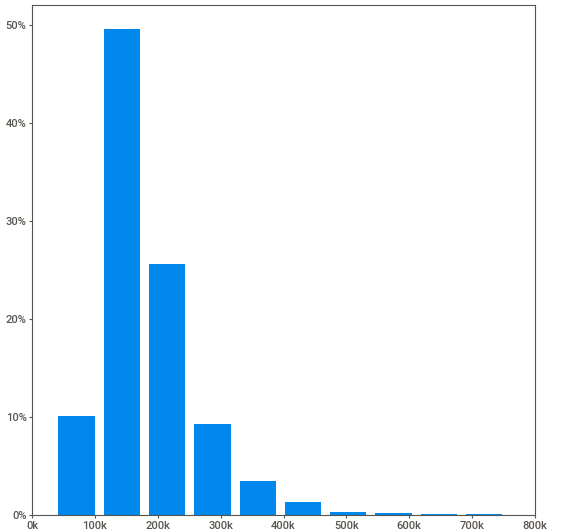
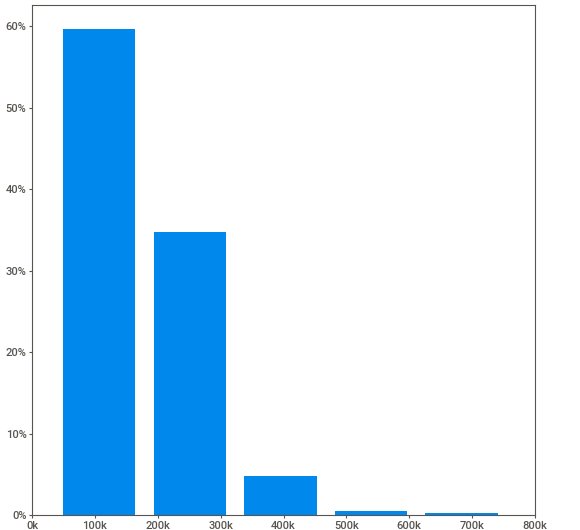
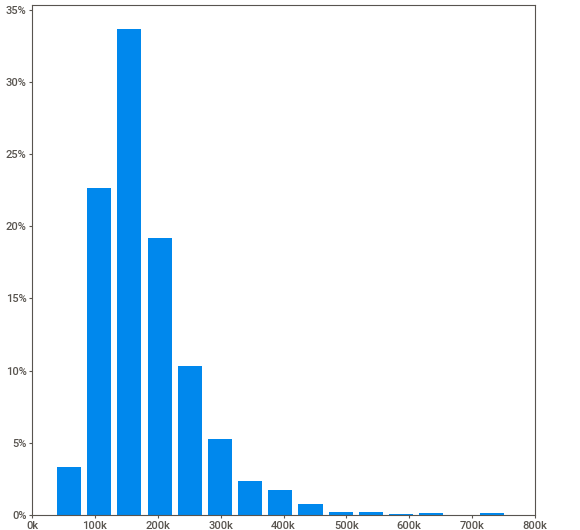
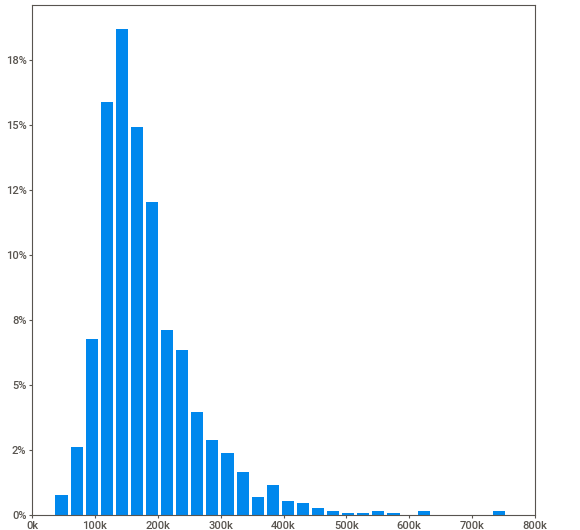
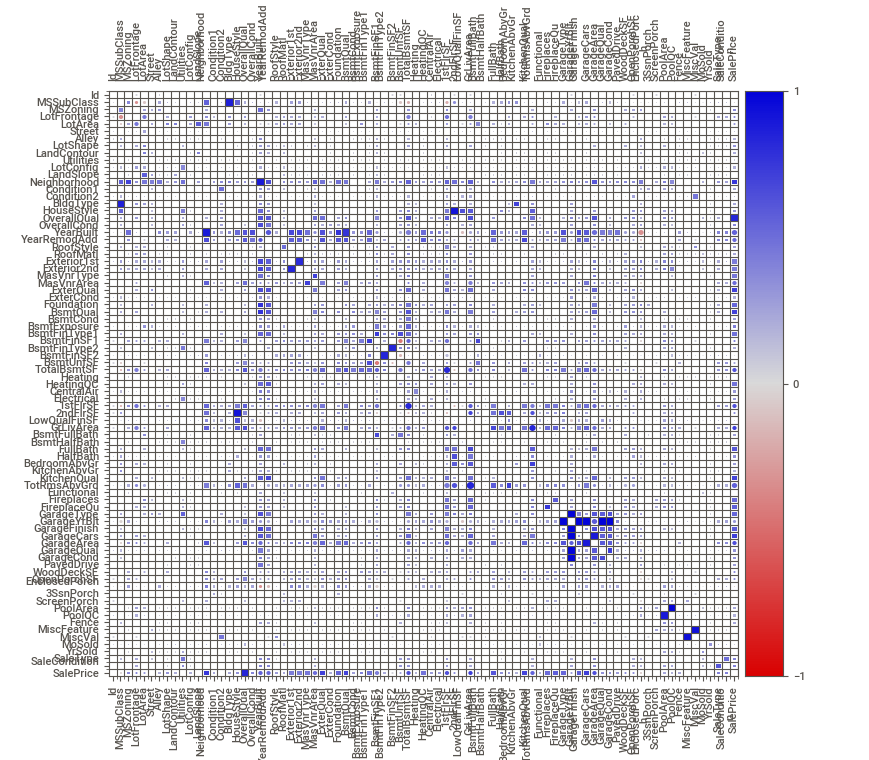
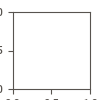

In [287]:
# Running SweetViz AutoEDA
sv_report= sv.analyze(data)
sv_report.show_notebook(r"/content/")

### Observations from AutoEDA


#### Numerical Associations with SalePrice:

*  GrLivArea: 0.71
*  GarageArea: 0.62
*  TotalBsmtSF: 0.61
*  1stFlrSF: 0.61
*  TotRmsAbvGrd: 0.53
*  YearBuilt: 0.52
*  YearRemodAdd: 0.51
*  MasVnrArea: 0.48
*  BsmtFinSF1: 0.39
*  LotFrontage: 0.35
*  WoodDeckSF: 0.32
*  2ndFlrSF: 0.32
*  OpenPorchSF: 0.32
*  LotArea: 0.26



#### Categorical Associations with SalePrice:

*  OverallQual: 0.83
*  Neighborhood: 0.74
*  GarageCars: 0.70
*  ExterQual: 0.69
*  BsmtQual: 0.68
*  KitchenQual: 0.68
*  FullBath: 0.58
*  GarageFinish: 0.55
*  FireplaceQu: 0.54
*  Foundation: 0.51
*  GarageType: 0.50
*  Fireplaces: 0.48
*  BsmtFinType1: 0.46
*  HeatingQC: 0.44




## Visualizing numeric Values

<Axes: xlabel='SalePrice', ylabel='Density'>

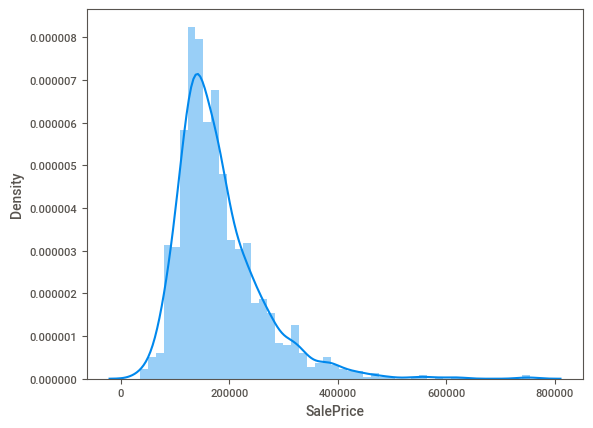

In [288]:
# Checking distribution of SalePrice
sns.distplot(data['SalePrice'])

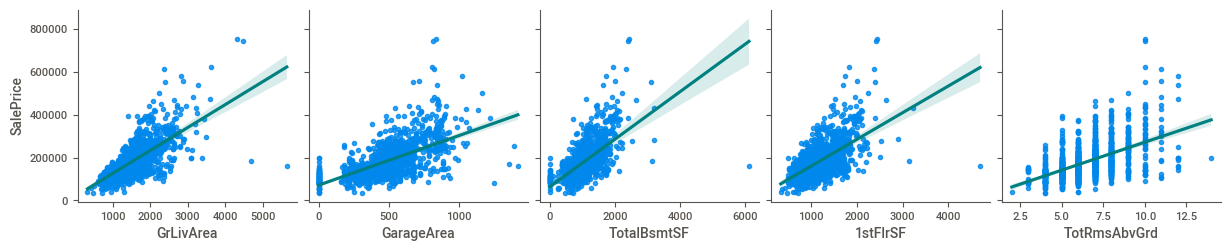

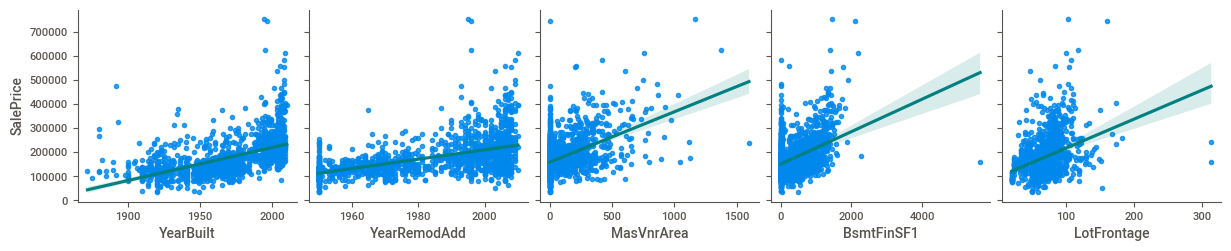

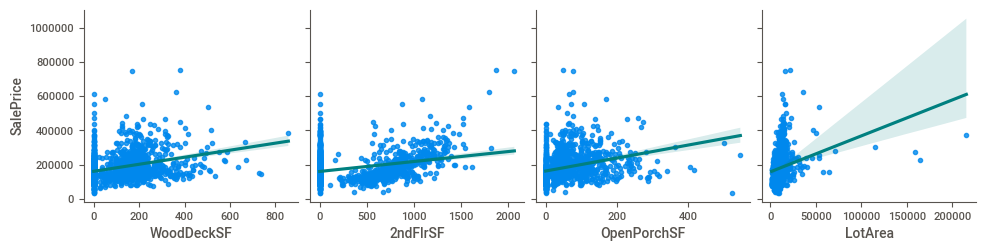

In [289]:
# Plotting numeric variables against SalePrice

numeric_cols= ['GrLivArea','GarageArea','TotalBsmtSF','1stFlrSF','TotRmsAbvGrd','YearBuilt','YearRemodAdd','MasVnrArea',
'BsmtFinSF1','LotFrontage','WoodDeckSF','2ndFlrSF','OpenPorchSF','LotArea']

sns.pairplot(data, x_vars=['GrLivArea','GarageArea','TotalBsmtSF','1stFlrSF','TotRmsAbvGrd'], y_vars='SalePrice', kind= 'reg', plot_kws={'line_kws':{'color':'teal'}})
sns.pairplot(data, x_vars=['YearBuilt','YearRemodAdd','MasVnrArea','BsmtFinSF1','LotFrontage'], y_vars='SalePrice', kind= 'reg', plot_kws={'line_kws':{'color':'teal'}})
sns.pairplot(data, x_vars=['WoodDeckSF','2ndFlrSF','OpenPorchSF','LotArea'], y_vars='SalePrice', kind= 'reg', plot_kws={'line_kws':{'color':'teal'}})

### Visualizing categorical variables:

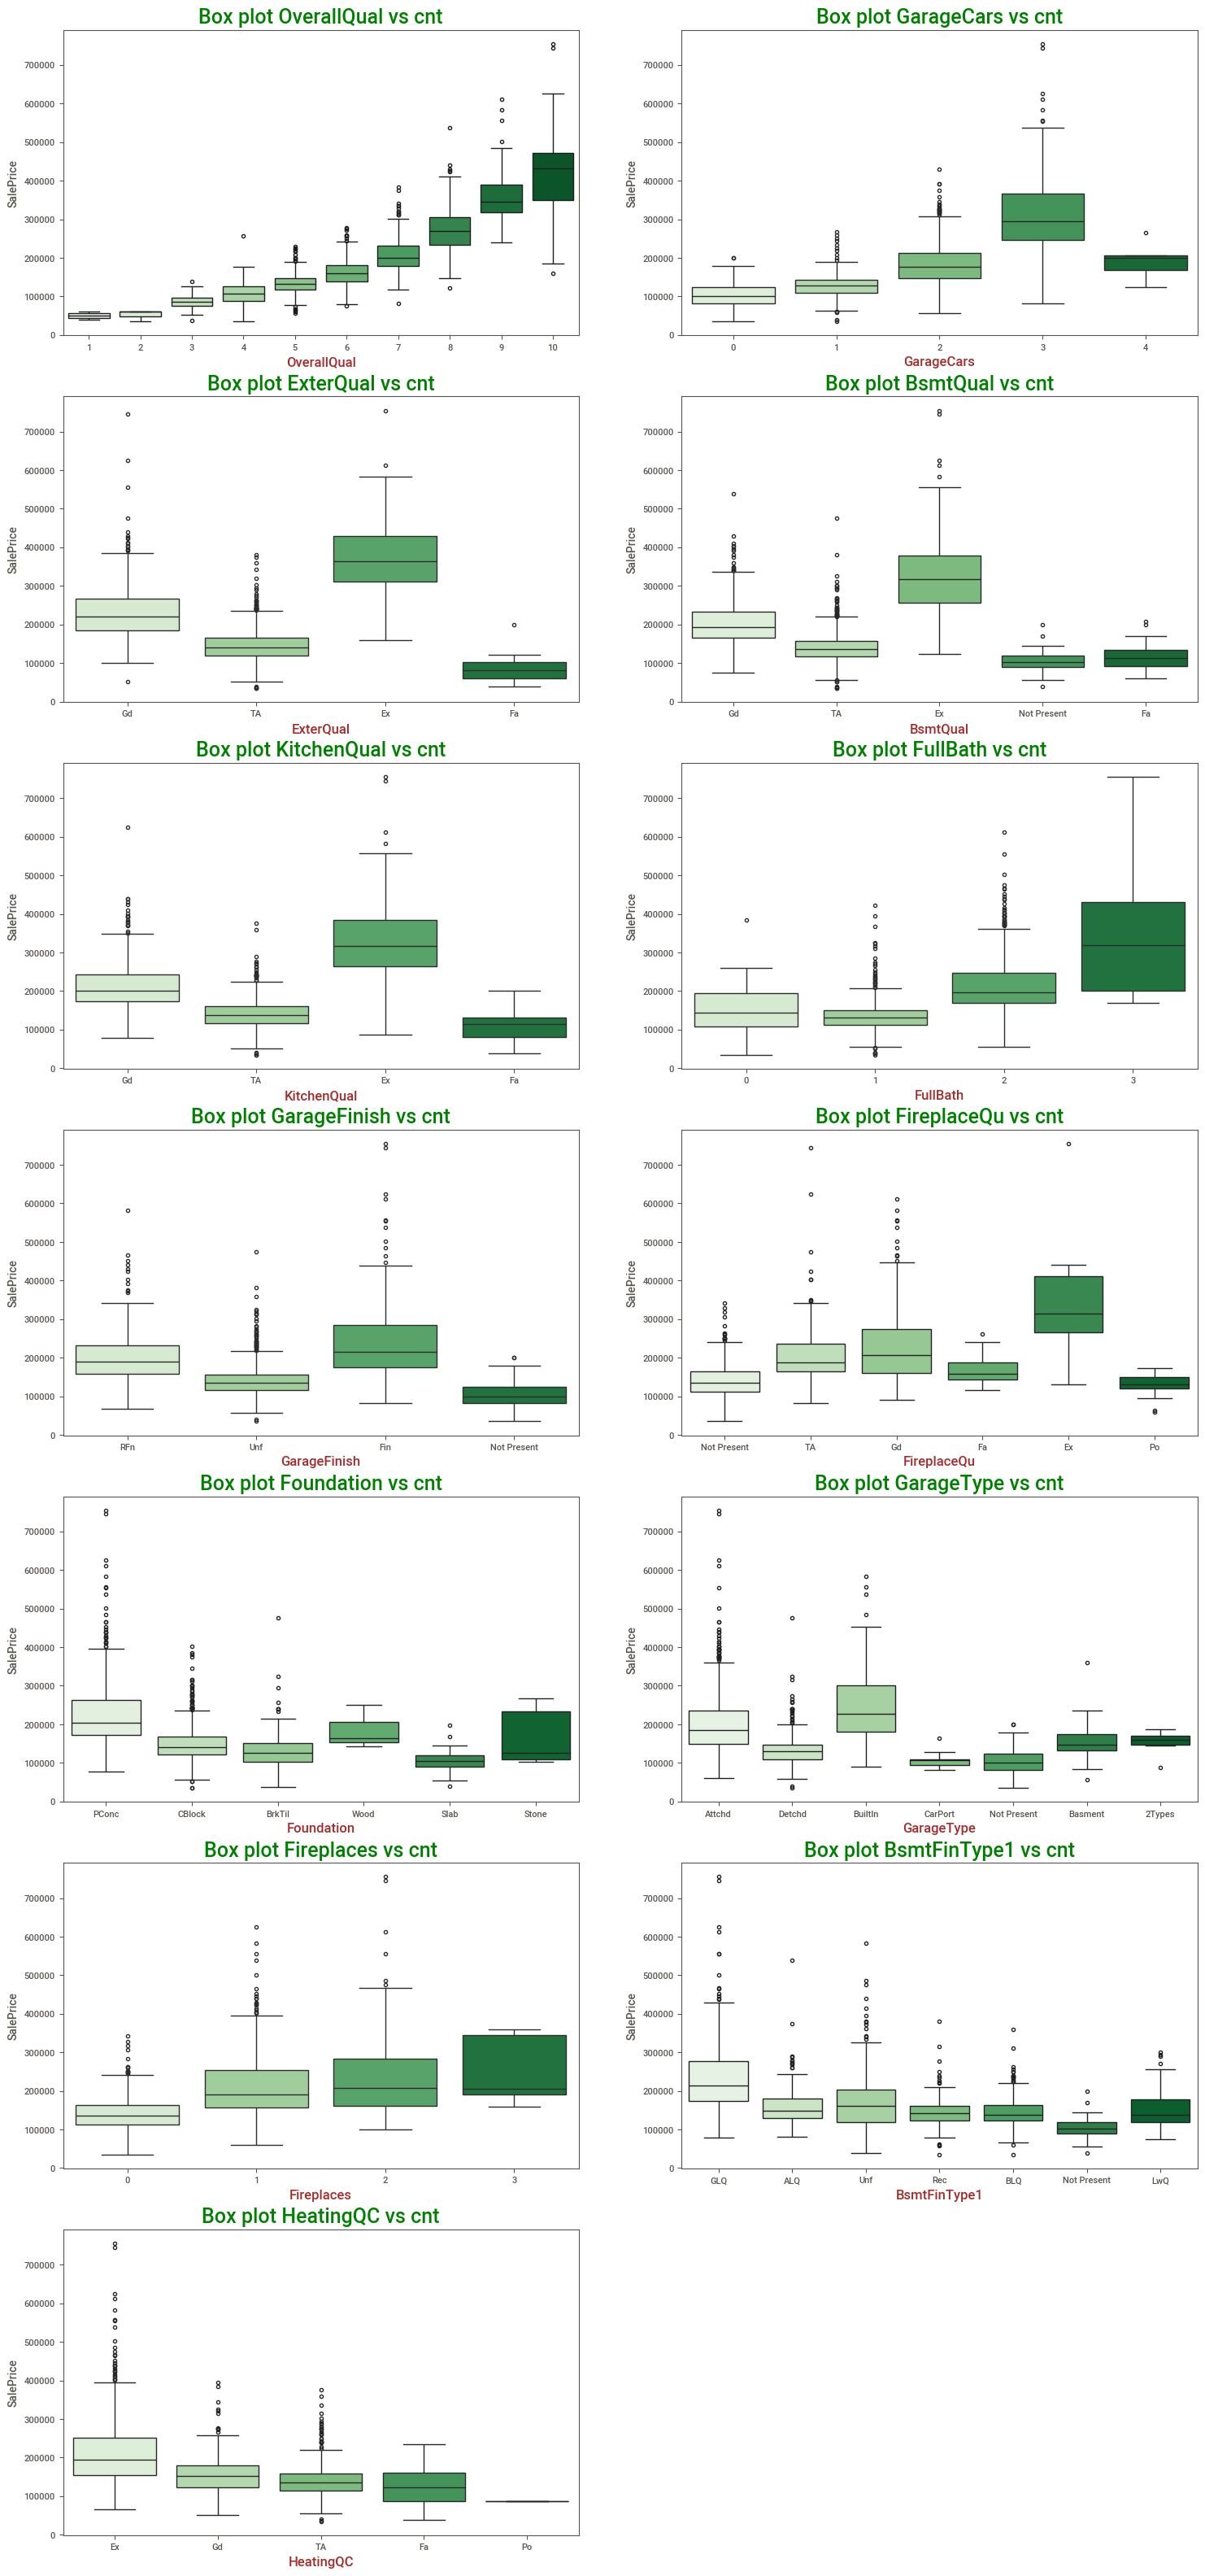

In [290]:
# Box plot of catego

cat_cols= ['OverallQual','GarageCars','ExterQual','BsmtQual','KitchenQual','FullBath','GarageFinish','FireplaceQu','Foundation','GarageType','Fireplaces','BsmtFinType1','HeatingQC']

plt.figure(figsize=[18, 40])

for i, col in enumerate(cat_cols, 1):
    plt.subplot(7,2,i)
    title_text= f'Box plot {col} vs cnt'
    x_label= f'{col}'
    fig= sns.boxplot(data= data, x= col, y= 'SalePrice', palette= 'Greens')
    fig.set_title(title_text, fontdict= { 'fontsize': 18, 'color': 'Green'})
    fig.set_xlabel(x_label, fontdict= {'fontsize': 12, 'color': 'Brown'})
plt.show()

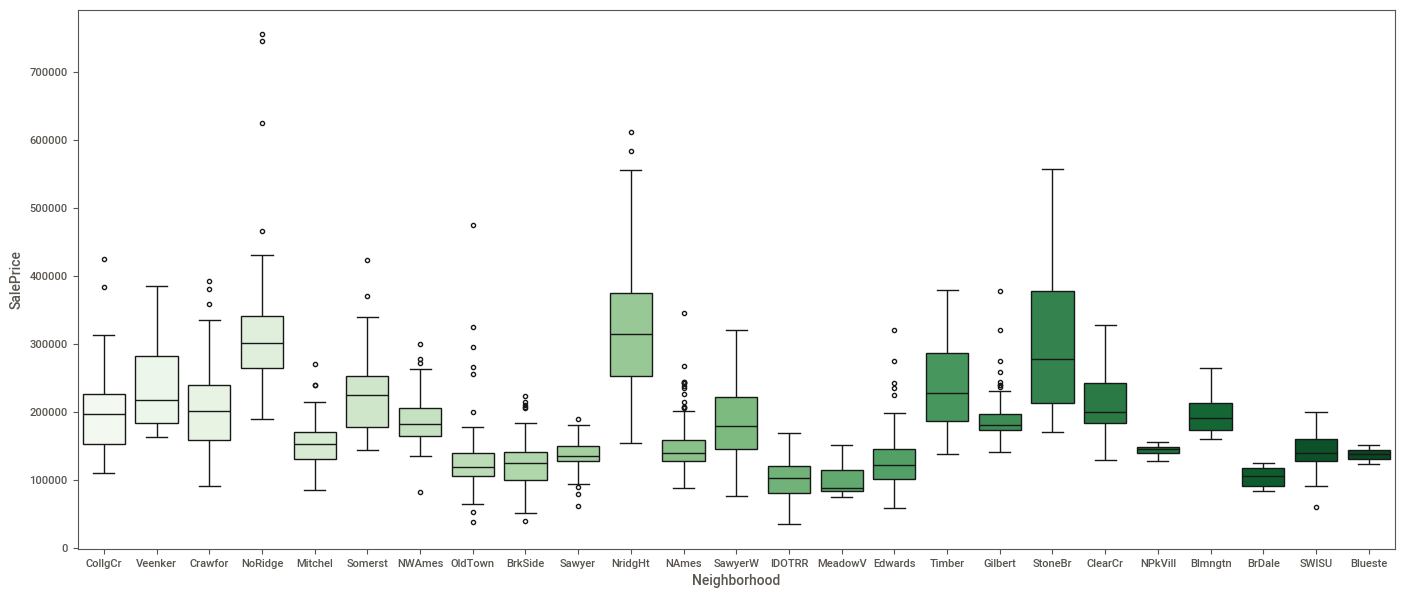

In [291]:
plt.figure(figsize=[17,7])
sns.boxplot(data= data, x= 'Neighborhood', y= 'SalePrice', palette= 'Greens')
plt.show()

## Infrences



- SalePrice is right-skewed, and other numeric features: 'GrLivArea', 'GarageArea', 'TotalBsmtSF', '1stFlrSF', 'TotRmsAbvGrd', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'LotFrontage', 'WoodDeckSF', '2ndFlrSF', 'OpenPorchSF', 'LotArea', have outliers, and they all have somewhat linear relationships with SalePrice.

- Median SalePrice is higher for houses with higher OverallQual ratings. Houses with excellent qualities of material used on the exterior have the highest price. Price reduces as quality decreases.
- SalePrice is high for houses having Neighbourhood : Northridge Heights, Stone Brook, Northridge. Price is comparatively lower in Iowa DOT and Rail Road, Meadow Village neighbourhood.
- Median SalePrice is higher for houses having Excellent Heating quality and median price reduces with Heating quality type and least for houses having Poor heating quality.
- Median SalePrice is very high for Good Living Quarters type basement finished area and if the beasement height is more than 100+ inches and least for houses not having a basement.
- Houses having at least 1 fireplace have higher median SalePrice. If Fireplace quality is 'Excellent - Exceptional Masonry Fireplace' then the median SalePrice is the highest.
- Houses having a garage as part of the house that typically has a room above the garage and garage interior 'finish' or 'Rough Finished', have the highest median SalePrice. Price is lower for houses having no garage.
- Houses with a garage in car capacity of 3 have the highest median SalePrice.
- Houses having Poured Contrete foundation have higher SalePrice. Price for houses having Stone and Wood foundations is positive-skewed.
- SalePrice is high for houses with 3 Full bathrooms above grade.

## Correlation Heatmap

In [292]:
data_org= data.copy()

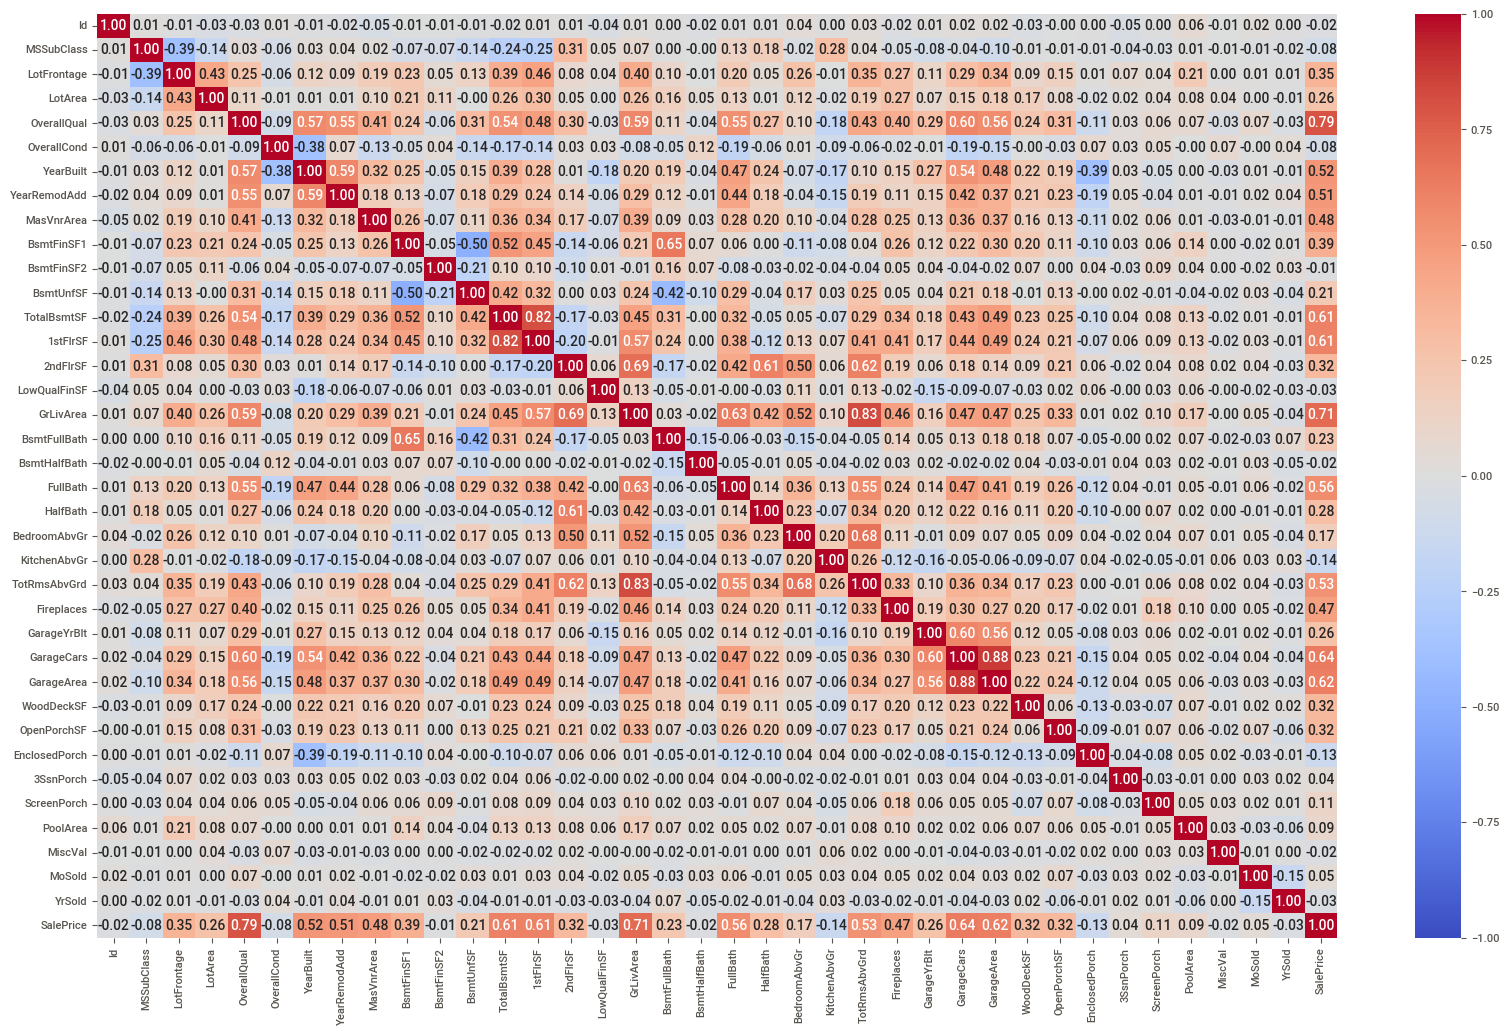

In [293]:
# Creating correlation heatmap
numeric_data = data.select_dtypes(include=["int", "float"])
plt.figure(figsize = (20, 12))
sns.heatmap(numeric_data.corr(), annot= True, cmap= 'coolwarm', fmt= '.2f', vmin= -1, vmax= 1)
plt.show()

# Data Preparation

Since we already know that out target Variabe is highly skewed towards right. We can transform our feature using log transformation to remove that skewness.

### Transforming "SalePrice"variable

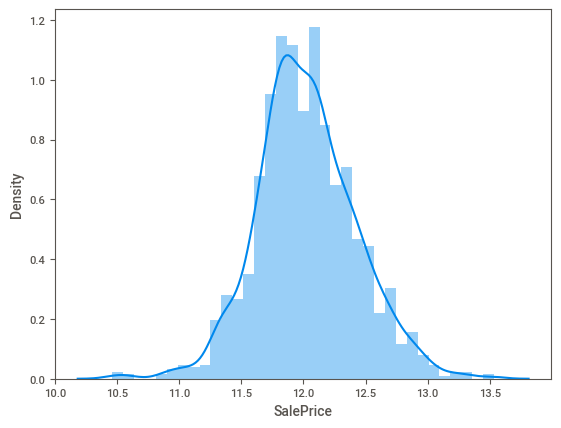

In [294]:
sns.distplot(np.log(data['SalePrice']))
plt.show()

It can be seen that after log transformation SalePrice has now near normal distribution.

In [295]:
data['SalePrice_log_trans']= np.log(data['SalePrice'])

### Dropping unnecessary columns

In [296]:
data.drop(['SalePrice','Id'], axis=1, inplace= True)
data.shape

(1460, 80)

## Performing Train Test Split

In [297]:
# Train-Test Split
y= data['SalePrice_log_trans']
X= data.drop('SalePrice_log_trans', axis= 1)

X_train, X_test, y_train, y_test= train_test_split(X, y, train_size= .7, random_state= 42)

In [298]:
# Getting index values of train test dataset
train_index= X_train.index
test_index= X_test.index

### Statistical imputation of missing values

Imputing rest of the features in test and train dataset using median (for continuous variables) and mode (for categorical variables) calculated on train dataset.

In [299]:
# Performing Statistical Imputation for missing values in LotFrontage, MasVnrArea, MasVnrType, Electrical columns

data['LotFrontage'].fillna(X_train['LotFrontage'].median(), inplace= True)
data['LotFrontage'].fillna(X_train['LotFrontage'].median(), inplace= True)

data['MasVnrArea'].fillna(X_train['MasVnrArea'].median(), inplace= True)
data['MasVnrArea'].fillna(X_train['MasVnrArea'].median(), inplace= True)

data['MasVnrType'].fillna(X_train['MasVnrType'].mode(), inplace= True)
data['MasVnrType'].fillna(X_train['MasVnrType'].mode(), inplace= True)

data['Electrical'].fillna(X_train['Electrical'].mode(), inplace= True)
data['Electrical'].fillna(X_train['Electrical'].mode(), inplace= True)

In [300]:
### Encoding categorical (nominal) features

In [301]:
# Getting object and numeric type columns
housing_cat= data.select_dtypes(include= 'object')
housing_num= data.select_dtypes(exclude= 'object')
housing_cat.describe()

MSZoning Street        Alley LotShape LandContour Utilities LotConfig  \
count      1460   1460         1460     1460        1460      1460      1460   
unique        5      2            3        4           4         2         5   
top          RL   Pave  Not Present      Reg         Lvl    AllPub    Inside   
freq       1151   1454         1369      925        1311      1459      1052   

       LandSlope Neighborhood Condition1 Condition2 BldgType HouseStyle  \
count       1460         1460       1460       1460     1460       1460   
unique         3           25          9          8        5          8   
top          Gtl        NAmes       Norm       Norm     1Fam     1Story   
freq        1382          225       1260       1445     1220        726   

       RoofStyle RoofMatl Exterior1st Exterior2nd   MasVnrType ExterQual  \
count       1460     1460        1460        1460         1460      1460   
unique         6        8          15          16            4         4   
top        Gable  CompShg     VinylSd     VinylSd  Not Present        TA   
freq        1141     1434         515         504          872       906   

       ExterCond Foundation BsmtQual BsmtCond BsmtExposure BsmtFinType1  \
count       1460       1460     1460     1460         1460         1460   
unique         5          6        5        5            5            7   
top           TA      PConc       TA       TA           No          Unf   
freq        1282        647      649     1311          953          430   

       BsmtFinType2 Heating HeatingQC CentralAir Electrical KitchenQual  \
count          1460    1460      1460       1460       1459        1460   
unique            7       6         5          2          5           4   
top             Unf    GasA        Ex          Y      SBrkr          TA   
freq           1256    1428       741       1365       1334         735   

       Functional  FireplaceQu GarageType GarageFinish GarageQual GarageCond  \
count        1460         1460       1460         1460       1460       1460   
unique          7            6          7            4          6          6   
top           Typ  Not Present     Attchd          Unf         TA         TA   
freq         1360          690        870          605       1311       1326   

       PavedDrive       PoolQC        Fence  MiscFeature SaleType  \
count        1460         1460         1460         1460     1460   
unique          3            4            5            5        9   
top             Y  Not Present  Not Present  Not Present       WD   
freq         1340         1453         1179         1406     1267   

       SaleCondition  
count           1460  
unique             6  
top           Normal  
freq            1198

In [302]:
# 'Street','Utilities', 'CentralAir' have 2 unique data, so we are encoding with 0 and 1
data['Street']= data.Street.map(lambda x: 1 if x== 'Pave' else 0)
data['Utilities']= data.Utilities.map(lambda x: 1 if x== 'AllPub' else 0)
data['CentralAir']= data.CentralAir.map(lambda x: 1 if x== 'Y' else 0)

For rest of the categorical (Nominal) columns One Hot Encoding will be used.

In [303]:
# Performing get_dummies
cat_cols= housing_cat.columns.tolist()
done_encoding= ['Street','Utilities', 'CentralAir']
cat_cols= [col for col in cat_cols if col not in done_encoding]
dummies= pd.get_dummies(data[cat_cols], drop_first=True)

In [304]:
# Checking all dummies
dummies.head()

MSZoning_FV  MSZoning_RH  MSZoning_RL  MSZoning_RM  Alley_Not Present  \
0        False        False         True        False               True   
1        False        False         True        False               True   
2        False        False         True        False               True   
3        False        False         True        False               True   
4        False        False         True        False               True   

   Alley_Pave  LotShape_IR2  LotShape_IR3  LotShape_Reg  LandContour_HLS  \
0       False         False         False          True            False   
1       False         False         False          True            False   
2       False         False         False         False            False   
3       False         False         False         False            False   
4       False         False         False         False            False   

   LandContour_Low  LandContour_Lvl  LotConfig_CulDSac  LotConfig_FR2  \
0            False             True              False          False   
1            False             True              False           True   
2            False             True              False          False   
3            False             True              False          False   
4            False             True              False           True   

   LotConfig_FR3  LotConfig_Inside  LandSlope_Mod  LandSlope_Sev  \
0          False              True          False          False   
1          False             False          False          False   
2          False              True          False          False   
3          False             False          False          False   
4          False             False          False          False   

   Neighborhood_Blueste  Neighborhood_BrDale  Neighborhood_BrkSide  \
0                 False                False                 False   
1                 False                False                 False   
2                 False                False                 False   
3                 False                False                 False   
4                 False                False                 False   

   Neighborhood_ClearCr  Neighborhood_CollgCr  Neighborhood_Crawfor  \
0                 False                  True                 False   
1                 False                 False                 False   
2                 False                  True                 False   
3                 False                 False                  True   
4                 False                 False                 False   

   Neighborhood_Edwards  Neighborhood_Gilbert  Neighborhood_IDOTRR  \
0                 False                 False                False   
1                 False                 False                False   
2                 False                 False                False   
3                 False                 False                False   
4                 False                 False                False   

   Neighborhood_MeadowV  Neighborhood_Mitchel  Neighborhood_NAmes  \
0                 False                 False               False   
1                 False                 False               False   
2                 False                 False               False   
3                 False                 False               False   
4                 False                 False               False   

   Neighborhood_NPkVill  Neighborhood_NWAmes  Neighborhood_NoRidge  \
0                 False                False                 False   
1                 False                False                 False   
2                 False                False                 False   
3                 False                False                 False   
4                 False                False                  True   

   Neighborhood_NridgHt  Neighborhood_OldTown  Neighborhood_SWISU  \
0                 False                 False               False  

In [305]:
# Concatinating dummies with data dataframe and droping original features
print('data before droping original valiables', data.shape)
print('shape of dummies dataframe', dummies.shape)
data.drop(cat_cols, axis=1, inplace= True)
data= pd.concat([data, dummies], axis= 1)
print('final shape of data', data.shape)

data before droping original valiables (1460, 80)
shape of dummies dataframe (1460, 220)
final shape of data (1460, 260)


### Scaling numeric features

During EDA we have observed few outliers in numeric features. So, using Robust Scaling using median and quantile values instead of Standard Scaling using mean and standard deviation.

In [306]:
# Re-constructing Train-test data
X_train= data.iloc[train_index, :].drop('SalePrice_log_trans', axis= 1)
y_train= data.iloc[train_index, :]['SalePrice_log_trans']
X_test= data.iloc[test_index, :].drop('SalePrice_log_trans', axis= 1)
y_test= data.iloc[test_index, :]['SalePrice_log_trans']

In [307]:
# Performing scaling of numeric columns in training and test dataset using RobustScaler
num_cols= housing_num.columns.tolist()
num_cols.remove('SalePrice_log_trans')
scaler= RobustScaler(quantile_range=(2, 98))
scaler.fit(X_train[num_cols])
X_train[num_cols]= scaler.transform(X_train[num_cols])
X_test[num_cols]= scaler.transform(X_test[num_cols])

In [308]:
# Checking scaled features
X_train[num_cols].head()

MSSubClass  LotFrontage   LotArea  OverallQual  OverallCond  YearBuilt  \
1452    0.764706    -0.360825 -0.255342         -0.2          0.0   0.318533   
762     0.058824     0.020619 -0.041372          0.2          0.0   0.357143   
932    -0.176471     0.144330  0.089208          0.6          0.0   0.328185   
435     0.058824    -0.278351  0.045983          0.2          0.2   0.231660   
629     0.176471     0.123711 -0.024995          0.0          0.0  -0.077220   

      YearRemodAdd  MasVnrArea  BsmtFinSF1  BsmtFinSF2  BsmtUnfSF  \
1452      0.186441    0.126743    0.109760    0.000000  -0.290195   
762       0.254237    0.000000   -0.255872    0.000000   0.149603   
932       0.203390    0.478454   -0.272651    0.000000   0.854362   
435       0.033898    0.000000   -0.003496    0.559168  -0.248137   
629      -0.508475    0.410330    0.163591    0.546164  -0.117159   

      TotalBsmtSF  1stFlrSF  2ndFlrSF  LowQualFinSF  GrLivArea  BsmtFullBath  \
1452    -0.224128 -0.016273  0.000000           0.0  -0.202350           1.0   
762     -0.119334 -0.225115  0.583197           0.0   0.036152           0.0   
932      0.456779  0.548549  0.000000           0.0   0.215907           0.0   
435     -0.097774 -0.182398  0.621183           0.0   0.093392           1.0   
629      0.127357  0.172227  0.000000           0.0  -0.062764           1.0   

      BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  KitchenAbvGr  \
1452           0.0      -0.5       0.0     -0.333333           0.0   
762            0.0       0.0       1.0      0.000000           0.0   
932            0.0       0.0       0.0      0.000000           0.0   
435            0.0       0.0       1.0      0.000000           0.0   
629            0.0      -0.5       1.0      0.000000           0.0   

      TotRmsAbvGrd  Fireplaces  GarageYrBlt  GarageCars  GarageArea  \
1452     -0.151515        -0.5     0.013446    0.000000    0.045214   
762       0.151515        -0.5     0.015438    0.000000    0.143361   
932       0.303030         0.0     0.013944    0.333333    0.335245   
435       0.000000         0.0     0.008964    0.000000    0.072783   
629       0.000000        -0.5    -0.006972    0.000000    0.039700   

      WoodDeckSF  OpenPorchSF  EnclosedPorch  3SsnPorch  ScreenPorch  \
1452    0.000000     0.003912            0.0        0.0          0.0   
762     0.367391     0.070423            0.0        0.0          0.0   
932     0.000000     0.641628            0.0        0.0          0.0   
435     0.343478     0.133020            0.0        0.0          0.0   
629     0.382609    -0.105634            0.0        0.0          0.0   

      PoolArea  MiscVal    MoSold  YrSold  
1452       0.0      0.0 -0.090909   -0.50  
762        0.0      0.0  0.000000    0.50  
932        0.0      0.0 -0.272727   -0.25  
435        0.0      0.0 -0.181818    0.25  
629        0.0      0.0  0.000000    0.00

### Variance Thresholding

During EDA, we have seen that there are few categorical features where only a handful of observations differ from a constant value. Remvoing those categorical features having zero or close to zero variance.

In [309]:
var_t= VarianceThreshold(threshold= .003)
variance_thresh= var_t.fit(X_train)
col_ind= var_t.get_support()

# Below columns have very low variance
X_train.loc[:, ~col_ind].columns

Index(['Utilities', 'LotConfig_FR3', 'Neighborhood_Blueste', 'Condition1_RRNe',
       'Condition2_Feedr', 'Condition2_PosA', 'Condition2_PosN',
       'Condition2_RRAe', 'Condition2_RRAn', 'Condition2_RRNn',
       'RoofStyle_Shed', 'RoofMatl_Membran', 'RoofMatl_Metal', 'RoofMatl_Roll',
       'RoofMatl_WdShake', 'Exterior1st_AsphShn', 'Exterior1st_BrkComm',
       'Exterior1st_CBlock', 'Exterior1st_ImStucc', 'Exterior1st_Stone',
       'Exterior2nd_AsphShn', 'Exterior2nd_CBlock', 'Exterior2nd_Other',
       'Exterior2nd_Stone', 'ExterCond_Po', 'Foundation_Wood', 'BsmtCond_Po',
       'Heating_OthW', 'Heating_Wall', 'HeatingQC_Po', 'Electrical_FuseP',
       'Electrical_Mix', 'Functional_Sev', 'GarageQual_Po', 'GarageCond_Po',
       'PoolQC_Fa', 'PoolQC_Gd', 'MiscFeature_Othr', 'MiscFeature_TenC',
       'SaleType_Con', 'SaleType_ConLI', 'SaleType_ConLw', 'SaleType_Oth'],
      dtype='object')

In [310]:
# Checking number of apperance of one of the attributes/categorical value in dataset
data_org.Functional.value_counts()

Functional
Typ     1360
Min2      34
Min1      31
Mod       15
Maj1      14
Maj2       5
Sev        1
Name: count, dtype: int64

It can be seen that Functional_Sev or Functional with 'Sev' type has only one observation in entire dataset.

In [311]:
# Removing above columns from train and test dataset
X_train= X_train.loc[:, col_ind]
X_test= X_test.loc[:, col_ind]

In [312]:
# Checking shape of final training dataset
X_train.shape

(1021, 216)

## Model Building

### Ridge Regression

In [313]:
# Selecting few values for alpha
range1= [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]
range2= list(range(2, 1001))
range1.extend(range2)
params_grid= {'alpha': range1}

In [314]:
# Applying Ridge and performing GridSearchCV to find optimal value of alpha (lambda)

ridge= Ridge(random_state= 42)
gcv_ridge= GridSearchCV(estimator= ridge,
                        param_grid= params_grid,
                        cv= 3,
                        scoring= 'neg_mean_absolute_error',
                        return_train_score= True,
                        n_jobs= -1,
                        verbose= 1)
gcv_ridge.fit(X_train, y_train)

Fitting 3 folds for each of 1013 candidates, totalling 3039 fits


GridSearchCV(cv=3, estimator=Ridge(random_state=42), n_jobs=-1,
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2, 3, 4,
                                   5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16,
                                   17, ...]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [315]:
# Checking best estimator
gcv_ridge.best_estimator_

Ridge(alpha=7, random_state=42)

In [316]:
# Checking best MAE
gcv_ridge.best_score_

-0.09637327359950291

Optimal value for alpha is 7.

In [317]:
# Fitting model using best_estimator_
ridge_model= gcv_ridge.best_estimator_
ridge_model.fit(X_train, y_train)

Ridge(alpha=7, random_state=42)

In [318]:
# Evaluating on training dataset
y_train_pred= ridge_model.predict(X_train)
print( 'r2 score on training dataset:', r2_score(y_train, y_train_pred))
print( 'MSE on training dataset:', mean_squared_error(y_train, y_train_pred))
print( 'RMSE on training dataset:', (mean_squared_error(y_train, y_train_pred)**.5))
print( 'MAE on training dataset:', mean_absolute_error(y_train, y_train_pred))

r2 score on training dataset: 0.9182722389548497
MSE on training dataset: 0.0126805569993673
RMSE on training dataset: 0.11260797928818055
MAE on training dataset: 0.07722488650047857


In [319]:
# Evaluating on testing dataset
y_test_pred= ridge_model.predict(X_test)
print( 'r2 score on testing dataset:', r2_score(y_test, y_test_pred))
print( 'MSE on testing dataset:', mean_squared_error(y_test, y_test_pred))
print( 'RMSE on testing dataset:', (mean_squared_error(y_test, y_test_pred)**.5))
print( 'MAE on testing dataset:', mean_absolute_error(y_test, y_test_pred))

r2 score on testing dataset: 0.8903120151675324
MSE on testing dataset: 0.01856648687492485
RMSE on testing dataset: 0.13625889649826484
MAE on testing dataset: 0.09617590520158158


In [320]:
# Ridge coefficients
ridge_model.coef_

array([-6.51436519e-02, -2.52905343e-02,  3.26120631e-02,  4.74651531e-03,
        2.32997122e-01,  1.37237927e-01,  7.64400198e-02,  7.13116457e-02,
       -7.82863718e-03, -1.30731353e-02,  2.10551443e-02,  1.65929089e-02,
        1.09659796e-02,  6.77947216e-02,  9.75891894e-02,  1.09733362e-01,
        1.93987965e-04,  1.46240582e-01,  4.85619717e-02,  7.14063547e-03,
        7.80529125e-02,  3.90369256e-02,  5.75309404e-02, -3.81237674e-02,
        1.04183764e-01,  3.95098469e-02,  1.55381989e-02,  1.24773916e-01,
        4.76541604e-02,  4.97870539e-02, -1.08003413e-02,  3.48849908e-02,
        2.67871978e-04,  5.65703211e-02, -1.31873899e-04, -3.32014853e-03,
        2.05101492e-02, -9.26371677e-03,  4.26464306e-02,  1.88653798e-02,
        4.47632353e-02, -3.62510296e-03, -2.43288239e-02,  4.79434705e-02,
        2.55553958e-02, -6.35088864e-02, -1.62369663e-03,  8.34840797e-02,
        3.92314940e-02,  6.65888488e-02,  3.05736176e-02, -4.00697990e-02,
       -1.47900955e-02,  

In [321]:
# Ridge intercept
ridge_model.intercept_

11.638129199550567

In [322]:
# Top 10 features with double the value of optimal alpha in Ridge
ridge_coef= pd.Series(ridge_model.coef_, index= X_train.columns)
top_25_ridge=  ridge_coef[abs(ridge_coef).nlargest(25).index]
top_25_ridge

OverallQual             0.232997
GrLivArea               0.146241
OverallCond             0.137238
GarageCars              0.124774
Neighborhood_StoneBr    0.117339
2ndFlrSF                0.109733
TotRmsAbvGrd            0.104184
Neighborhood_Crawfor    0.099996
1stFlrSF                0.097589
Exterior1st_BrkFace     0.095940
Neighborhood_MeadowV   -0.085181
BsmtQual_TA            -0.084831
LandContour_HLS         0.083484
Functional_Maj2        -0.083266
Neighborhood_NridgHt    0.079611
FullBath                0.078053
BldgType_Twnhs         -0.077822
YearBuilt               0.076440
SaleCondition_Alloca    0.074143
YearRemodAdd            0.071312
Neighborhood_Edwards   -0.069802
CentralAir              0.067795
Functional_Typ          0.067482
LandContour_Lvl         0.066589
KitchenQual_TA         -0.066465
dtype: float64

### Lasso Regression

In [323]:
# Applying Lasso and performing GridSearchCV to find optimal value of alpha (lambda)

params_grid= {'alpha': range1}
lasso= Lasso(random_state= 42)
lasso_gcv= GridSearchCV(estimator= lasso,
                        param_grid= params_grid,
                        cv= 3,
                        scoring= 'neg_mean_absolute_error',
                        return_train_score= True,
                        n_jobs= -1,
                        verbose= 1)

lasso_gcv.fit(X_train, y_train)

Fitting 3 folds for each of 1013 candidates, totalling 3039 fits


GridSearchCV(cv=3, estimator=Lasso(random_state=42), n_jobs=-1,
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2, 3, 4,
                                   5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16,
                                   17, ...]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [324]:
# Checking best estimator
lasso_gcv.best_estimator_

Lasso(alpha=0.001, random_state=42)

In [325]:
# Checking best MAE
lasso_gcv.best_score_

-0.09576880455859922

Optimal value for alpha is .0001. Next I'll try to fine tune this value by running GridSearchCV with some closer values to .0001

In [326]:
range3= [0.00005, 0.00006, 0.00007, 0.00008, 0.00009, 0.0001, .0002, .0003, .0004, .0005, .0006, .0007, .0008, .0009, .001]
params_grid= {'alpha': range3}
lasso_gcv= GridSearchCV(estimator= lasso,
                        param_grid= params_grid,
                        cv= 3,
                        scoring= 'neg_mean_absolute_error',
                        return_train_score= True,
                        n_jobs= -1,
                        verbose= 1)

lasso_gcv.fit(X_train, y_train)

Fitting 3 folds for each of 15 candidates, totalling 45 fits


GridSearchCV(cv=3, estimator=Lasso(random_state=42), n_jobs=-1,
             param_grid={'alpha': [5e-05, 6e-05, 7e-05, 8e-05, 9e-05, 0.0001,
                                   0.0002, 0.0003, 0.0004, 0.0005, 0.0006,
                                   0.0007, 0.0008, 0.0009, 0.001]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [327]:
# Checking best estimator
lasso_gcv.best_estimator_

Lasso(alpha=0.0006, random_state=42)

So, for Lasso we are getting optimal value of alpha as .0006.

In [328]:
# Fitting model using best_estimator_
lasso_model= lasso_gcv.best_estimator_
lasso_model.fit(X_train, y_train)

Lasso(alpha=0.0006, random_state=42)

In [329]:
# Evaluating on training dataset
y_train_pred= lasso_model.predict(X_train)
print( 'r2 score on training dataset:', r2_score(y_train, y_train_pred))
print( 'MSE on training dataset:', mean_squared_error(y_train, y_train_pred))
print( 'RMSE on training dataset:', (mean_squared_error(y_train, y_train_pred)**.5))
print( 'MAE on training dataset:', mean_absolute_error(y_train, y_train_pred))

r2 score on training dataset: 0.9097260393258819
MSE on training dataset: 0.014006551620255409
RMSE on training dataset: 0.11834927807238796
MAE on training dataset: 0.07987189267988991


In [330]:
# Evaluating on testing dataset
y_test_pred= lasso_model.predict(X_test)
print( 'r2 score on testing dataset:', r2_score(y_test, y_test_pred))
print( 'MSE on testing dataset:', mean_squared_error(y_test, y_test_pred))
print( 'RMSE on testing dataset:', (mean_squared_error(y_test, y_test_pred)**.5))
print( 'MAE on testing dataset:', mean_absolute_error(y_test, y_test_pred))

r2 score on testing dataset: 0.894179127084086
MSE on testing dataset: 0.017911914883724383
RMSE on testing dataset: 0.13383540220630857
MAE on testing dataset: 0.09405994331463174


In [331]:
# Checking no. of features in Ridge and Lasso models
lasso_coef= pd.Series(lasso_model.coef_, index= X_train.columns)
selected_features= len(lasso_coef[lasso_coef != 0])
print('Features selected by Lasso:', selected_features)
print('Features present in Ridge:', X_train.shape[1])

Features selected by Lasso: 109
Features present in Ridge: 216


In [332]:
# Lasso intercept
lasso_model.intercept_

11.723299537374594

In [333]:
# Top 25 features with coefficients in Lasso model
top25_features_lasso=  lasso_coef[abs(lasso_coef[lasso_coef != 0]).nlargest(25).index]
top25_features_lasso

GrLivArea               0.339067
OverallQual             0.311471
GarageCars              0.188410
OverallCond             0.156641
Neighborhood_StoneBr    0.132668
YearBuilt               0.119367
Neighborhood_Crawfor    0.110017
Exterior1st_BrkFace     0.103107
Neighborhood_NridgHt    0.094588
TotRmsAbvGrd            0.094107
BldgType_Twnhs         -0.073924
YearRemodAdd            0.070915
Functional_Maj2        -0.069970
MSSubClass             -0.069955
LandContour_HLS         0.069529
LotShape_IR3           -0.066828
CentralAir              0.065701
BsmtExposure_Gd         0.059356
Neighborhood_Somerst    0.058642
Neighborhood_NoRidge    0.058384
ScreenPorch             0.058095
Functional_Typ          0.057050
Condition1_Norm         0.056896
FullBath                0.055614
BsmtCond_TA             0.052926
dtype: float64

## Conclusion


- Ridge and Lasso both the models have almost same test and train accuracy. So it can be said that there is no overfitting.
- Lasso and Ridge both have similar r2 score and MAE on test dataset. But Lasso has eliminated 110 features and final no. of features in Lasso Regression model is 116. Where Ridge has all 226 features. So, our Lasso model is simpler than Ridge with having similar r2 score and MAE.
    - Ridge Regression model on test dataset: r2 score= 0.8912, MAE= 0.0934, RMSE= 0.1357
    - Lasso Regression model on test dataset: r2 score= 0.8947, MAE= 0.0914, RMSE= 0.1335
     
- Considering above points we can choose our Lasso Regression model as our final model.
- Below are the top 25 features in the Lasso regression model.

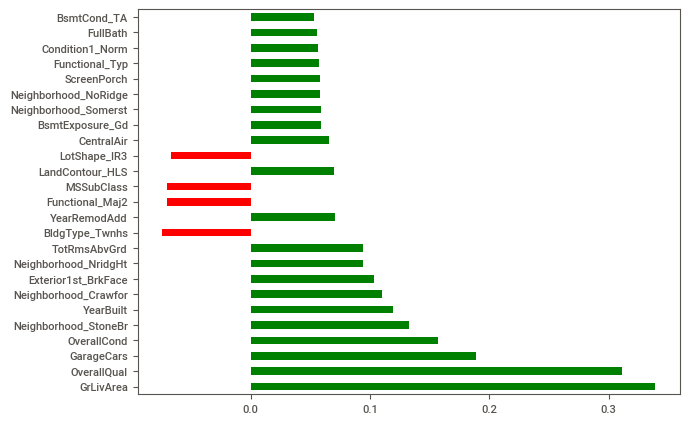

In [334]:
# Ploting top 25 features
plt.figure(figsize= (7, 5))
top25_features_lasso.plot.barh(color= (top25_features_lasso > 0).map({True: 'g', False: 'r'}))
plt.show()

- Optimal alpha (lambda) value for Ridge Regression model is: 7
- Optimal alpha (lambda) value for Lasso Regression model is: 0.0006



# Assignment II


### Scenario 1:  Doubling the value of optimal alpha

In [344]:
## Doubling value of optimal alpha in Ridge
ridge2= Ridge(alpha= 14, random_state= 42)
ridge2.fit(X_train, y_train)

Ridge(alpha=14, random_state=42)

In [345]:
# Top 10 features with double the value of optimal alpha in Ridge
ridge_coef2= pd.Series(ridge2.coef_, index= X_train.columns)
top10_ridge2=  ridge_coef2[abs(ridge_coef2).nlargest(10).index]
top10_ridge2

1stFlrSF               0.169180
2ndFlrSF               0.165877
GarageCars             0.165548
TotRmsAbvGrd           0.134917
YearRemodAdd           0.116432
Exterior1st_BrkFace    0.102340
KitchenQual_TA        -0.100293
BsmtQual_TA           -0.098355
FullBath               0.089936
CentralAir             0.086941
dtype: float64

In [337]:
## Doubling value of optimal alpha in Lasso
lasso2= Lasso(alpha= .0012, random_state=42)
lasso2.fit(X_train, y_train)

Lasso(alpha=0.0012, random_state=42)

In [338]:
# Top 10 features with double the value of optimal alpha in Lasso
lasso_coef2= pd.Series(lasso2.coef_, index= X_train.columns)
top10_lasso2=  lasso_coef2[abs(lasso_coef2[lasso_coef2 != 0]).nlargest(10).index]
top10_lasso2

OverallQual             0.355481
GrLivArea               0.351966
GarageCars              0.210659
OverallCond             0.145340
MSSubClass             -0.094918
Neighborhood_StoneBr    0.084574
Exterior1st_BrkFace     0.080393
YearBuilt               0.079261
Neighborhood_Crawfor    0.078374
Neighborhood_NridgHt    0.076751
dtype: float64

### Scenario 2: 5 most important predictor variables in the lasso model are not available in the incoming data

In [339]:
# Checking top 5 features in our lasso model
top25_features_lasso.nlargest()

GrLivArea               0.339067
OverallQual             0.311471
GarageCars              0.188410
OverallCond             0.156641
Neighborhood_StoneBr    0.132668
dtype: float64

In [340]:
# Checking all Neighborhood dummy variables
cols_to_drop= X_train.columns[X_train.columns.str.startswith('Neighborhood')].tolist()
cols_to_drop.extend(['GrLivArea','OverallQual','OverallCond','GarageArea'])
cols_to_drop

['Neighborhood_BrDale',
 'Neighborhood_BrkSide',
 'Neighborhood_ClearCr',
 'Neighborhood_CollgCr',
 'Neighborhood_Crawfor',
 'Neighborhood_Edwards',
 'Neighborhood_Gilbert',
 'Neighborhood_IDOTRR',
 'Neighborhood_MeadowV',
 'Neighborhood_Mitchel',
 'Neighborhood_NAmes',
 'Neighborhood_NPkVill',
 'Neighborhood_NWAmes',
 'Neighborhood_NoRidge',
 'Neighborhood_NridgHt',
 'Neighborhood_OldTown',
 'Neighborhood_SWISU',
 'Neighborhood_Sawyer',
 'Neighborhood_SawyerW',
 'Neighborhood_Somerst',
 'Neighborhood_StoneBr',
 'Neighborhood_Timber',
 'Neighborhood_Veenker',
 'GrLivArea',
 'OverallQual',
 'OverallCond',
 'GarageArea']

In [341]:
# Droping above features from X_train and X_test
X_train= X_train.drop(cols_to_drop, axis= 1)
X_test= X_test.drop(cols_to_drop, axis= 1)
X_train.shape, X_test.shape

((1021, 189), (439, 189))

In [342]:
# Building Lasso model with these features
lasso3= Lasso(alpha= .0006, random_state= 42)
lasso3.fit(X_train, y_train)

Lasso(alpha=0.0006, random_state=42)

In [343]:
# Top 5 features after droping top 5 features of Previous Lasso model
lasso_coef3= pd.Series(lasso3.coef_, index= X_train.columns)
top5_lasso3=  lasso_coef3[abs(lasso_coef3[lasso_coef3 != 0]).nlargest().index]
top5_lasso3

1stFlrSF               0.340473
2ndFlrSF               0.303063
GarageCars             0.223494
Exterior1st_BrkFace    0.131593
YearRemodAdd           0.130971
dtype: float64